# INM430 - Tiny DS Project Progress Report


***

** Student Name: ** Daniele Pennacchia

** Project Title:** _Is it all about __WHERE__ we live?_ 

***




## Part-1: Data source and domain description (maximum 150 words):

For this _Data Science_ project I downloaded the dataset _**Melbourne Housing Market**_ from Kaggle.
This dataset is related to the housing market of the australian Capital and was scraped from publicly available results from Domain.com.au as the author of this kaggle's page (_https://www.kaggle.com/anthonypino/melbourne-housing-market_) reported.
The ultimated dataset provides _34857_ observations of sold houses within _21_ features (or variables) from January 2016 until March 2018.

The domain I would like to focus is on the house pricing market in order to investigate the dynamic behind it and try to find some insights both on a _time series_ analysis (try to find if there was a decline in houses' prices and when it has occured, or if there is an increasing/decreasing trend through the time involved, for instance) and on a _explorative way_, trying to predict the future house prices or even try to find some _cluster_ insights.
***



## Part-2: Analysis Strategy and Plans (maximum 200 words):

I plan the following strategy steps and analysis:

- Exploratory Data Analysis and Initial Outlier Detection 
- Data Cleansing
- Feature Engineering
- New Data Visualisation, Time Series, Clustering & Maps
- Machine Learning
- Evaluation/Fine-tuning phase
- Conclusion/Insights

***
***

## Part-3: Initial investigations on the data sources (maximum 150 words): 

As already mentioned, and after loaded the data, we have a big data set with _34857_ observations (_rows_) along with _21_ variables (or _columns_).

Unfortunately, the dataset is not tidy and presents several missing values in almost all its features. Thus, after a first data exploration we will need to convert some features data type, do some data transformation (we might add some extra information as new features) and also clean and impute data as well as make some feature engineering.

***
***

## Part-4: Python code for initial investigations

In [1]:
# This cell is where you can copy + paste your Python code which loads your data and produces 
# When you press CTRL+Enter, this cell will execute and produce some output
# You can develop your code in Spyder (or another IDE) and copy + paste over here

# Step-1: Load your data
# Step-2: Get an overview of the data features, some suggestions to look for:
#         number of features, data types, any missing values?, 
#         any transformations needed?

# Start with your import (s) here.

# The following is essential to get your matplotlib plots inline, so do not miss this one if you have graphics.

%matplotlib inline

# Some usual imports here
import csv as csv 
import numpy as np
import pandas as pd

# Continue here with your code

#Import libraries (and change the directory too)

import seaborn as sns
import matplotlib.pyplot as plt
import sklearn    #during this coursework we will import all what we need for ML analysis (from sklearn.linear_model import LinearRegression for example..)
# conda install -c conda-forge folium geopandas tornado==4.5.3 #pre-installer per folium vertytime to run into the cmd prompt
# import folium #(heatmap and other visualisation tools ..we need to import some 'features')
import datetime
import os
#os.chdir(r'C:\Users\Daniele\Desktop\City - MSc Data Science\PDS\Coursework') #wd of my personal laptop
os.chdir(r'\\nsq023vs\u6\aczc947\Desktop\PrinciplesDataScience\Coursework') #wd of my City account
import warnings
warnings.filterwarnings("ignore")

# Table of Contents

## 1. [Exploratory Data Analysis and Initial Outlier Detection](#First-Section)
## 2. [Data Cleansing](#Second-Section)
## 3. [Feature Engineering](#Third-Section)
## 4. [New Data Visualisation, Time Series, Clustering and Maps](#Fourth-Section)
## 5. [Machine Learning](#Fifth-Section)
## 6. [Evaluation, Fine-Tuning Phase](#Sixth-Section)
## 7. [Conclusion and Insights](#Seventh-Section)



## <a id='First-Section'>Exploratory Analysis and Initial Outlier Detection</a>

In [2]:
#Load data
df_housing = pd.read_csv('../Coursework/Melbourne_housing_FULL.csv')
pd.set_option('display.max_columns', None) #in order to display all the var/columns
df_housing.head()

Suburb             Address  Rooms Type      Price Method SellerG  \
0  Abbotsford       68 Studley St      2    h        NaN     SS  Jellis   
1  Abbotsford        85 Turner St      2    h  1480000.0      S  Biggin   
2  Abbotsford     25 Bloomburg St      2    h  1035000.0      S  Biggin   
3  Abbotsford  18/659 Victoria St      3    u        NaN     VB  Rounds   
4  Abbotsford        5 Charles St      3    h  1465000.0     SP  Biggin   

         Date  Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  \
0  03/09/2016       2.5    3067.0       2.0       1.0  1.0     126.0   
1  03/12/2016       2.5    3067.0       2.0       1.0  1.0     202.0   
2  04/02/2016       2.5    3067.0       2.0       1.0  0.0     156.0   
3  04/02/2016       2.5    3067.0       3.0       2.0  1.0       0.0   
4  04/03/2017       2.5    3067.0       3.0       2.0  0.0     134.0   

   BuildingArea  YearBuilt         CouncilArea  Lattitude  Longtitude  \
0           NaN        NaN  Yarra City Council   -37.8014    144.9958   
1           NaN        NaN  Yarra City Council   -37.7996    144.9984   
2          79.0     1900.0  Yarra City Council   -37.8079    144.9934   
3           NaN        NaN  Yarra City Council   -37.8114    145.0116   
4         150.0     1900.0  Yarra City Council   -37.8093    144.9944   

              Regionname  Propertycount  
0  Northern Metropolitan         4019.0  
1  Northern Metropolitan         4019.0  
2  Northern Metropolitan         4019.0  
3  Northern Metropolitan         4019.0  
4  Northern Metropolitan         4019.0

### Key Details about the dataset:

**Suburb**: Suburb

**Address**: Address

**Rooms**: Number of rooms

**Type**: _h_ - house,cottage,villa, semi,terrace;  _u_ - unit, duplex;   _t_ - townhouse.

**Price**: Price in Australian dollars of a house

**Method**: *S* - property sold; *SP* - property sold prior; *PI* - property passed in; *PN* - sold prior not disclosed; *SN* - sold not disclosed; *VB* - vendor bid; *W* - withdrawn prior to auction; *SA* - sold after auction; *SS* - sold after auction price not disclosed. *N/A* - price or highest bid not available.

**SellerG**: Real Estate Agent

**Date**: Date related to the house transaction (i.e. sold, etc.)

**Distance**: Distance from Central Business Distric (*CBD*) in Kilometres

**Postcode**: Self explanatory

**Bedroom2** : Scraped # of Bedrooms (from different source)

**Bathroom**: Number of Bathrooms

**Car**: Number of carspots

**Landsize**: Land Size in Metres

**BuildingArea**: Building Size in Metres

**YearBuilt**: Year the house was built

**CouncilArea**: Governing council for the area

**Lattitude**: Self explanatory

**Longtitude**: Self explanatory

**Regionname**: General Melbourne Region (West, North West, North, North east ...etc)

**Propertycount**: Number of properties that exist in that specific suburb.



In [3]:
# Checking info of variables (type + NaN in particular), then sorted (descending order)
df_housing.info()
df_housing.isnull().sum().sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null object
Address          34857 non-null object
Rooms            34857 non-null int64
Type             34857 non-null object
Price            27247 non-null float64
Method           34857 non-null object
SellerG          34857 non-null object
Date             34857 non-null object
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null object
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.6+ M

BuildingArea     21115
YearBuilt        19306
Landsize         11810
Car               8728
Bathroom          8226
Bedroom2          8217
Longtitude        7976
Lattitude         7976
Price             7610
Regionname           3
Propertycount        3
CouncilArea          3
Postcode             1
Distance             1
Date                 0
SellerG              0
Method               0
Type                 0
Rooms                0
Address              0
Suburb               0
dtype: int64

In [4]:
# Percentage of missing values
df_housing.isnull().sum()/len(df_housing)*100

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price            21.832057
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.002869
Postcode          0.002869
Bedroom2         23.573457
Bathroom         23.599277
Car              25.039447
Landsize         33.881286
BuildingArea     60.576068
YearBuilt        55.386293
CouncilArea       0.008607
Lattitude        22.882061
Longtitude       22.882061
Regionname        0.008607
Propertycount     0.008607
dtype: float64

Some data types seem not correclty assigned.. For example *postcode, bedroom2 bathroom,car* and *PropertyCourt* are float, while they should be categorical (Postcode) and integer (all the others).

We tend to prefer categorical type variables instead of object type (to reduce memory usage).

Also *Date* should be converted in date-format and we can "split" this variable into "Year", "Month" and "Day" for future investigation (feature engineering part).
We found out that there are quite a lot of missing values related to the followig features: *BuildingArea, YearBuilt* and *Landsize*.

In [5]:
# Changing type of variables:
# create a subset of all object variables that we want to transform in categoriccal
obj_to_cat = ['Suburb', 'Address', 'Type', 'Method','SellerG', 'CouncilArea','Regionname']

for colname in obj_to_cat:
    df_housing[colname] = df_housing[colname].astype('category')
    
# Convert Date to datetime variable
df_housing['Date'] = pd.to_datetime(df_housing['Date'])

# Convert Postcode (float) to categorical
df_housing['Postcode']=df_housing['Postcode'].astype('category')

#change Bathroom, bath, car and propertycoun to integer. Before the transformation I need to convert all the missing values to 0. 

# Check confirmed changes
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null category
Address          34857 non-null category
Rooms            34857 non-null int64
Type             34857 non-null category
Price            27247 non-null float64
Method           34857 non-null category
SellerG          34857 non-null category
Date             34857 non-null datetime64[ns]
Distance         34856 non-null float64
Postcode         34856 non-null category
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null category
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null category
Propertycount    34854 non-null float64
dtypes: category(8), datetime64[ns](1)

### Features Exploration 'at first glance'
Just a bit of initial exploratory analysis: investigate different features to determine the relationships between the main ones (in particular related to the variabile _Price_).

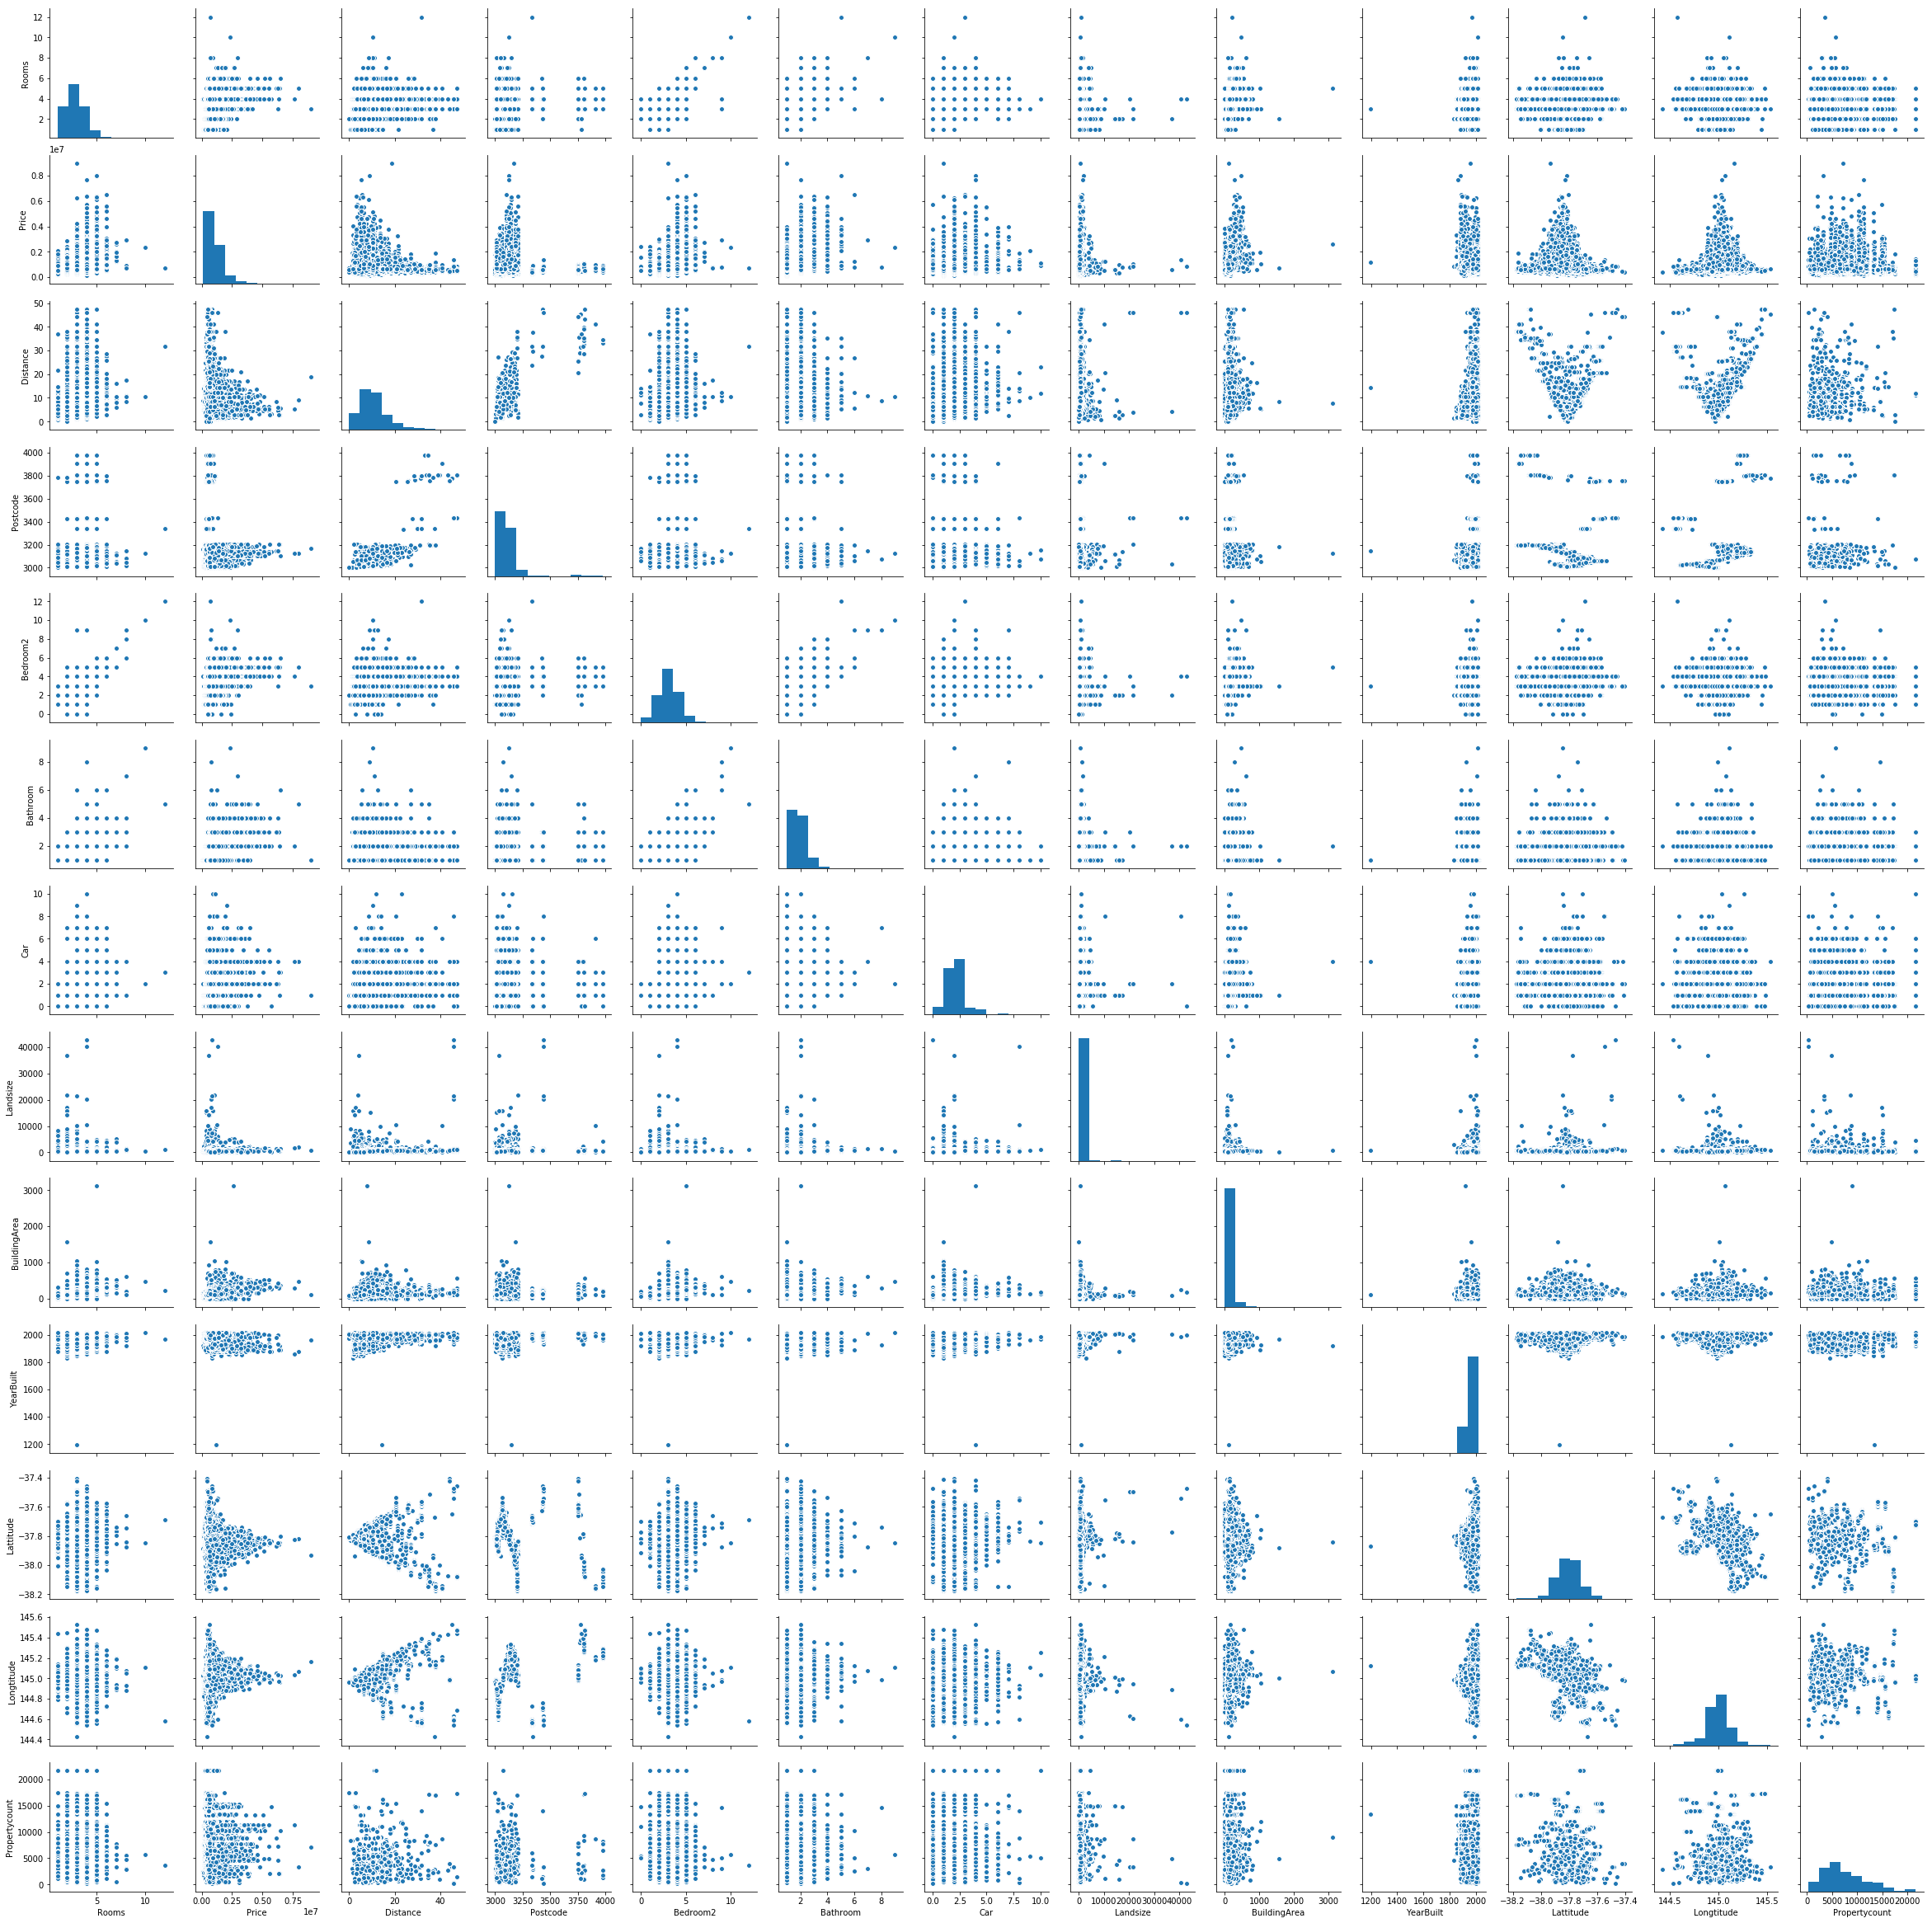

In [6]:
# pairplot to see the pairwise relations (joint relationships and histrograms between univariate distributions)
sns.pairplot(df_housing.dropna())

If we zoom this pairplot, we can see some in throughout the diagonal the distribution for each numerical variable, while above or below the diagonal we have the joint pairwise distributions.

It is interesting to note that the main features are fairly right skewed as we can expected with the _low/medium_ values as the predominant ones (such as houses with 3 rooms with 1 or 2 bathrooms).

Looking to the pairwise distribution we can denote how _Rooms_ is rather linear with the variable _Bedroom2_, perhaps the second one could be redundant. Another feature correlated with the number of rooms is _Bathrooms_ and of course this seems "normal".

The _Price_ seems to be (positively) influenced by the number of rooms, bedrooms, bathrooms and the building area (this last distribution should be scaled in order to have a better view of that relationship), while the more is the distance (from the city centre) the less is the price of a house.



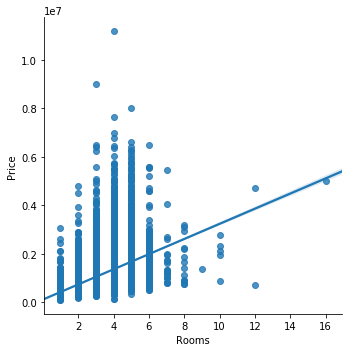

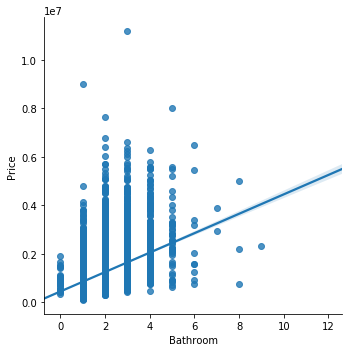

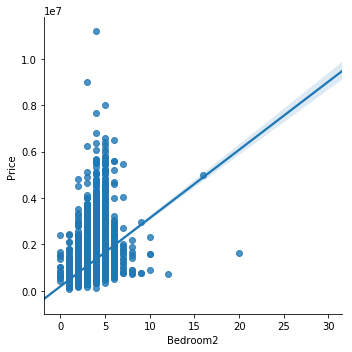

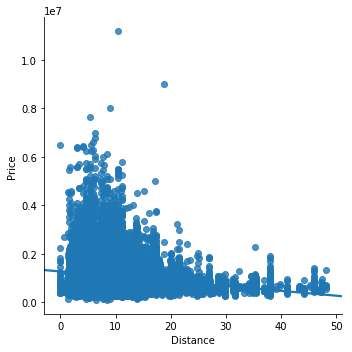

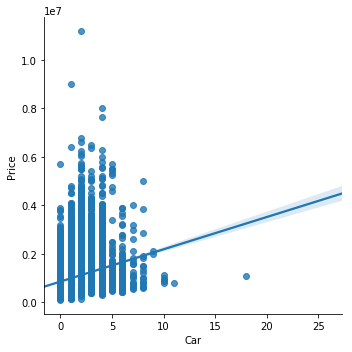

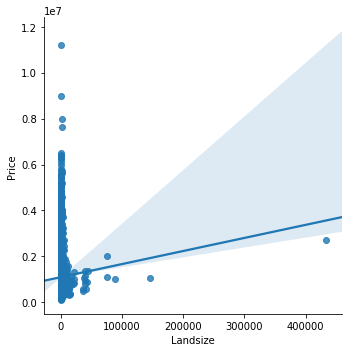

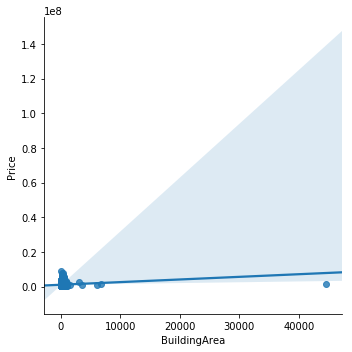

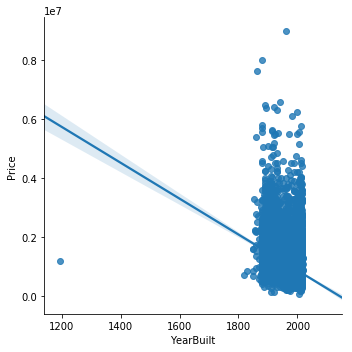

In [7]:
# Features relationship with Price
feat = ['Rooms','Bathroom','Bedroom2', 'Distance','Car', 'Landsize', 'BuildingArea', 'YearBuilt']
for i in feat:   
    sns.lmplot(data=df_housing, x=i, y='Price')
    plt.show()

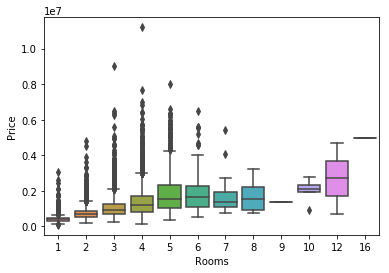

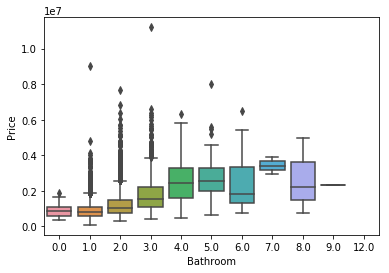

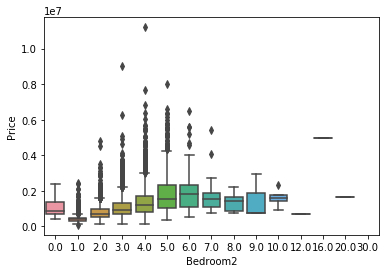

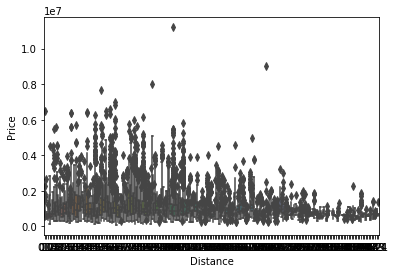

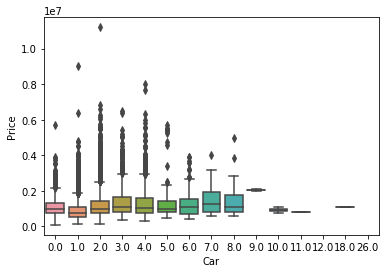

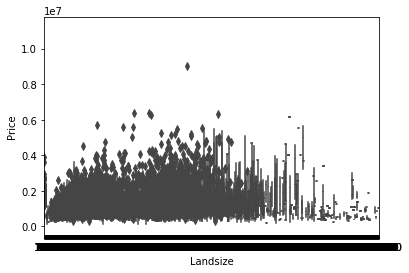

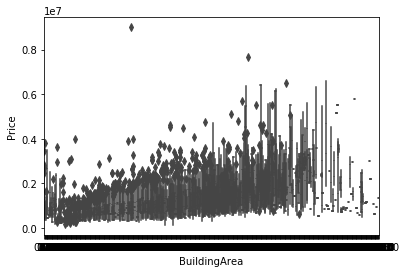

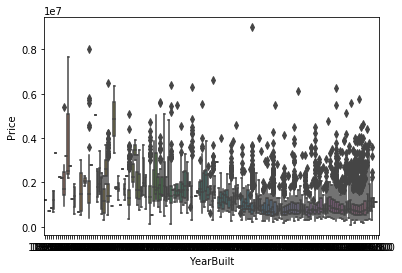

In [8]:
for i in feat:
    sns.boxplot(x=i, y='Price',data=df_housing)
    plt.show()

Viewing both the linear regression plot (_lmplot_) and the _boxplots_ we can easily spot the linear relation between prices and the other variables.

Briefly, the price of a house will tend to increase as the number of rooms reach "six", while after six rooms the average price slighlty decreases. Finally with 10, 12 and 16 (one observation) rooms the price tend to increase further. Nevertheless we have also to point out that the most variability and outliers are in those houses with a lower number of rooms and bathrooms.

We can clearly spot an outlier relating the _YearBuilt_ feature.

The same situation we have with bathrooms (increasing of price until 5 bathrooms). Then we have a fluctuation on the average price (and on the variability) when a house has 6 to 9 bathrooms.

The _car spots_ seems to not really influence the price of a house, while the distance has a negative impact on price.

At the end, we can point out that there is a constant (limitated) ascending trend between price and building area.

In [10]:
# re-scaling Landsize & BArea
# but first I have to remone NAs from BA e Landsize
df_housing['BArea_clean'] = df_housing['BuildingArea'].dropna()
df_housing['BArea_clean'].describe()

count    13742.00000
mean       160.25640
std        401.26706
min          0.00000
25%        102.00000
50%        136.00000
75%        188.00000
max      44515.00000
Name: BArea_clean, dtype: float64

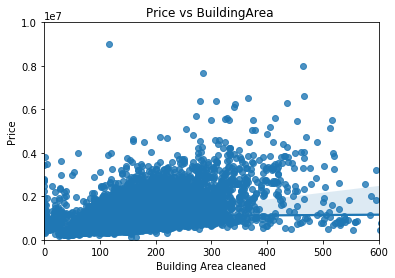

In [11]:
ax =sns.regplot(data=df_housing, x='BArea_clean', y='Price')
plt.xlim(0,600) #limit set up to mean value + stdev
plt.ylim(0,10000000)  #the most expensive house is sold at 11.6mil
plt.xlabel('Building Area cleaned')
plt.title('Price vs BuildingArea ')
plt.show()

In [12]:
# re-scaling Landsize w/o NAs
df_housing['Land_clean'] = df_housing['Landsize'].dropna()
df_housing['Land_clean'].describe()  #23047 rows (ok)

count     23047.000000
mean        593.598993
std        3398.841946
min           0.000000
25%         224.000000
50%         521.000000
75%         670.000000
max      433014.000000
Name: Land_clean, dtype: float64

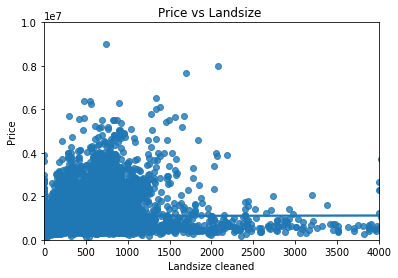

In [13]:
ax =sns.regplot(data=df_housing, x='Land_clean', y='Price')
plt.xlim(0,4000)  #limit set up to mean value + stdev
plt.ylim(0,10000000)  #the most expensive house is sold at 11.6mil that's why we set 10mil as ymax
plt.xlabel('Landsize cleaned')
plt.title('Price vs Landsize ')
plt.show()

With the zoom in, and the help of basic statistics we can summarise (for now) two main aspects for BuildingArea and Landsize:
- distribution
- correlation with Price

Regarding distribution, both are right skewed, but apart from outliers, the 75% percentile is within 188m$^2$ and 670m$^2$ respectively, so the most houses have "standard" size.

In terms of correlation, BuildingArea has a slight positive trend with Price, especially for houses until 400m$^2$. Although Landsize has a lower correlation with Price (almost next to nothing), houses with a landsize's range between 0-1500m $^2$ might suggest a small increasing trend.




In [14]:
#Let's drop these 2 columns for now. We will investigate more these features in the Data Cleaning section
df_housing.drop(columns=['BArea_clean','Land_clean'], inplace=True, axis=1)
df_housing.head()

Suburb             Address  Rooms Type      Price Method SellerG  \
0  Abbotsford       68 Studley St      2    h        NaN     SS  Jellis   
1  Abbotsford        85 Turner St      2    h  1480000.0      S  Biggin   
2  Abbotsford     25 Bloomburg St      2    h  1035000.0      S  Biggin   
3  Abbotsford  18/659 Victoria St      3    u        NaN     VB  Rounds   
4  Abbotsford        5 Charles St      3    h  1465000.0     SP  Biggin   

        Date  Distance Postcode  Bedroom2  Bathroom  Car  Landsize  \
0 2016-03-09       2.5   3067.0       2.0       1.0  1.0     126.0   
1 2016-03-12       2.5   3067.0       2.0       1.0  1.0     202.0   
2 2016-04-02       2.5   3067.0       2.0       1.0  0.0     156.0   
3 2016-04-02       2.5   3067.0       3.0       2.0  1.0       0.0   
4 2017-04-03       2.5   3067.0       3.0       2.0  0.0     134.0   

   BuildingArea  YearBuilt         CouncilArea  Lattitude  Longtitude  \
0           NaN        NaN  Yarra City Council   -37.8014    144.9958   
1           NaN        NaN  Yarra City Council   -37.7996    144.9984   
2          79.0     1900.0  Yarra City Council   -37.8079    144.9934   
3           NaN        NaN  Yarra City Council   -37.8114    145.0116   
4         150.0     1900.0  Yarra City Council   -37.8093    144.9944   

              Regionname  Propertycount  
0  Northern Metropolitan         4019.0  
1  Northern Metropolitan         4019.0  
2  Northern Metropolitan         4019.0  
3  Northern Metropolitan         4019.0  
4  Northern Metropolitan         4019.0

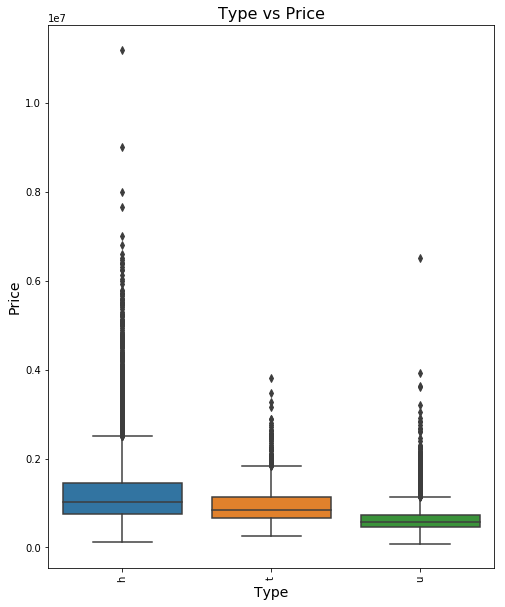

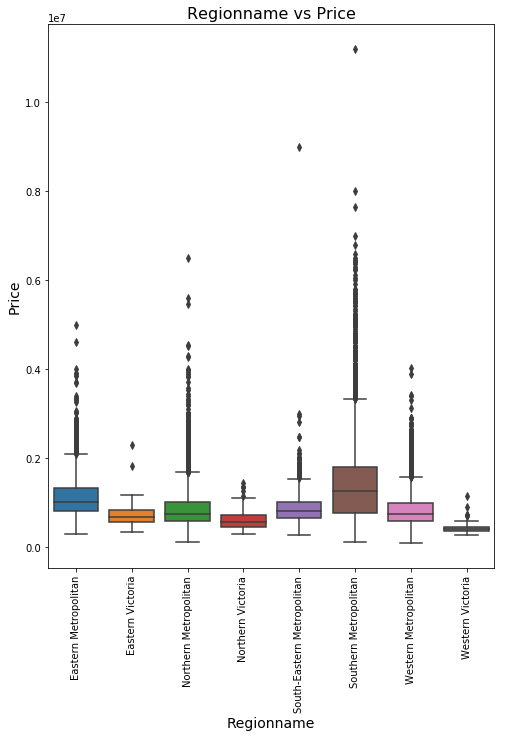

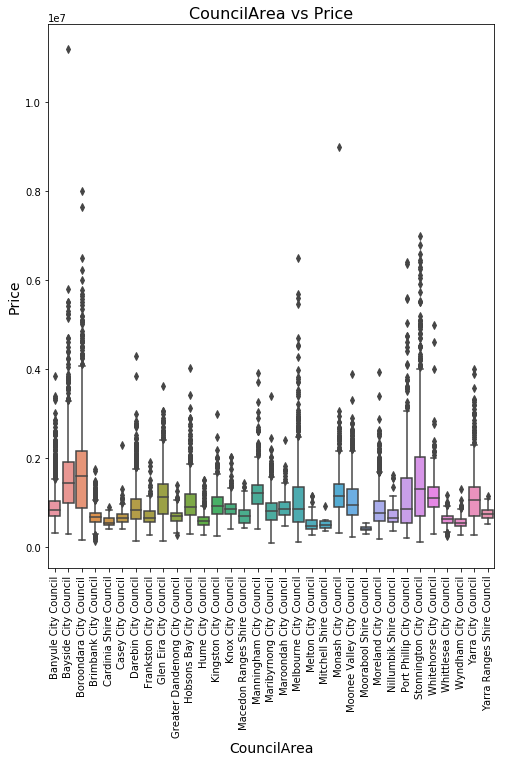

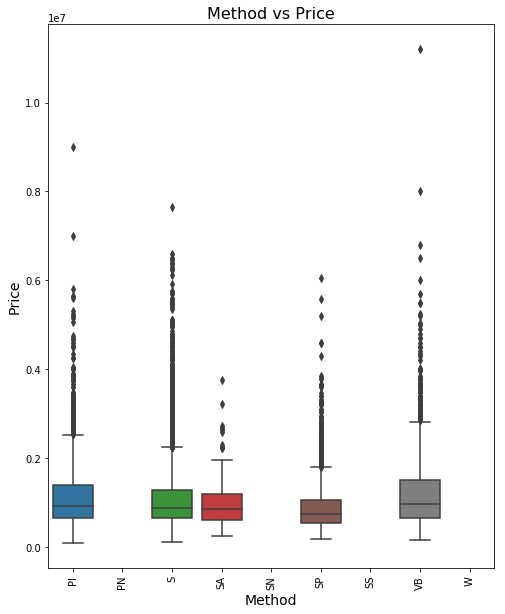

In [15]:
# plotting categorical features with Price

cat_feat = ['Type','Regionname','CouncilArea','Method']

for i in cat_feat:
    f, ax = plt.subplots(1,1, figsize = (8,10))
    sns.boxplot(x=i, y='Price',data=df_housing)
    plt.xticks(rotation=90)
    plt.title('%s vs Price' %i, fontsize = 16)
    plt.xlabel(i, fontsize = 14)
    plt.ylabel('Price', fontsize = 14)
    plt.show()

In [16]:
# count, unique values, mode value and frequency of categorical features
print(df_housing[cat_feat].describe())  

         Type             Regionname              CouncilArea Method
count   34857                  34854                    34854  34857
unique      3                      8                       33      9
top         h  Southern Metropolitan  Boroondara City Council      S
freq    23980                  11836                     3675  19744


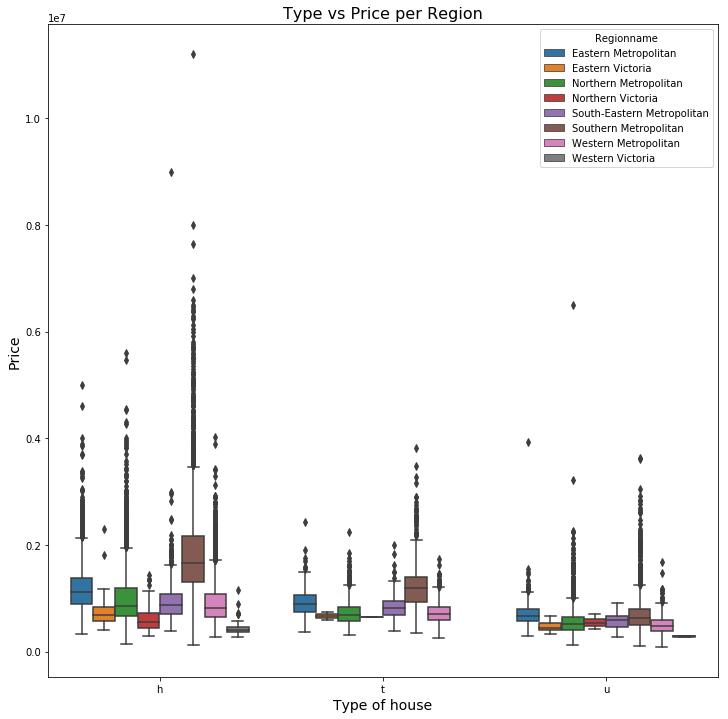

In [17]:
#Plot per Region
plt.figure(figsize = (12,12))
sns.boxplot(x='Type', y='Price',data=df_housing ,hue='Regionname')
plt.title('Type vs Price per Region', fontsize = 16)
plt.xlabel('Type of house', fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.show()

In [18]:
# Create some output (describing statistics) for Type,Region and Method
for i in cat_feat:
  df_housing['Price'].groupby(df_housing[i]).describe()
 
df_housing['Price'].groupby(df_housing['Type']).describe()

count          mean            std       min       25%        50%  \
Type                                                                        
h     18472.0  1.203718e+06  687939.504804  131000.0  746000.0  1015000.0   
t      2866.0  9.310772e+05  382868.562260  256000.0  670000.0   850000.0   
u      5909.0  6.279434e+05  296680.108707   85000.0  450000.0   580000.0   

            75%         max  
Type                         
h     1450000.0  11200000.0  
t     1135000.0   3820000.0  
u      725000.0   6500000.0

In [19]:
df_housing['Price'].groupby(df_housing['Regionname']).describe()

count          mean            std       min  \
Regionname                                                                  
Eastern Metropolitan        3272.0  1.108723e+06  452246.950081  288000.0   
Eastern Victoria             166.0  7.143282e+05  227462.047997  337000.0   
Northern Metropolitan       7864.0  8.614840e+05  437278.963543  121000.0   
Northern Victoria            166.0  6.190512e+05  225510.959416  296000.0   
South-Eastern Metropolitan  1341.0  8.776827e+05  390512.554640  266000.0   
Southern Metropolitan       8524.0  1.395928e+06  857360.814587  112000.0   
Western Metropolitan        5815.0  8.376153e+05  382695.929342   85000.0   
Western Victoria              96.0  4.326068e+05  126730.286253  280000.0   

                                 25%        50%        75%         max  
Regionname                                                              
Eastern Metropolitan        800000.0  1015000.0  1320000.0   5000000.0  
Eastern Victoria            570250.0   679000.0   822500.0   2300000.0  
Northern Metropolitan       582000.0   752500.0  1020000.0   6500000.0  
Northern Victoria           447000.0   565000.0   719375.0   1430000.0  
South-Eastern Metropolitan  650000.0   811250.0  1010000.0   9000000.0  
Southern Metropolitan       765000.0  1250000.0  1790000.0  11200000.0  
Western Metropolitan        585000.0   750000.0   982750.0   4020000.0  
Western Victoria            370000.0   412125.0   457000.0   1152000.0

In [20]:
df_housing['Price'].groupby(df_housing['Method']).describe()

count          mean            std       min       25%       50%  \
Method                                                                       
PI       3255.0  1.117884e+06  711985.854152   85000.0  650000.0  920000.0   
PN          0.0           NaN            NaN       NaN       NaN       NaN   
S       17515.0  1.051460e+06  614850.755353  112000.0  650000.0  881000.0   
SA        190.0  9.825047e+05  544797.578274  240000.0  611250.0  850000.0   
SN          0.0           NaN            NaN       NaN       NaN       NaN   
SP       3603.0  8.790224e+05  500628.334965  190000.0  550000.0  751000.0   
SS          0.0           NaN            NaN       NaN       NaN       NaN   
VB       2684.0  1.194205e+06  820155.487355  160000.0  650000.0  970000.0   
W           0.0           NaN            NaN       NaN       NaN       NaN   

              75%         max  
Method                         
PI      1400000.0   9000000.0  
PN            NaN         NaN  
S       1290000.0   7650000.0  
SA      1197500.0   3750000.0  
SN            NaN         NaN  
SP      1050000.0   6050000.0  
SS            NaN         NaN  
VB      1520000.0  11200000.0  
W             NaN         NaN

From the boxplots and the following summary statistics tables we can summarize:

- The modal value for the _type_ of house is "h"_(house, cottages or villas)_ with a median price over for houses are over 1mil. Then, there are _townhomes_ ("t" type) with a median price around 800k-900k even if townhouse are those kind of houses with the smallest proportion of the dataset. _Unit_ or _duplex_ houses ("u") are the less expensive with a median price approximately at 500k.

- The _Metropolitan_ Region has higher house prices compared to the _Victoria_ Region, with the _Southern Metropolitan_ being the area with the highest median home price. This region has also the biggest density of houses and city of Melbourne is included in this area.

- The outcome for the _Council area_ is a stricted result of the previous one: council areas with highest median price are in the Metropolitan Region.

- Home prices with different _selling methods_ are relatively the same across the board. The _Vendor Bid_ method seems to have a little more variability and outliers compared to the others as well as a higher mean and median value.



### Room or Bedroom?

Early, we noticed that there are 2 features that could be very similar (*Rooms* and *Bedroom2*). Moreover the description of the second variable is not very clear (*"Scraped # of Bedrooms (from different source)"*) and should have some typing/import errors. Let's have a closer look:

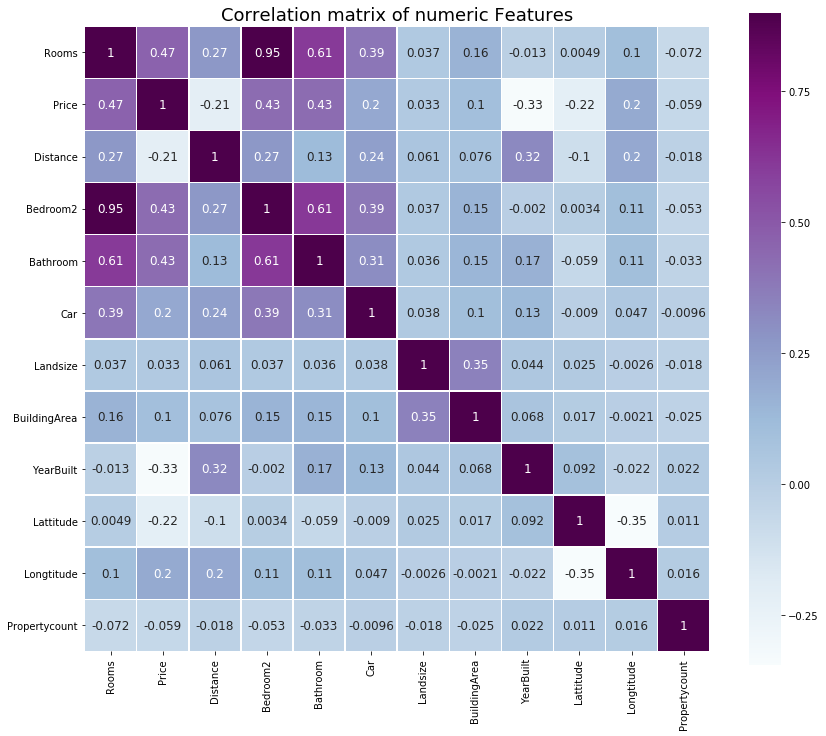

In [21]:
#Exploring correlation between features
cor_mat = df_housing.corr()
f, ax = plt.subplots(figsize=(14, 12))
plt.title('Correlation matrix of numeric Features', size =18)
sns.heatmap(cor_mat, vmax=.9, square=True, linewidths=.4 ,annot=True,cmap ='BuPu', annot_kws={'size':12});

From the above correlation matrix it can be seen the pairwise correlation between all the numeric features.

_Price_ seems to be correlated with Rooms, Bathroom, Bedroom2 and Distance and YearBuilt (a negative correlation with the last two).

Focusing only to _Rooms_ and _Bedroom2_ we can spot a very high correlation (_0.95_) that could suggest a possible redundancy.

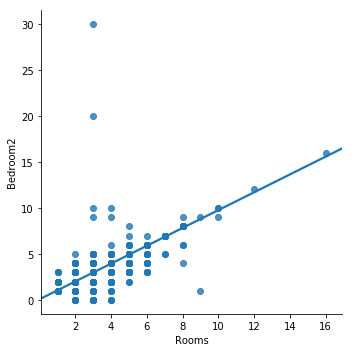

In [22]:
# Let's plot "Rooms" with "Bedroom2"
sns.lmplot(data= df_housing, x='Rooms', y='Bedroom2')

As we can see, the relation between these 2 variables is almost linear. We can notice some outliers (*Bedroom2* with 20 and 30, corrisponding with *Rooms* values both at 3. While 1 *Bedroom2* is set with 9 *Rooms*).

In [23]:
# Let's look at those obs with higher values (possible outliers) of Room and Bedroom2
Data_view = df_housing[(df_housing["Bedroom2"] == 20) | (df_housing["Bedroom2"] == 30) | (df_housing["Rooms"] == 9)]
Data_view

Suburb        Address  Rooms Type      Price Method    SellerG  \
1932         Brighton    2a Dendy St      9    t        NaN      S     Rodney   
2536          Burwood  36 Cumming St      3    h        NaN     PI       Ross   
7535   Oakleigh South  17 Windsor Av      9    h  1380000.0      S        Ray   
12043  Caulfield East    5 Grange Rd      3    h  1650000.0     PI   Woodards   
21569     Templestowe     12 Read St      9    h        NaN     VB  Fletchers   
22888         Windsor  56 The Avenue      9    h        NaN     SP   Marshall   

            Date  Distance Postcode  Bedroom2  Bathroom  Car  Landsize  \
1932  2016-05-28      11.2   3186.0       NaN       NaN  NaN       NaN   
2536  2016-08-10      11.7   3125.0      30.0      12.0  0.0     946.0   
7535  2016-10-09      14.7   3167.0       NaN       NaN  NaN       NaN   
12043 2016-06-08       9.3   3145.0      20.0       1.0  2.0     875.0   
21569 2017-09-16      15.5   3106.0       9.0       4.0  5.0       NaN   
22888 2017-09-23       4.6   3181.0       1.0       1.0  NaN    1021.0   

       BuildingArea  YearBuilt                CouncilArea  Lattitude  \
1932            NaN        NaN       Bayside City Council  -37.91920   
2536            NaN     1950.0        Monash City Council  -37.85300   
7535            NaN        NaN      Kingston City Council        NaN   
12043           NaN        NaN     Glen Eira City Council  -37.88150   
21569           NaN        NaN    Manningham City Council  -37.75198   
22888           NaN        NaN  Port Phillip City Council  -37.85344   

       Longtitude                  Regionname  Propertycount  
1932    144.98900       Southern Metropolitan        10579.0  
2536    145.11290       Southern Metropolitan         5678.0  
7535          NaN  South-Eastern Metropolitan         3692.0  
12043   145.04910       Southern Metropolitan          608.0  
21569   145.14544        Eastern Metropolitan         6202.0  
22888   144.99853       Southern Metropolitan         4380.0

Here we have the evidence that probably there were some typing errors (for instance *30* Bedroom2 should have been *3* with 1 bathroom insted of 12, while *20* Bedrooms2 should have been only *2*, that summed up with *1* bathroom leads to a 3 total rooms of that specific house).

Moreover, since these 2 variables are linear and *Bedroom2* has more *missing values* than *Rooms*, the former one will be removed from the dataset.

In [24]:
#Finally, we can drop the "Bedroom2" feature
df_housing = df_housing.drop(['Bedroom2'], axis=1)

### Numeric Features exploration

In [25]:
# Let's visualise some basic statistics in order to explore the main features more closely
pd.set_option('display.max_columns', None)
df_housing.describe()

Rooms         Price      Distance      Bathroom           Car  \
count  34857.000000  2.724700e+04  34856.000000  26631.000000  26129.000000   
mean       3.031012  1.050173e+06     11.184929      1.624798      1.728845   
std        0.969933  6.414671e+05      6.788892      0.724212      1.010771   
min        1.000000  8.500000e+04      0.000000      0.000000      0.000000   
25%        2.000000  6.350000e+05      6.400000      1.000000      1.000000   
50%        3.000000  8.700000e+05     10.300000      2.000000      2.000000   
75%        4.000000  1.295000e+06     14.000000      2.000000      2.000000   
max       16.000000  1.120000e+07     48.100000     12.000000     26.000000   

            Landsize  BuildingArea     YearBuilt     Lattitude    Longtitude  \
count   23047.000000   13742.00000  15551.000000  26881.000000  26881.000000   
mean      593.598993     160.25640   1965.289885    -37.810634    145.001851   
std      3398.841946     401.26706     37.328178      0.090279      0.120169   
min         0.000000       0.00000   1196.000000    -38.190430    144.423790   
25%       224.000000     102.00000   1940.000000    -37.862950    144.933500   
50%       521.000000     136.00000   1970.000000    -37.807600    145.007800   
75%       670.000000     188.00000   2000.000000    -37.754100    145.071900   
max    433014.000000   44515.00000   2106.000000    -37.390200    145.526350   

       Propertycount  
count   34854.000000  
mean     7572.888306  
std      4428.090313  
min        83.000000  
25%      4385.000000  
50%      6763.000000  
75%     10412.000000  
max     21650.000000

Striking outputs:

- 12 bathrooms (we have already seen at that particulat observation) as a max value (probably a typing error) but also there are some houses with no bathroom.
- 26 car spots seems quite a lot. Investigate, maybe could be another typing error - comparing with Landsize and BuildingArea.
- Extreme values of Landsize and BuildingArea seem too excessive
- Year max is 2106, clearly an error. Investigate if there are "Year" greater than 2018 and try to replace with a more proper value.

In [26]:
# create  auxiliary columnS from Bathroom and Car, in order to keep these new variables as float (because after the following loop "Bathroom" and "Car" will become object var due to the insert of "Missing" as a string)
df_housing['Bath_clean'] = df_housing['Bathroom'].dropna()
df_housing['Car_clean'] = df_housing['Car'].dropna()

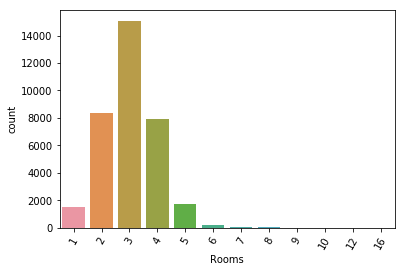

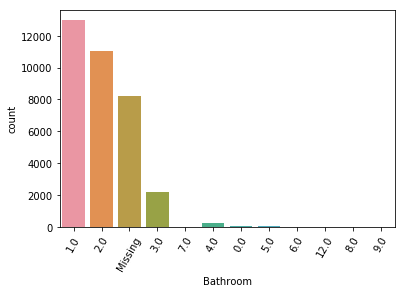

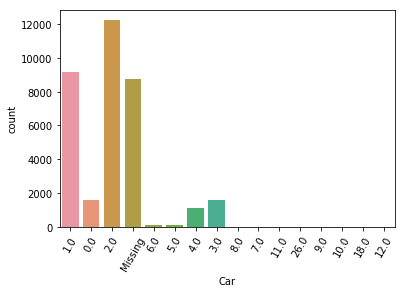

In [27]:
num_feat = ['Rooms', 'Bathroom', 'Car']
for i in num_feat:
    df_housing[i] = df_housing[i].fillna('Missing')
    sns.countplot(data=df_housing, x=i)
    plt.xticks(rotation=60)
    plt.show()

In [28]:
df_housing.info() #with the previous loop, filling the missing with "Missing", I'll have Bath and Car from int/float into "object" (Room does not have any misssing so it remains "int")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 22 columns):
Suburb           34857 non-null category
Address          34857 non-null category
Rooms            34857 non-null int64
Type             34857 non-null category
Price            27247 non-null float64
Method           34857 non-null category
SellerG          34857 non-null category
Date             34857 non-null datetime64[ns]
Distance         34856 non-null float64
Postcode         34856 non-null category
Bathroom         34857 non-null object
Car              34857 non-null object
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null category
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null category
Propertycount    34854 non-null float64
Bath_clean       26631 non-null float64
Car_clean        26129 non-null float64


In [29]:
df_housing["Bathroom"].value_counts()

1.0        12969
2.0        11064
Missing     8226
3.0         2181
4.0          269
5.0           77
0.0           46
6.0           16
7.0            4
8.0            3
12.0           1
9.0            1
Name: Bathroom, dtype: int64

In [30]:
df_housing[(df_housing["Bathroom"] == 0) & (df_housing["Landsize"] <= 50)]
# we obtain 24 (out of 46) with no bath & no landsize (& NaN on BArea..)


Suburb              Address  Rooms Type      Price Method  \
481           Armadale      3/50 Denbigh Rd      2    u   546000.0     SP   
845          Balaclava       5/11 Albion St      2    u   497500.0     PI   
1772          Brighton            17 New St      3    h  1900000.0      S   
1784          Brighton          1/5 Webb St      3    t  1067000.0      S   
3717         Eaglemont     3/43 Waldemar Rd      3    t        NaN     SN   
3812       Elsternwick      5/29 Nepean Hwy      2    u   410000.0     VB   
4434         Footscray        2 Greenham Pl      2    t        NaN     SA   
4637         Glen Iris      1/64 Edgar St N      2    u   545000.0      S   
5590           Ivanhoe    5/125 Locksley Rd      2    u   460000.0     VB   
5827        Kensington        7/51 Epsom Rd      2    u   526000.0      S   
6249           Malvern  4/382 Glenferrie Rd      3    u        NaN     SP   
6263           Malvern         42 Cressy St      2    h   780000.0     VB   
6713         Melbourne  4215/220 Spencer St      2    u        NaN      W   
9174   South Melbourne        14a Napier St      2    u        NaN      S   
9280       South Yarra     82/390 Toorak Rd      3    u  1072000.0      S   
9389       South Yarra       2/28 Tivoli Pl      2    u   910000.0      S   
10485           Toorak     1/183 Kooyong Rd      2    u   857000.0      S   
10518           Toorak     6/183 Kooyong Rd      2    u   866000.0      S   
10519           Toorak     18/637 Orrong Rd      2    u        NaN      S   
10879       Yarraville      1/53 Stephen St      2    u   410000.0     PI   
11174   East Melbourne       37/22 Agnes St      2    u   740000.0     SP   
11193   East Melbourne      9/35 Powlett St      2    u   872000.0      S   
14870   Caulfield East       5/33 Grange Rd      2    u   350000.0     SP   
17865        Balaclava      9/36 The Avenue      2    u   700000.0     SP   

             SellerG       Date  Distance Postcode Bathroom Car  Landsize  \
481    hockingstuart 2016-07-30       6.3   3143.0        0   0       0.0   
845    hockingstuart 2016-08-28       6.6   3183.0        0   0       0.0   
1772        Marshall 2016-06-08      11.2   3186.0        0   0       0.0   
1784             Kay 2016-07-05      11.2   3186.0        0   1       0.0   
3717           Miles 2016-08-10      10.3   3084.0        0   0       0.0   
3812            Gary 2016-05-28       8.5   3185.0        0   0       0.0   
4434           Reach 2016-07-16       6.4   3011.0        0   0       0.0   
4637       Fletchers 2016-07-16       9.2   3146.0        0   0       0.0   
5590       Fletchers 2016-04-16       7.9   3079.0        0   0       0.0   
5827          Nelson 2016-08-22       4.2   3031.0        0   0       0.0   
6249        Marshall 2016-07-11       7.4   3144.0        0   0       0.0   
6263          Jellis 2016-05-14       7.4   3144.0        0   0       0.0   
6713           Pagan 2016-06-18       2.8   3000.0        0   0       0.0   
9174        Marshall 2016-05-22       2.1   3205.0        0   0       0.0   
9280             Kay 2016-08-13       3.3   3141.0        0   0       0.0   
9389        Williams 2016-08-28       3.3   3141.0        0   0       0.0   
10485          Walsh 2016-08-22       4.6   3142.0        0   0       0.0   
10518       Marshall 2016-07-30       4.6   3142.0        0   0       0.0   
10519         Jellis 2016-07-30       4.6   3142.0        0   0       0.0   
10879  hockingstuart 2016-06-08       7.0   3013.0        0   0       0.0   
11174       Woodards 2016-08-10       1.5   3002.0        0   0       0.0   
11193         Dingle 2016-05-28       1.5   3002.0        0   0       0.0   
14870           Gary 2017-03-06       8.4   3145.0        0   0       0.0   
17865       Marshall 2017-12-08       6.4   3183.0        0   0       0.0   

       BuildingArea  YearBuilt                CouncilArea  Lattitude  \
481             NaN        NaN   Stonnington City Council  -37.85680   
845             NaN 

We spot 9 houses with 7+ bathrooms, while at the same time there are 46 houses without a single bathroom.
Let's try to have a deeper look:

From this subset of _"non-bathroom houses"_ we can highlight the absence of landsize and building area too. One possibility could be that these houses are vey old houses with a common bathoom outside the house. But the fact is that also _YearBuilt_ is missing in this subset, so we can not be sure about this hypothesis.

Among these 24 observations, there are 6 that does not have a value for _Price_, we can delete these ones, while we will take into account the others trying to fix them in the _Imputation_ part of this project.


In [31]:
df_housing_old = df_housing.copy() #create a copy of the previous df
df_housing;

In [32]:
#delete these 6 rows
df_housing.drop(df_housing[(df_housing["Bathroom"] == 0) & (df_housing["Landsize"] <= 50) & (pd.isna(df_housing['Price']))].index, inplace=True)
df_housing = df_housing.reset_index(); #reset index in order to avoid missing "rows"
df_housing.info(); #check! it should be 34851 entries (from 34857)
df_housing.drop(columns=['index'], inplace=True, axis=1); #drop the index column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34851 entries, 0 to 34850
Data columns (total 23 columns):
index            34851 non-null int64
Suburb           34851 non-null category
Address          34851 non-null category
Rooms            34851 non-null int64
Type             34851 non-null category
Price            27247 non-null float64
Method           34851 non-null category
SellerG          34851 non-null category
Date             34851 non-null datetime64[ns]
Distance         34850 non-null float64
Postcode         34850 non-null category
Bathroom         34851 non-null object
Car              34851 non-null object
Landsize         23041 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34848 non-null category
Lattitude        26875 non-null float64
Longtitude       26875 non-null float64
Regionname       34848 non-null category
Propertycount    34848 non-null float64
Bath_clean       26625 non-null float64
Ca

In [33]:
df_housing['Bath_clean'].describe()

count    26625.000000
mean         1.625164
std          0.723883
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         12.000000
Name: Bath_clean, dtype: float64

In [34]:
df_housing[(df_housing["Bath_clean"] > 6) & (df_housing["Rooms"] < 7)]

Suburb           Address  Rooms Type      Price Method  \
1004          Balwyn   29 Sevenoaks St      5    h  3900000.0     PI   
2536         Burwood     36 Cumming St      3    h        NaN     PI   
8247         Preston     421 Murray Rd      4    h   760000.0     PI   
30123  Brighton East  11 Summerhill Rd      5    h        NaN     VB   

        SellerG       Date  Distance Postcode Bathroom Car  Landsize  \
1004     Jellis 2016-08-28       9.7   3103.0        7   6       0.0   
2536       Ross 2016-08-10      11.7   3125.0       12   0     946.0   
8247      Barry 2016-05-22       8.8   3072.0        8   7    1254.0   
30123  Marshall 2017-09-12      10.3   3187.0        7   2     650.0   

       BuildingArea  YearBuilt              CouncilArea  Lattitude  \
1004            NaN        NaN  Boroondara City Council  -37.80490   
2536            NaN     1950.0      Monash City Council  -37.85300   
8247          280.0     1928.0     Darebin City Council  -37.73670   
30123         117.0     1930.0     Bayside City Council  -37.91794   

       Longtitude             Regionname  Propertycount  Bath_clean  Car_clean  
1004    145.07480  Southern Metropolitan         5682.0         7.0        6.0  
2536    145.11290  Southern Metropolitan         5678.0        12.0        0.0  
8247    144.98950  Northern Metropolitan        14577.0         8.0        7.0  
30123   145.01271  Southern Metropolitan         6938.0         7.0        2.0

Here we have 4(out of 9) houses with more bathrooms than rooms (already seen that house with "12 bathrooms": typing error).
One curious fact is that the one without landsize(& BuildingArea) is the most expensive between those kind of houses

Morever we can see that 3 out of 4 are old houses (built in 1950 or before), having a huge value of landsize. For now we decide to keep this observations.

In [35]:
#drop Bath_clean columns
df_housing.drop(columns=['Bath_clean'], inplace=True, axis=1)

In [36]:
df_housing["Car"].value_counts()

2.0        12214
1.0         9164
Missing     8728
0.0         1625
3.0         1606
4.0         1161
5.0          151
6.0          140
7.0           25
8.0           23
10.0           6
9.0            3
11.0           2
26.0           1
18.0           1
12.0           1
Name: Car, dtype: int64

In [37]:
# try another method to visualise multplie value of the same feature (Car in this case)
# high value of "car" (parking spots) in relation with landsize (and price..if we find in these "outliers" missing values of price we might decide to delete the observations)
for i in (9,10, 11,12,18,26): #value range for the values of car >8
    print(df_housing[(df_housing["Car"] == i)] );#are there typing errors? Is there a relationship between high values of car spot and landsize?

                 Suburb             Address  Rooms Type      Price Method  \
14645      Surrey Hills  1093 Riversdale Rd      3    h  2100000.0     VB   
30984  Hoppers Crossing       21 Madison Dr      4    h        NaN     PI   
33151        Camberwell      1299 Toorak Rd      4    h  2000000.0     PI   

      SellerG       Date  Distance Postcode Bathroom Car  Landsize  \
14645  Jellis 2017-01-07      10.2   3127.0        1   9     841.0   
30984    Gold 2018-03-02      18.4   3029.0        2   9       NaN   
33151      RT 2018-03-17       7.7   3124.0        3   9     601.0   

       BuildingArea  YearBuilt              CouncilArea  Lattitude  \
14645         124.0     1960.0  Boroondara City Council  -37.83729   
30984         180.0     1974.0     Wyndham City Council  -37.88496   
33151           NaN        NaN  Boroondara City Council  -37.84938   

       Longtitude             Regionname  Propertycount  Car_clean  
14645   145.10929  Southern Metropolitan         5457.0     

In [38]:
df_housing["Landsize"].describe()

count     23041.000000
mean        593.753570
std        3399.270975
min           0.000000
25%         224.000000
50%         521.000000
75%         670.000000
max      433014.000000
Name: Landsize, dtype: float64

If we look at these 14 "observations" with high values of _Car_ we can easily spot that they are quite correlated with high values of _Landsize_ too. All but one are greater than the mean value of Landsize and bigger than the 3rd quartile.

The one with the highest car value (26) is also the one with the smallest Landsize value in this subset. It also show a missing value in _Price_ (together with other four observation). We can proceed to eliminate these five rows/obs (that doesn't have a price value)

In [39]:
df_housing.drop(df_housing[(df_housing["Car_clean"] > 8)  & (pd.isna(df_housing['Price']))].index, inplace=True)
df_housing = df_housing.reset_index(); #reset index in order to avoid missing "rows"
df_housing.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34846 entries, 0 to 34845
Data columns (total 22 columns):
index            34846 non-null int64
Suburb           34846 non-null category
Address          34846 non-null category
Rooms            34846 non-null int64
Type             34846 non-null category
Price            27247 non-null float64
Method           34846 non-null category
SellerG          34846 non-null category
Date             34846 non-null datetime64[ns]
Distance         34845 non-null float64
Postcode         34845 non-null category
Bathroom         34846 non-null object
Car              34846 non-null object
Landsize         23037 non-null float64
BuildingArea     13738 non-null float64
YearBuilt        15548 non-null float64
CouncilArea      34843 non-null category
Lattitude        26870 non-null float64
Longtitude       26870 non-null float64
Regionname       34843 non-null category
Propertycount    34843 non-null float64
Car_clean        26118 non-null float64
dt

In [40]:
# Let's drop "Car_clean"column.
df_housing.drop(columns=['Car_clean'], inplace=True, axis=1)
df_housing.head();
df_housing.drop(columns=['index'], inplace=True, axis=1);

Moving on BuildingArea and Landsize observation (extreme values).

In [41]:
# Infer about min/max values of BuildingArea and Landsize
df_housing['Landsize'].describe()
df_housing[df_housing['Landsize']>17600] #values > than mean+5*stdev

Suburb            Address  Rooms Type      Price Method  \
1198     Balwyn North        9 Gildan St      3    h  2000000.0     VB   
6586      Maribyrnong    44/2 Horizon Dr      2    u   495000.0      S   
7780   Port Melbourne    36/3 Seisman Pl      2    u  1340000.0     VB   
8593        Reservoir       14 Beenak St      3    h   572000.0      S   
13454  Port Melbourne    55/4 Seisman Pl      2    u  1030000.0      S   
15101     Maribyrnong     2/6 Horizon Dr      2    u   585000.0      S   
16531          Silvan        1 Parker Rd      4    h  1070000.0      S   
17285          Silvan      16 Eleanor Dr      3    h  1085000.0      S   
18028         Fitzroy        389 Gore St      3    h  2700000.0     VB   
18523        Gisborne     21 Braeside Rd      4    h   807000.0      S   
20531        Gisborne    204 Panorama Dr      4    h   780000.0      S   
22624    New Gisborne     71 Hamilton Rd      5    h  1355000.0      S   
24405        Gisborne    3 Bloomfield Rd      3    h   820000.0      S   
24792        Wildwood    430 Wildwood Rd      5    h  1030000.0      S   
25956  Gisborne South      31 Stanton Ct      3    h   930000.0      S   
26860    Bullengarook         65 Webb Rd      4    h  1050000.0     PI   
28685  Gisborne South      47 Tweddle Rd      4    h  1350000.0     SA   
29982      Wonga Park      16 Fulford Rd      3    h        NaN     PI   
31394          Wallan     20 The Heights      3    h        NaN     PI   
32209    Wandin North  237 Warburton Hwy      4    h  1150000.0     PI   
32566    Diggers Rest    55 Morefield Ct      4    h        NaN     PI   
34044    Bullengarook      11 Dohoney Rd      4    h   865000.0      S   

         SellerG       Date  Distance Postcode Bathroom      Car  Landsize  \
1198         Kay 2016-08-28       9.2   3104.0        1        2   75100.0   
6586        Brad 2017-03-18       8.7   3032.0        2        2   37000.0   
7780    Chisholm 2016-03-12       3.8   3207.0        2        2   21700.0   
8593         Ray 2016-04-23      11.2   3073.0        1        2   41400.0   
13454     Buxton 2017-04-29       3.8   3207.0        2        2   21715.0   
15101       Brad 2017-03-06       4.3   3032.0        2        2   37000.0   
16531        Ray 2017-06-24      34.6   3795.0        2        3   38490.0   
17285  Harcourts 2017-05-27      34.6   3795.0        2        2   76000.0   
18028        Kay 2017-12-08       2.1   3065.0        3        1  433014.0   
18523      Raine 2017-07-15      45.9   3437.0        2        3   40468.0   
20531      Raine 2017-09-09      45.9   3437.0        3        2   20200.0   
22624      Raine 2017-09-23      48.1   3438.0        3        5   44500.0   
24405      Raine 2017-10-14      45.9   3437.0        2        2   21600.0   
24792         RE 2017-10-14      31.7   3429.0        2        2   89030.0   
25956      Raine 2017-10-28      45.9   3437.0        2        4   40468.0   
26860      Raine 2017-11-11      45.9   3437.0        2        1  146699.0   
28685         RT 2017-11-25      45.9   3437.0        2        8   40469.0   
29982     Jellis 2018-06-01      25.2   3115.0        1  Missing   39300.0   
31394    Ruralco 2018-01-20      44.2   3756.0        2        2   23970.0   
32209        Max 2018-03-03      35.2   3139.0        2        2   40500.0   
32566       Brad 2018-02-17      27.7   3427.0        2  Missing   80000.0   
34044      Raine 2018-02-24      45.9   3437.0        2        0   42800.0   

       BuildingArea  YearBuilt                   CouncilArea  Lattitude  \
1198            NaN        NaN       Boroondara City Council  -37.80020   
6586            NaN        NaN      Maribyrnong City Council  -37.77520   
7780            NaN     2000.0        Melbourne City Council  -37.84240   
8593            NaN        NaN          Darebin City Council  -37.71040   
13454          99.0     2005.0        Melbourne City Council  -37.84240   
15101          90.0     2004.0      Maribyrnong City Council  -37.7

In this subset most houses have a missing value of _BuildingArea_, while 3 have a missing value in _Price_. If we combined those ones with 'NAs' both on Price and Building Area we obtained two observations (index 29982 and 32556) that we can delete.

Moreover we see an unexpected value for the observation 22624, having a BuildingArea greater than its Landsize. We will try to fix successively; while a striking outlier in Landsize is detected on the observation 18028 with more than 43k square meters.

In [42]:
#drop these 2 obs
df_housing.drop(df_housing[(df_housing['Landsize']>17600) & (pd.isna(df_housing['BuildingArea'])) & (pd.isna(df_housing['Price']))].index, inplace=True)
df_housing = df_housing.reset_index(); #reset index in order to avoid missing "rows"
df_housing.drop(columns=['index'], inplace=True, axis=1)
df_housing.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34844 entries, 0 to 34843
Data columns (total 20 columns):
Suburb           34844 non-null category
Address          34844 non-null category
Rooms            34844 non-null int64
Type             34844 non-null category
Price            27247 non-null float64
Method           34844 non-null category
SellerG          34844 non-null category
Date             34844 non-null datetime64[ns]
Distance         34843 non-null float64
Postcode         34843 non-null category
Bathroom         34844 non-null object
Car              34844 non-null object
Landsize         23035 non-null float64
BuildingArea     13738 non-null float64
YearBuilt        15548 non-null float64
CouncilArea      34841 non-null category
Lattitude        26868 non-null float64
Longtitude       26868 non-null float64
Regionname       34841 non-null category
Propertycount    34841 non-null float64
dtypes: category(8), datetime64[ns](1), float64(8), int64(1), object(2)
memory u

In [43]:
# Check on min values
df_housing[df_housing['Landsize']<50]; #we have more than 2000 obs, but the most have '0' as value of Landsize. 
df_housing[(df_housing['Landsize']<50) & (df_housing['Landsize']>0) &(df_housing["BuildingArea"] > 50)]

Suburb                   Address  Rooms Type      Price Method  \
3417           Coburg                14 Rose St      4    h  1150000.0     PI   
14172          Toorak          32/637 Orrong Rd      3    t  1320000.0      S   
16922       Footscray           6/6 Rosamond Rd      2    t   455000.0      S   
17428       Bentleigh            4/463 South Rd      2    u   380000.0     PI   
17552   Glen Waverley             53 Botanic Dr      3    h        NaN     SN   
17809  West Melbourne        125/33 Jeffcott St      2    u   670000.0      S   
18460     Craigieburn  28/60 Cradle Mountain Dr      2    t   310000.0     PI   
22692         Prahran               7 MacKay St      3    t  1463000.0      S   

      SellerG       Date  Distance Postcode Bathroom Car  Landsize  \
3417    Peter 2016-07-26       7.8   3058.0        2   2      43.0   
14172    Gary 2017-04-29       4.6   3142.0        2   1       3.0   
16922  Biggin 2017-05-27       5.1   3011.0        1   1      43.0   
17428  Hodges 2017-08-07      11.4   3204.0        1   1       1.0   
17552      JY 2017-08-07      16.7   3150.0        1   2       1.0   
17809    MICM 2017-08-07       3.1   3003.0        1   1      17.0   
18460     Ray 2017-07-15      20.6   3064.0        1   1      38.0   
22692  Jellis 2017-09-23       4.6   3181.0        2   2      15.0   

       BuildingArea  YearBuilt               CouncilArea  Lattitude  \
3417          205.0     1930.0      Darebin City Council  -37.74560   
14172         131.0     1970.0  Stonnington City Council  -37.84740   
16922          86.0     2010.0  Maribyrnong City Council  -37.78822   
17428          62.0     2011.0    Glen Eira City Council  -37.93320   
17552         102.0     1960.0       Monash City Council  -37.89464   
17809          90.0     1996.0    Melbourne City Council  -37.81180   
18460         114.0     2013.0         Hume City Council  -37.57467   
22692         147.0     1998.0  Stonnington City Council  -37.84969   

       Longtitude             Regionname  Propertycount  
3417    144.94690  Northern Metropolitan        11204.0  
14172   145.01250  Southern Metropolitan         7217.0  
16922   144.88361   Western Metropolitan         7570.0  
17428   145.03794  Southern Metropolitan         6795.0  
17552   145.16600   Eastern Metropolitan        15321.0  
17809   144.95259  Northern Metropolitan         2230.0  
18460   144.92229  Northern Metropolitan        15510.0  
22692   145.00057  Southern Metropolitan         7717.0

Houses with zero on _Landsize_ caught my attention, and after some researches (in Kaggle and on google), we have found out that these houses probably are the so-called _"zero-lot-line"_ houses. In other words residential real estate in which the structure comes up to or very near the edge of the property line  (https://www.investopedia.com/terms/z/zero-lot-line-house.asp, https://www.kaggle.com/stephaniestallworth/melbourne-housing-market-eda-and-regression).

Therefore, these observations are valid and will remain the data set.

Moreover we will create a new feature (in the Feature Engineering) that takes into account Landsize and BuildingArea.


In [44]:
# Check on "unexpected" values: Landsize less than BArea
df_housing[(df_housing['Landsize']<df_housing['BuildingArea']) & (df_housing['Landsize']>0) ]

Suburb               Address  Rooms Type      Price Method  \
4           Abbotsford          5 Charles St      3    h  1465000.0     SP   
6           Abbotsford           55a Park St      4    h  1600000.0     VB   
39          Abbotsford       1/1 Mayfield St      3    h        NaN     SP   
43          Abbotsford        52a William St      2    h  1100000.0     PI   
49          Abbotsford      48 Abbotsford St      3    h  1447500.0     PI   
51          Abbotsford           159 Park St      2    h  1135000.0      S   
59          Abbotsford           45 Yarra St      3    h  1195000.0     SP   
136        Albert Park          94 Graham St      3    h  1850000.0      S   
142        Albert Park     104 Richardson St      4    h  2300000.0      S   
145        Albert Park          1 Moubray St      3    h  1800000.0     VB   
149        Albert Park         24 Kerferd Pl      3    h  1800000.0      S   
152        Albert Park           2 Dundas Pl      3    h  2615000.0      S   
172        Albert Park          55 Merton St      3    h  2100000.0     SP   
255             Altona         4/57 Blyth St      3    u   730000.0     SP   
337       Altona North            21 Neal Ct      3    h   770000.0     SP   
368           Armadale         4/769 High St      3    t  1205000.0      S   
601          Ashburton        3/39 Solway St      3    t  2050000.0      S   
827          Balaclava       1/34 Gourlay St      2    t  1015000.0      S   
940             Balwyn        5/95 Balwyn Rd      2    u   754000.0     PI   
1110      Balwyn North       15 Illawarra Rd      3    h  1903000.0      S   
1218         Bentleigh         3/2 Scotts St      2    t   851000.0      S   
1265         Bentleigh         2/7 Gordon St      2    u   855000.0      S   
1296         Bentleigh         2/1 Corbie St      3    t   825000.0      S   
1323         Bentleigh          20 Wright St      4    h  1150000.0     PI   
1333         Bentleigh          40 Coates St      2    t   680000.0     PI   
1385    Bentleigh East      2/25 Birdwood St      2    u   495000.0      S   
1566    Bentleigh East        2/8 Rudyard St      3    t   700000.0     PI   
1661          Box Hill          4/7 James St      2    u        NaN     SN   
1684          Box Hill  7/1102 Whitehorse Rd      3    t        NaN     SN   
1918          Brighton       3/198 Church St      1    u   671000.0      S   
...                ...                   ...    ...  ...        ...    ...   
31894     Malvern East         23 Vickery St      2    t   700000.0     VB   
31911      Middle Park     308 Richardson St      4    h  3150000.0     VB   
31966  North Melbourne          42 Curzon St      2    h        NaN     SP   
32276   Brunswick East         33 Roberts St      3    t        NaN      S   
32287       Camberwell            30 Judd St      4    h        NaN      S   
32422       Abbotsford      16 Federation La      3    h   955000.0      S   
32499          Burnley        2b Cherrill St      3    h  1940000.0      S   
32836  South Melbourne          257 Moray St      3    h  2200000.0     PI   
32979        Aspendale        137 Nepean Hwy      3    t        NaN     PI   
33392     Hampton East        1 Henrietta St      4    t  1180000.0     PI   
33517      Middle Park           8 Wright St      3    h        NaN     SP   
33675         Richmond           6 Albert Pl      3    h  1798000.0      S   
33678         Richmond          9 Bosisto St      3    h  1150000.0      S   
33679         Richmond     184 Buckingham St      3    t  1150000.0     SP   
33726  South Melbourne        10 Bridport St      3    h  3050000.0      S   
33745      South Yarra         45 Osborne St      2    h        NaN     PI   
33802     Taylors Hill            15 Park La      3    h   655000.0      S   
33803      Templestowe            3 Beale Ct      4    h  1488000.0      S   
34030   Brunswick East          63 Albert St      4    h  1500000.0      S   
34078    Carlton North        485 Stat

In [45]:
# Replace unexpect values with Landsize Value
df_housing_new = df_housing.copy(); #df copy per sicurezza
df_housing['BuildingArea_Replace'] = np.where( ( (df_housing['Landsize']<df_housing['BuildingArea']) & (df_housing['Landsize']>0) ) , df_housing['Landsize'], df_housing['BuildingArea'])

In [46]:
# check 
df_housing[(df_housing['Landsize']<df_housing['BuildingArea_Replace']) & (df_housing['Landsize']>0) ] #null list, ok!

Empty DataFrame
Columns: [Suburb, Address, Rooms, Type, Price, Method, SellerG, Date, Distance, Postcode, Bathroom, Car, Landsize, BuildingArea, YearBuilt, CouncilArea, Lattitude, Longtitude, Regionname, Propertycount, BuildingArea_Replace]
Index: []

In [47]:
# select those ones with "missing" Price (then delete these obs)
df_housing[(df_housing['Landsize']<df_housing['BuildingArea']) & (df_housing['Landsize']>0) & (pd.isna(df_housing['Price']))]

Suburb               Address  Rooms Type  Price Method  \
39          Abbotsford       1/1 Mayfield St      3    h    NaN     SP   
1661          Box Hill          4/7 James St      2    u    NaN     SN   
1684          Box Hill  7/1102 Whitehorse Rd      3    t    NaN     SN   
2115     Brighton East        4/9 Billson St      2    t    NaN     SP   
2914     Carlton North        377 Canning St      3    h    NaN      S   
3126   Caulfield South           12 Cedar St      3    t    NaN     SN   
3215      Clifton Hill    5/118 Roseneath St      3    t    NaN      S   
3251      Clifton Hill        45 Clifford Pl      3    h    NaN      S   
3501      Coburg North         3/7 Shorts Rd      2    t    NaN     PI   
3835            Elwood      2/99 Tennyson St      2    t    NaN      S   
3998          Essendon        75 Primrose St      4    h    NaN      S   
4220           Fitzroy         4 Garfield St      2    h    NaN      S   
4666         Glen Iris     2/6 Summerhill Rd      2    t    NaN      S   
4922         Gowanbrae         11 Seggan Cir      3    t    NaN     SN   
6249           Malvern         20 Norfolk Pl      3    t    NaN      S   
6772       Middle Park          87 Carter St      3    h    NaN      S   
7077           Newport           50 Alma Tce      4    h    NaN     SN   
7214   North Melbourne       112 Dryburgh St      4    h    NaN     PI   
7327         Northcote          31 Claude St      3    h    NaN     SN   
7735       Pascoe Vale        3/36 Alpine Gr      3    t    NaN     VB   
7756       Pascoe Vale       5/13 Rhodes Pde      2    t    NaN     PI   
7852    Port Melbourne        223 Princes St      2    h    NaN     SN   
8687         Reservoir         43 Cheddar Rd      3    h    NaN     PN   
8729          Richmond         23 Abinger St      3    h    NaN     PI   
8757          Richmond        31b Bosisto St      2    h    NaN     PI   
8761          Richmond        383 Highett St      3    h    NaN     PI   
8777          Richmond        36b Corsair St      3    t    NaN      S   
8806          Richmond            11 Kent St      3    h    NaN     PI   
8831          Richmond        225 Highett St      3    h    NaN     VB   
8885          Richmond      53 Botherambo St      2    h    NaN     PI   
...                ...                   ...    ...  ...    ...    ...   
17928         Bundoora           4 Nathan Ct      5    h    NaN     PI   
18551    Hawthorn East      7/1 Maraquita Gr      4    h    NaN      S   
19539     Malvern East         56 Millewa Av      2    h    NaN      S   
19669      South Yarra       10E Cromwell Rd      3    t    NaN      S   
21043          Carlton       110 Cardigan St      5    h    NaN     SP   
22009  North Melbourne     219 Flemington Rd      4    h    NaN      S   
22640  North Melbourne          17 Shands La      2    t    NaN     PI   
23038    Carlton North        426 Canning St      3    h    NaN      S   
23102           Elwood         382 Barkly St      3    h    NaN      S   
25357  South Melbourne         257A Moray St      2    h    NaN     SN   
26257        Northcote          62 Andrew St      3    h    NaN     SP   
26526           Toorak            26 Ross St      3    h    NaN      S   
26932         Cremorne           23 Kelso St      3    h    NaN      S   
27286         Ringwood         33 William St      2    h    NaN     SN   
28932  North Melbourne     494 Abbotsford St      4    h    NaN      S   
29069      South Yarra           76 River St      4    t    NaN     SN   
30153          Burwood            4 Narmi Ct      4    h    NaN     PI   
31013          Preston          81 Wilcox St      4    h    NaN     PI   
31554         Bundoora           11 Jones Ct      3    h    NaN     PI   
31698           Elwood        10 Kingsley St      4    h    NaN     SN   
31966  North Melbourne          42 Curzon St      2    h    NaN     SP   
32276   Brunswick East         33 Roberts St      3    t    NaN      S   
32287       Camberwe

In [48]:
# previous 112 obs that we proceed to delete
df_housing.drop(df_housing[(df_housing['Landsize']<df_housing['BuildingArea']) & (df_housing['Landsize']>0) & (pd.isna(df_housing['Price']))].index, inplace=True)
df_housing = df_housing.reset_index(); #reset index in order to avoid missing "rows"
df_housing.drop(columns=['index'], inplace=True, axis=1) #drop column index
df_housing.info(); #34732 (34844-112) #of obs remaining

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34732 entries, 0 to 34731
Data columns (total 21 columns):
Suburb                  34732 non-null category
Address                 34732 non-null category
Rooms                   34732 non-null int64
Type                    34732 non-null category
Price                   27247 non-null float64
Method                  34732 non-null category
SellerG                 34732 non-null category
Date                    34732 non-null datetime64[ns]
Distance                34731 non-null float64
Postcode                34731 non-null category
Bathroom                34732 non-null object
Car                     34732 non-null object
Landsize                22923 non-null float64
BuildingArea            13626 non-null float64
YearBuilt               15448 non-null float64
CouncilArea             34729 non-null category
Lattitude               26756 non-null float64
Longtitude              26756 non-null float64
Regionname              34729 non-n

In [49]:
# Investigate in BArea (max and min values)
df_housing['BuildingArea'].describe()

count    13626.000000
mean       159.227319
std        399.729613
min          0.000000
25%        102.000000
50%        135.000000
75%        187.000000
max      44515.000000
Name: BuildingArea, dtype: float64

In [50]:
# Investigate in BArea (max and min values)
df_housing[df_housing['BuildingArea']>2160] #values > than mean+5*stdev

Suburb          Address  Rooms Type      Price Method   SellerG  \
2462         Bulleen  19 Warringal St      4    h  1280000.0      S     Barry   
2700      Camberwell  46 Athelstan Rd      5    h  2608000.0      S  Marshall   
4243   Fitzroy North   186 Queens Pde      2    t   930000.0      S    Nelson   
22536   New Gisborne   71 Hamilton Rd      5    h  1355000.0      S     Raine   
33286   Hampton East   1 Henrietta St      4    t  1180000.0     PI  Woodards   

            Date  Distance Postcode Bathroom Car  Landsize  BuildingArea  \
2462  2017-11-03      11.8   3105.0        1   2     732.0        6791.0   
2700  2016-10-15       7.8   3124.0        2   4     730.0        3112.0   
4243  2016-03-09       3.5   3068.0        3   0    2778.0        3558.0   
22536 2017-09-23      48.1   3438.0        3   5   44500.0       44515.0   
33286 2018-03-17      13.8   3188.0        3   2     674.0        6178.0   

       YearBuilt                   CouncilArea  Lattitude  Longtitude  \
2462         NaN       Manningham City Council  -37.76150   145.08970   
2700      1920.0       Boroondara City Council  -37.84240   145.06390   
4243         NaN         Moreland City Council  -37.79030   144.98590   
22536        NaN  Macedon Ranges Shire Council  -37.45392   144.58864   
33286        NaN          Bayside City Council  -37.93825   145.03600   

                  Regionname  Propertycount  BuildingArea_Replace  
2462    Eastern Metropolitan         4480.0                 732.0  
2700   Southern Metropolitan         8920.0                 730.0  
4243   Northern Metropolitan         6244.0                2778.0  
22536      Northern Victoria          849.0               44500.0  
33286  Southern Metropolitan         2356.0                 674.0

Ok, we had already fixed these "high values" adding the _BuildingArea__Replace_ column. Nevertheless we have a suspect outlier with 44500 on Building area that might be reduced a little.



In [51]:
df_housing['BuildingArea'].sort_values(ascending = False); #sort desc values before BuildingArea_Replace
df_housing['BuildingArea_Replace'].sort_values(ascending = False);

The (former) top5 obersvationss with the highest values on BArea were replaced with "more ordinary" values, so we can clearly modify the value of the last one from 44500 ( _BuildingArea__Replace_ value) with 4451.5 (that was the original value of BuildingArea divided by 10)

In [52]:
# change value of BArea/BArea_Replace
df_housing['BuildingArea'].replace(44515.0, 4451.5, inplace=True)
df_housing['BuildingArea_Replace'].replace(44500.0, 4451.5, inplace=True)

#check
df_housing[df_housing['BuildingArea']>2160]; #ok check

In [53]:
# Min values of BArea
df_housing[df_housing['BuildingArea']<10]; #we obtain 149 houses
df_housing[df_housing['BuildingArea']<1]; #77

It seems that 149  houses have a very small surface (with 77 of these that do not have any building area at all!).

One possibility is that these houses were sold only because of their landsize and geographical position, and that there was still no house builded in it. However, the majority of these has a value in _YearBuilt_, so it might be some incoherence in this case..Another possibility could be that these are simply data entry mistakes (again?).

In conclusion, I think there is something wrong with most of this subsample, so I will drop at least those ones with a "zero-building area".

In [54]:
# Drop these 77 obs (no Build_Area)
df_housing.drop(df_housing[(df_housing['BuildingArea']<1) ].index, inplace=True)
df_housing = df_housing.reset_index();
df_housing.info(); #check (34655 obs) 
df_housing.drop(columns=['index'], inplace=True, axis=1);
df_housing[(df_housing['BuildingArea']<1)]; #second check

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34655 entries, 0 to 34654
Data columns (total 22 columns):
index                   34655 non-null int64
Suburb                  34655 non-null category
Address                 34655 non-null category
Rooms                   34655 non-null int64
Type                    34655 non-null category
Price                   27186 non-null float64
Method                  34655 non-null category
SellerG                 34655 non-null category
Date                    34655 non-null datetime64[ns]
Distance                34654 non-null float64
Postcode                34654 non-null category
Bathroom                34655 non-null object
Car                     34655 non-null object
Landsize                22866 non-null float64
BuildingArea            13549 non-null float64
YearBuilt               15373 non-null float64
CouncilArea             34652 non-null category
Lattitude               26679 non-null float64
Longtitude              26679 non-nul

In [55]:
# Check on wrong Data (YearBuilt variable)
df_housing.loc[df_housing.YearBuilt>2018]

Suburb       Address  Rooms Type      Price Method   SellerG  \
2449     Bulleen  3 Maringa St      4    h        NaN     SP       Ray   
32841  Bentleigh    1 Wyuna Ct      3    h  1100000.0     VB  Woodards   

            Date  Distance Postcode Bathroom Car  Landsize  BuildingArea  \
2449  2016-07-11      11.8   3105.0        2   2     729.0         255.0   
32841 2018-03-17      11.4   3204.0        1   4     635.0         242.0   

       YearBuilt              CouncilArea  Lattitude  Longtitude  \
2449      2106.0  Manningham City Council  -37.76370   145.08810   
32841     2019.0   Glen Eira City Council  -37.92963   145.03666   

                  Regionname  Propertycount  BuildingArea_Replace  
2449    Eastern Metropolitan         4480.0                 255.0  
32841  Southern Metropolitan         6795.0                 242.0

Replace these 2 mistakes with a (possible) correct YearBuilt:
2106 should be 2016, while 2019 could be 2009, 2016 or even 2018 (even if
the house was sold in the early 2018). Moreover we can see that the Suburb is Bentleigh where "yearbuiilt"'s houses ranges from 1910 to 2018.. Let's have a look on Bentleigh's mode values:

In [56]:
df_bentleigh = df_housing.loc[df_housing.Suburb == 'Bentleigh'];#subDF of 319 obs (ok)
df_bentleigh.YearBuilt.value_counts(); #mode value of YearBuilt
# Mode value is 1950, followed by 1960,2012 e 1940..
# While 2016 has 2 obs, but 2018 does not have anyone, 2009 once and 2006 two obs.
# So we can replace wrong value with a proper one (choosing between 2006,2009,2016,2018)

In [58]:
## replace these 2 mistakes with a (possible) correct YearBuilt:
df_housing['YearBuilt'].replace([2106,2019],[2016,2016], inplace=True)
## re-check
df_housing.loc[df_housing.YearBuilt>2018] #check (ok)

Empty DataFrame
Columns: [Suburb, Address, Rooms, Type, Price, Method, SellerG, Date, Distance, Postcode, Bathroom, Car, Landsize, BuildingArea, YearBuilt, CouncilArea, Lattitude, Longtitude, Regionname, Propertycount, BuildingArea_Replace]
Index: []

## <a id='Second-Section'>2. Data Cleansing </a>

### Missing Data & Imputation
Let's re-check how many missing data each variable has on the housing datafram

In [59]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34655 entries, 0 to 34654
Data columns (total 21 columns):
Suburb                  34655 non-null category
Address                 34655 non-null category
Rooms                   34655 non-null int64
Type                    34655 non-null category
Price                   27186 non-null float64
Method                  34655 non-null category
SellerG                 34655 non-null category
Date                    34655 non-null datetime64[ns]
Distance                34654 non-null float64
Postcode                34654 non-null category
Bathroom                34655 non-null object
Car                     34655 non-null object
Landsize                22866 non-null float64
BuildingArea            13549 non-null float64
YearBuilt               15373 non-null float64
CouncilArea             34652 non-null category
Lattitude               26679 non-null float64
Longtitude              26679 non-null float64
Regionname              34652 non-n

In [60]:
# First replace (with coercion) all the string values ('Missing') to mark them as missing values and then convert it to float.
df_housing['Bathroom'] = pd.to_numeric(df_housing.Bathroom, errors='coerce')
df_housing['Car'] = pd.to_numeric(df_housing.Car, errors='coerce')

In [61]:
df_housing.isnull().sum().sort_values(ascending=False)

BuildingArea_Replace    21106
BuildingArea            21106
YearBuilt               19282
Landsize                11789
Car                      8719
Bathroom                 8226
Lattitude                7976
Longtitude               7976
Price                    7469
CouncilArea                 3
Regionname                  3
Propertycount               3
Postcode                    1
Distance                    1
Date                        0
SellerG                     0
Method                      0
Type                        0
Rooms                       0
Address                     0
Suburb                      0
dtype: int64

As already seen, we have a lot a missing values, especially on _BuildingArea_, _YearBuilt_ and _Landsize_.

Remember that we have both categorical and numerical features and some of these are "missclassified".

Let's begin with those features with very few missing value.

In [62]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34655 entries, 0 to 34654
Data columns (total 21 columns):
Suburb                  34655 non-null category
Address                 34655 non-null category
Rooms                   34655 non-null int64
Type                    34655 non-null category
Price                   27186 non-null float64
Method                  34655 non-null category
SellerG                 34655 non-null category
Date                    34655 non-null datetime64[ns]
Distance                34654 non-null float64
Postcode                34654 non-null category
Bathroom                26429 non-null float64
Car                     25936 non-null float64
Landsize                22866 non-null float64
BuildingArea            13549 non-null float64
YearBuilt               15373 non-null float64
CouncilArea             34652 non-null category
Lattitude               26679 non-null float64
Longtitude              26679 non-null float64
Regionname              34652 non

In [63]:
df_housing[(pd.isna(df_housing['Postcode']))]

Suburb       Address  Rooms Type     Price Method SellerG  \
29311  Fawkner Lot  1/3 Brian St      3    h  616000.0     SP    Brad   

            Date  Distance Postcode  Bathroom  Car  Landsize  BuildingArea  \
29311 2018-06-01       NaN      NaN       NaN  NaN       NaN           NaN   

       YearBuilt CouncilArea  Lattitude  Longtitude Regionname  Propertycount  \
29311        NaN         NaN        NaN         NaN        NaN            NaN   

       BuildingArea_Replace  
29311                   NaN

In [64]:
df_housing[(pd.isna(df_housing['CouncilArea']))] #same as NAs for PropertyCount and Regionname

Suburb           Address  Rooms Type     Price Method SellerG  \
18430    Footscray  2/16 Stafford St      2    u  710000.0      S     Jas   
26729   Camberwell   2/3 Kingsley St      2    h  825000.0     VB  Jellis   
29311  Fawkner Lot      1/3 Brian St      3    h  616000.0     SP    Brad   

            Date  Distance Postcode  Bathroom  Car  Landsize  BuildingArea  \
18430 2017-07-15       5.1   3011.0       NaN  NaN       NaN           NaN   
26729 2017-11-11       7.7   3124.0       NaN  NaN       NaN           NaN   
29311 2018-06-01       NaN      NaN       NaN  NaN       NaN           NaN   

       YearBuilt CouncilArea  Lattitude  Longtitude Regionname  Propertycount  \
18430        NaN         NaN        NaN         NaN        NaN            NaN   
26729        NaN         NaN        NaN         NaN        NaN            NaN   
29311        NaN         NaN        NaN         NaN        NaN            NaN   

       BuildingArea_Replace  
18430                   NaN  
26729                   NaN  
29311                   NaN

We can delete these observation, due to the fact that they do not bring information to our dataset (most features are missing)

In [65]:
df_housing.drop(df_housing[(pd.isna(df_housing['CouncilArea']))].index, inplace=True)
df_housing = df_housing.reset_index();
df_housing.drop(columns=['index'], inplace=True, axis=1);
df_housing[(pd.isna(df_housing['CouncilArea']))] ; #check


In [66]:
df_housing.tail() #check

Suburb           Address  Rooms Type      Price Method  \
34647  Yarraville       13 Burns St      4    h  1480000.0     PI   
34648  Yarraville     29A Murray St      2    h   888000.0     SP   
34649  Yarraville    147A Severn St      2    t   705000.0      S   
34650  Yarraville  12/37 Stephen St      3    h  1140000.0     SP   
34651  Yarraville  3 Tarrengower St      2    h  1020000.0     PI   

             SellerG       Date  Distance Postcode  Bathroom  Car  Landsize  \
34647            Jas 2018-02-24       6.3   3013.0       1.0  3.0     593.0   
34648        Sweeney 2018-02-24       6.3   3013.0       2.0  1.0      98.0   
34649            Jas 2018-02-24       6.3   3013.0       1.0  2.0     220.0   
34650  hockingstuart 2018-02-24       6.3   3013.0       NaN  NaN       NaN   
34651             RW 2018-02-24       6.3   3013.0       1.0  0.0     250.0   

       BuildingArea  YearBuilt               CouncilArea  Lattitude  \
34647           NaN        NaN  Maribyrnong City Council  -37.81053   
34648         104.0     2018.0  Maribyrnong City Council  -37.81551   
34649         120.0     2000.0  Maribyrnong City Council  -37.82286   
34650           NaN        NaN  Maribyrnong City Council        NaN   
34651         103.0     1930.0  Maribyrnong City Council  -37.81810   

       Longtitude            Regionname  Propertycount  BuildingArea_Replace  
34647   144.88467  Western Metropolitan         6543.0                   NaN  
34648   144.88826  Western Metropolitan         6543.0                  98.0  
34649   144.87856  Western Metropolitan         6543.0                 120.0  
34650         NaN  Western Metropolitan         6543.0                   NaN  
34651   144.89351  Western Metropolitan         6543.0                 103.0

In [67]:
df_housing.isnull().sum().sort_values(ascending=False) #check

BuildingArea_Replace    21103
BuildingArea            21103
YearBuilt               19279
Landsize                11786
Car                      8716
Bathroom                 8223
Lattitude                7973
Longtitude               7973
Price                    7469
CouncilArea                 0
Regionname                  0
Propertycount               0
Postcode                    0
Distance                    0
Date                        0
SellerG                     0
Method                      0
Type                        0
Rooms                       0
Address                     0
Suburb                      0
dtype: int64

In [68]:
df_housing[(pd.isna(df_housing['Price'])&(pd.isna(df_housing['Longtitude'])) &(pd.isna(df_housing['Lattitude'])))]

Suburb                Address  Rooms Type  Price Method  \
34            Abbotsford        16b Mollison St      2    h    NaN     PI   
59            Abbotsford      4/328 Johnston St      2    u    NaN     PI   
120         Airport West       2/89 Marshall Rd      3    u    NaN     VB   
206           Alphington       4/5 Chandler Hwy      4    t    NaN     PN   
210           Alphington            11 Tower Av      4    h    NaN      S   
290         Altona North         1/70 Misten Av      2    h    NaN      S   
292         Altona North          47 Ginifer Av      3    h    NaN     SN   
304         Altona North       29a The Broadway      4    t    NaN     PN   
315         Altona North           63a First Av      3    h    NaN     PI   
316         Altona North           59 Misten Av      2    h    NaN     PI   
347         Altona North         29 Cyclamen Av      2    h    NaN     PI   
357         Altona North          1/8 Fourth Av      3    h    NaN     PI   
378             Armadale          21 Lambeth Av      3    h    NaN      S   
383             Armadale          12 Alleyne Av      4    h    NaN      S   
397             Armadale          24 Lambeth Av      5    h    NaN      S   
416             Armadale          22 Lambeth Av      4    h    NaN     SN   
418             Armadale           5 Alleyne Av      4    h    NaN      S   
422             Armadale     11/26 Gladstone Av      2    u    NaN      S   
432             Armadale      5/8 Sutherland Rd      2    u    NaN     SP   
441             Armadale           30 Barkly Av      4    h    NaN      S   
442             Armadale      5/31 Inverness Av      2    u    NaN      S   
462             Armadale           3 Alleyne Av      4    h    NaN      S   
608            Ashburton        15 Lancaster St      4    h    NaN     SP   
610            Ashburton          1/4 Taylor St      2    h    NaN     VB   
639            Ashburton            11 Munro Av      4    h    NaN      S   
652            Ashburton        19 Lancaster St      3    h    NaN      S   
660            Ashburton             30 Glen Rd      4    h    NaN      S   
663            Ashburton         2/43 Warner Av      3    t    NaN     SP   
682              Ashwood          4 Mitchell Av      3    h    NaN     SP   
706              Ashwood       3/26 May Park Av      3    t    NaN     PI   
...                  ...                    ...    ...  ...    ...    ...   
34194                Kew         2/5 Asquith St      2    u    NaN     PN   
34195                Kew      1/184 Brougham St      2    t    NaN      S   
34197                Kew        3/324 Cotham Rd      3    u    NaN     SP   
34199                Kew           5/20 Duke St      2    u    NaN     SP   
34208                Kew   5/87 Studley Park Rd      2    u    NaN     VB   
34236        Lysterfield      11 Laanecoorie Dr      3    h    NaN     SN   
34237            MacLeod       6/82 Dunvegan Cr      2    u    NaN     PI   
34241            MacLeod            2/62 May St      2    u    NaN     PI   
34242            MacLeod         71 McNamara St      2    u    NaN     VB   
34245            Malvern       4/52 Cawkwell St      3    t    NaN     PI   
34268          Melbourne  1406/250 Elizabeth St      2    u    NaN     SN   
34371    North Melbourne       6/49 Brougham St      1    u    NaN     VB   
34391           Oakleigh           2/14 Gadd St      3    t    NaN     VB   
34396      Oakleigh East        2/15 Tullius Av      3    t    NaN      S   
34417     Port Melbourne        106/89 Beach St      2    u    NaN      S   
34418     Port Melbourne        506/89 Beach St      2    u    NaN     PN   
34425            Prahran        2/50 Chomley St      3    h    NaN     SP   
34455          Reservoir     2/45 St Vigeons Rd      2    t    NaN     SP   
34459           Richmond        406/8 Howard St      2    u    NaN     SP   
34470      Ringwood East          1/29 Kemps St      3    u    NaN     VB   
34500    South

As shown above, we have more than 1700 observations that do not have Price, longitude and latitude. So we proceed to try and fix them, starting the imputation from the variables: _Lattitude_ and _Longtitude_

In [69]:
df_housing['Lattitude'].groupby(df_housing['Regionname']).count()


Regionname
Eastern Metropolitan          3407
Eastern Victoria               187
Northern Metropolitan         7196
Northern Victoria              175
South-Eastern Metropolitan    1342
Southern Metropolitan         8879
Western Metropolitan          5388
Western Victoria               105
Name: Lattitude, dtype: int64

In [70]:
df_housing['Lattitude'].groupby(df_housing['Suburb']).count()

Suburb
Abbotsford            103
Aberfeldie             67
Airport West          108
Albanvale              14
Albert Park           118
Albion                 56
Alphington             56
Altona                103
Altona Meadows         32
Altona North           91
Ardeer                 28
Armadale              177
Ascot Vale            198
Ashburton             112
Ashwood                93
Aspendale              26
Aspendale Gardens      21
Attwood                13
Avondale Heights      125
Avonsleigh              1
Bacchus Marsh           4
Balaclava              47
Balwyn                224
Balwyn North          324
Bayswater              32
Bayswater North        18
Beaconsfield            3
Beaconsfield Upper      2
Beaumaris              74
Belgrave                1
                     ... 
Vermont South          50
Viewbank               81
Wallan                 18
Wandin North            1
Wantirna               41
Wantirna South         51
Warrandyte             12
Warra

For a more accurate imputation, we decide to impute values of Longitude and Latitude with their Suburbs' average values instead of using Region's values.

In [71]:
# group by Subs (mean value) in order to impute on LAt/Long values
df_latitude_null=df_housing.Lattitude[df_housing['Lattitude'].isnull()]
print(df_latitude_null.head())
aa = df_housing['Lattitude'].groupby(df_housing['Suburb']).mean()

15   NaN
16   NaN
19   NaN
21   NaN
22   NaN
Name: Lattitude, dtype: float64


In [71]:
aa.dropna();

In [72]:
aa1 = pd.DataFrame(aa)
aa1.index
aa1.reset_index(level=0,inplace=True)

Create a merged dataframe, then impute Latitude missing values

In [73]:
df_housing = pd.merge(df_housing,aa1,how='left',left_on = 'Suburb',right_on = 'Suburb')

for i,v in enumerate(df_housing.Lattitude_x):
    if(np.isnan(df_housing.iloc[i]['Lattitude_x'])==True):
        df_housing.iloc[i,16]=df_housing.iloc[i,21]

In [74]:
pd.set_option('display.max_columns', None) #check after imputation
df_housing.head(20)

Suburb              Address  Rooms Type      Price Method  SellerG  \
0   Abbotsford        68 Studley St      2    h        NaN     SS   Jellis   
1   Abbotsford         85 Turner St      2    h  1480000.0      S   Biggin   
2   Abbotsford      25 Bloomburg St      2    h  1035000.0      S   Biggin   
3   Abbotsford   18/659 Victoria St      3    u        NaN     VB   Rounds   
4   Abbotsford         5 Charles St      3    h  1465000.0     SP   Biggin   
5   Abbotsford     40 Federation La      3    h   850000.0     PI   Biggin   
6   Abbotsford          55a Park St      4    h  1600000.0     VB   Nelson   
7   Abbotsford         16 Maugie St      4    h        NaN     SN   Nelson   
8   Abbotsford         53 Turner St      2    h        NaN      S   Biggin   
9   Abbotsford         99 Turner St      2    h        NaN      S  Collins   
10  Abbotsford       129 Charles St      2    h   941000.0      S   Jellis   
11  Abbotsford         124 Yarra St      3    h  1876000.0      S   Nelson   
12  Abbotsford  121/56 Nicholson St      2    u        NaN     PI   Biggin   
13  Abbotsford        17 Raphael St      4    h        NaN      W   Biggin   
14  Abbotsford        98 Charles St      2    h  1636000.0      S   Nelson   
15  Abbotsford     217 Langridge St      3    h  1000000.0      S   Jellis   
16  Abbotsford      18a Mollison St      2    t   745000.0      S   Jellis   
17  Abbotsford   6/241 Nicholson St      1    u   300000.0      S   Biggin   
18  Abbotsford        10 Valiant St      2    h  1097000.0      S   Biggin   
19  Abbotsford  403/609 Victoria St      2    u   542000.0      S   Dingle   

         Date  Distance Postcode  Bathroom  Car  Landsize  BuildingArea  \
0  2016-03-09       2.5   3067.0       1.0  1.0     126.0           NaN   
1  2016-03-12       2.5   3067.0       1.0  1.0     202.0           NaN   
2  2016-04-02       2.5   3067.0       1.0  0.0     156.0          79.0   
3  2016-04-02       2.5   3067.0       2.0  1.0       0.0           NaN   
4  2017-04-03       2.5   3067.0       2.0  0.0     134.0         150.0   
5  2017-04-03       2.5   3067.0       2.0  1.0      94.0           NaN   
6  2016-04-06       2.5   3067.0       1.0  2.0     120.0         142.0   
7  2016-06-08       2.5   3067.0       2.0  2.0     400.0         220.0   
8  2016-06-08       2.5   3067.0       1.0  2.0     201.0           NaN   
9  2016-06-08       2.5   3067.0       2.0  1.0     202.0           NaN   
10 2016-07-05       2.5   3067.0       1.0  0.0     181.0           NaN   
11 2016-07-05       2.5   3067.0       2.0  0.0     245.0         210.0   
12 2016-07-11       2.5   3067.0       2.0  1.0    4292.0          82.0   
13 2016-07-11       2.5   3067.0       2.0  0.0     230.0         147.0   
14 2016-08-10       2.5   3067.0       1.0  2.0     256.0         107.0   
15 2016-08-10       2.5   3067.0       NaN  NaN       NaN           NaN   
16 2016-08-10       2.5   3067.0       NaN  NaN       NaN           NaN   
17 2016-08-10       2.5   3067.0       1.0  1.0       0.0           NaN   
18 2016-08-10       2.5   3067.0       1.0  2.0     220.0          75.0   
19 2016-08-10       2.5   3067.0       NaN  NaN       NaN           NaN   

    YearBuilt         CouncilArea  Lattitude_x  Longtitude  \
0         NaN  Yarra City Council   -37.801400    144.9958   
1         NaN  Yarra City Council   -37.799600    144.9984   
2      1900.0  Yarra City Council   -37.807900    144.9934   
3         NaN  Yarra City Council   -37.811400    145.0116   
4      1900.0  Yarra City Council   -37.809300    144.9944   
5         NaN  Yarra City Council   -37.796900    144.9969   
6      2014.0  Yarra City Council   -37.807200    144.9941   
7      2006.0  Yarra City Council   -37.796500    144.9965   
8      1900.0  Yarra City Council   -37.799500    144.9974   
9      1900.0  Yarra City Council   -37.799600    144.9989   
10        NaN  Yarra City Council   -37.804100    144.9953   
11     1910.0  Yarra City Council   -37.802400   

In [75]:
df_housing.isnull().sum().sort_values(ascending=False) #re check null values

BuildingArea            21103
BuildingArea_Replace    21103
YearBuilt               19279
Landsize                11786
Car                      8716
Bathroom                 8223
Longtitude               7973
Price                    7469
Lattitude_y                85
Lattitude_x                85
CouncilArea                 0
Regionname                  0
Postcode                    0
Distance                    0
Date                        0
SellerG                     0
Method                      0
Propertycount               0
Type                        0
Rooms                       0
Address                     0
Suburb                      0
dtype: int64

In [76]:
# I have to keep Lattitude_x (so, Lat_y can be dropped)

Now imputation for Longitude

In [77]:
# group by Subs (mean value) in order to impute on Long values
bb = df_housing['Longtitude'].groupby(df_housing['Suburb']).mean()

In [78]:
bb.head();
bb.dropna();

In [79]:
bb1 = pd.DataFrame(bb) #transform into a df
bb1.index; #check on indexes, then reset
bb1.reset_index(level=0,inplace=True);

Re-merge the df with bb1, then impute the Longitude missing values

In [80]:
df_housing = pd.merge(df_housing,bb1,how='left',left_on = 'Suburb',right_on = 'Suburb');

for i,v in enumerate(df_housing.Longtitude_x):
    if(np.isnan(df_housing.iloc[i]['Longtitude_x'])==True):
        df_housing.iloc[i,17]=df_housing.iloc[i,22] # have to change the index here (I have to insert 17 and 22 'cause i do not delete Lat_y )

In [82]:
pd.set_option('display.max_columns', None);
df_housing.head(20) #check

Suburb              Address  Rooms Type      Price Method  SellerG  \
0   Abbotsford        68 Studley St      2    h        NaN     SS   Jellis   
1   Abbotsford         85 Turner St      2    h  1480000.0      S   Biggin   
2   Abbotsford      25 Bloomburg St      2    h  1035000.0      S   Biggin   
3   Abbotsford   18/659 Victoria St      3    u        NaN     VB   Rounds   
4   Abbotsford         5 Charles St      3    h  1465000.0     SP   Biggin   
5   Abbotsford     40 Federation La      3    h   850000.0     PI   Biggin   
6   Abbotsford          55a Park St      4    h  1600000.0     VB   Nelson   
7   Abbotsford         16 Maugie St      4    h        NaN     SN   Nelson   
8   Abbotsford         53 Turner St      2    h        NaN      S   Biggin   
9   Abbotsford         99 Turner St      2    h        NaN      S  Collins   
10  Abbotsford       129 Charles St      2    h   941000.0      S   Jellis   
11  Abbotsford         124 Yarra St      3    h  1876000.0      S   Nelson   
12  Abbotsford  121/56 Nicholson St      2    u        NaN     PI   Biggin   
13  Abbotsford        17 Raphael St      4    h        NaN      W   Biggin   
14  Abbotsford        98 Charles St      2    h  1636000.0      S   Nelson   
15  Abbotsford     217 Langridge St      3    h  1000000.0      S   Jellis   
16  Abbotsford      18a Mollison St      2    t   745000.0      S   Jellis   
17  Abbotsford   6/241 Nicholson St      1    u   300000.0      S   Biggin   
18  Abbotsford        10 Valiant St      2    h  1097000.0      S   Biggin   
19  Abbotsford  403/609 Victoria St      2    u   542000.0      S   Dingle   

         Date  Distance Postcode  Bathroom  Car  Landsize  BuildingArea  \
0  2016-03-09       2.5   3067.0       1.0  1.0     126.0           NaN   
1  2016-03-12       2.5   3067.0       1.0  1.0     202.0           NaN   
2  2016-04-02       2.5   3067.0       1.0  0.0     156.0          79.0   
3  2016-04-02       2.5   3067.0       2.0  1.0       0.0           NaN   
4  2017-04-03       2.5   3067.0       2.0  0.0     134.0         150.0   
5  2017-04-03       2.5   3067.0       2.0  1.0      94.0           NaN   
6  2016-04-06       2.5   3067.0       1.0  2.0     120.0         142.0   
7  2016-06-08       2.5   3067.0       2.0  2.0     400.0         220.0   
8  2016-06-08       2.5   3067.0       1.0  2.0     201.0           NaN   
9  2016-06-08       2.5   3067.0       2.0  1.0     202.0           NaN   
10 2016-07-05       2.5   3067.0       1.0  0.0     181.0           NaN   
11 2016-07-05       2.5   3067.0       2.0  0.0     245.0         210.0   
12 2016-07-11       2.5   3067.0       2.0  1.0    4292.0          82.0   
13 2016-07-11       2.5   3067.0       2.0  0.0     230.0         147.0   
14 2016-08-10       2.5   3067.0       1.0  2.0     256.0         107.0   
15 2016-08-10       2.5   3067.0       NaN  NaN       NaN           NaN   
16 2016-08-10       2.5   3067.0       NaN  NaN       NaN           NaN   
17 2016-08-10       2.5   3067.0       1.0  1.0       0.0           NaN   
18 2016-08-10       2.5   3067.0       1.0  2.0     220.0          75.0   
19 2016-08-10       2.5   3067.0       NaN  NaN       NaN           NaN   

    YearBuilt         CouncilArea  Lattitude_x  Longtitude_x  \
0         NaN  Yarra City Council   -37.801400    144.995800   
1         NaN  Yarra City Council   -37.799600    144.998400   
2      1900.0  Yarra City Council   -37.807900    144.993400   
3         NaN  Yarra City Council   -37.811400    145.011600   
4      1900.0  Yarra City Council   -37.809300    144.994400   
5         NaN  Yarra City Council   -37.796900    144.996900   
6      2014.0  Yarra City Council   -37.807200    144.994100   
7      2006.0  Yarra City Council   -37.796500    144.996500   
8      1900.0  Yarra City Council   -37.799500    144.997400   
9      1900.0  Yarra City Council   -37.799600    144.998900   
10        NaN  Yarra City Council   -37.804100    144.995300   
11     1910.0  Yarra City

In [83]:
df_housing.isnull().sum().sort_values(ascending=False) #re check null values

BuildingArea_Replace    21103
BuildingArea            21103
YearBuilt               19279
Landsize                11786
Car                      8716
Bathroom                 8223
Price                    7469
Lattitude_y                85
Longtitude_y               85
Lattitude_x                85
Longtitude_x               85
CouncilArea                 0
Regionname                  0
Postcode                    0
Distance                    0
Date                        0
SellerG                     0
Method                      0
Propertycount               0
Type                        0
Rooms                       0
Address                     0
Suburb                      0
dtype: int64

We have reduced missing values (of Latitude and Longitude) from about 8 thousand to less than 90.
The remaining observation with still missing values can be deleted straight-away.

In [84]:
#Drop the "duplicate" columns (lat and long), then delete the remaining NAs rows 
df_housing.drop(columns=['Lattitude_y','Longtitude_y'], inplace=True, axis=1) #drop columns
df_housing.drop(df_housing[(pd.isna(df_housing['Lattitude_x']))].index, inplace=True) #drop the obs without values on Lat (and at the same time they do not have for Longitude too)
df_housing = df_housing.reset_index();
df_housing.drop(columns=['index'], inplace=True, axis=1);
df_housing[(pd.isna(df_housing['Lattitude_x']))] #check


Empty DataFrame
Columns: [Suburb, Address, Rooms, Type, Price, Method, SellerG, Date, Distance, Postcode, Bathroom, Car, Landsize, BuildingArea, YearBuilt, CouncilArea, Lattitude_x, Longtitude_x, Regionname, Propertycount, BuildingArea_Replace]
Index: []

Regarding Bathroom and Car I think that the simplest way to deal with missing values in these two cases is to substitute them with thier modal value.

In [85]:
## Imputation of bathroom and car with their mode value (bath =1, car =2)
df_housing_copy = df_housing.copy() #just a copy of the df
from sklearn.preprocessing import Imputer
imp = Imputer(strategy='most_frequent', axis=0)
df_housing['Bathroom'] = imp.fit_transform(df_housing[['Bathroom']])
df_housing['Car'] = imp.fit_transform(df_housing[['Car']])

In [86]:
df_housing.head(50) #check

Suburb              Address  Rooms Type      Price Method  \
0   Abbotsford        68 Studley St      2    h        NaN     SS   
1   Abbotsford         85 Turner St      2    h  1480000.0      S   
2   Abbotsford      25 Bloomburg St      2    h  1035000.0      S   
3   Abbotsford   18/659 Victoria St      3    u        NaN     VB   
4   Abbotsford         5 Charles St      3    h  1465000.0     SP   
5   Abbotsford     40 Federation La      3    h   850000.0     PI   
6   Abbotsford          55a Park St      4    h  1600000.0     VB   
7   Abbotsford         16 Maugie St      4    h        NaN     SN   
8   Abbotsford         53 Turner St      2    h        NaN      S   
9   Abbotsford         99 Turner St      2    h        NaN      S   
10  Abbotsford       129 Charles St      2    h   941000.0      S   
11  Abbotsford         124 Yarra St      3    h  1876000.0      S   
12  Abbotsford  121/56 Nicholson St      2    u        NaN     PI   
13  Abbotsford        17 Raphael St      4    h        NaN      W   
14  Abbotsford        98 Charles St      2    h  1636000.0      S   
15  Abbotsford     217 Langridge St      3    h  1000000.0      S   
16  Abbotsford      18a Mollison St      2    t   745000.0      S   
17  Abbotsford   6/241 Nicholson St      1    u   300000.0      S   
18  Abbotsford        10 Valiant St      2    h  1097000.0      S   
19  Abbotsford  403/609 Victoria St      2    u   542000.0      S   
20  Abbotsford            2 Rich St      2    h        NaN     SP   
21  Abbotsford    25/84 Trenerry Cr      2    u   760000.0     SP   
22  Abbotsford    106/119 Turner St      1    u   481000.0     SP   
23  Abbotsford   411/8 Grosvenor St      2    u   700000.0     VB   
24  Abbotsford      40 Nicholson St      3    h  1350000.0     VB   
25  Abbotsford  123/56 Nicholson St      2    u   750000.0      S   
26  Abbotsford           22 Park St      4    h  1985000.0      S   
27  Abbotsford    13/84 Trenerry Cr      1    u   500000.0      S   
28  Abbotsford        45 William St      2    h  1172500.0      S   
29  Abbotsford   7/20 Abbotsford St      1    u   441000.0     SP   
30  Abbotsford        16 William St      2    h  1310000.0      S   
31  Abbotsford   16/11 Nicholson St      3    u        NaN     PI   
32  Abbotsford          42 Henry St      3    h  1200000.0      S   
33  Abbotsford     250 Langridge St      2    t   847000.0      S   
34  Abbotsford      16b Mollison St      2    h        NaN     PI   
35  Abbotsford          78 Yarra St      3    h  1176500.0      S   
36  Abbotsford     196 Nicholson St      3    h   955000.0      S   
37  Abbotsford        42 Valiant St      2    h   890000.0      S   
38  Abbotsford      3/72 Charles St      4    h  1330000.0     PI   
39  Abbotsford   13/11 Nicholson St      3    t   900000.0      S   
40  Abbotsford  138/56 Nicholson St      3    u  1090000.0      S   
41  Abbotsford   6/219 Nicholson St      2    u   500000.0      S   
42  Abbotsford       52a William St      2    h  1100000.0     PI   
43  Abbotsford           49 Park St      2    h  1315000.0      S   
44  Abbotsford    65/80 Trenerry Cr      1    u   480000.0      S   
45  Abbotsford  119/52 Nicholson St      1    u   423500.0      S   
46  Abbotsford           8b Park St      4    h        NaN     PI   
47  Abbotsford   5/20 Abbotsford St      1    u   426000.0     SP   
48  Abbotsford     48 Abbotsford St      3    h  1447500.0     PI   
49  Abbotsford  116/56 Nicholson St      1    u   457000.0      S   

          SellerG       Date  Distance Postcode  Bathroom  Car  Landsize  \
0          Jellis 2016-03-09       2.5   3067.0       1.0  1.0     126.0   
1          Biggin 2016-03-12       2.5   3067.0       1.0  1.0     202.0   
2          Biggin 2016-04-02       2.5   3067.0       1.0  0.0     156.0   
3          Rounds 2016-04-02       2.5   3067.0       2.0  1.0       0.0   
4          Biggin 2017-04-03       2.5   3067.0       2.0  0.0     134.0   
5          Biggin 2017-04-03    

In [87]:
df_housing.isnull().sum().sort_values(ascending=False)

BuildingArea_Replace    21018
BuildingArea            21018
YearBuilt               19194
Landsize                11701
Price                    7449
Distance                    0
Address                     0
Rooms                       0
Type                        0
Method                      0
SellerG                     0
Date                        0
Bathroom                    0
Postcode                    0
Propertycount               0
Car                         0
CouncilArea                 0
Lattitude_x                 0
Longtitude_x                0
Regionname                  0
Suburb                      0
dtype: int64

So, right now we have to impute values for _YearBuilt_,_Landsize and BuildingArea,_ and at the end _Price_.

For _YearBuilt_ we can base our imputation looking at the type of a house, and see what is the median value for each type (median is more robust the the mean value).

In [88]:
cc = df_housing['YearBuilt'].groupby(df_housing['Type']).median()

In [89]:
cc1 = pd.DataFrame(cc) #transform into a df
cc1.index; #check on indexes, then reset
cc1.reset_index(level=0,inplace=True);

In [90]:
df_housing = pd.merge(df_housing,cc1,how='left',left_on = 'Type',right_on = 'Type');


In [91]:
df_housing.head()

Suburb             Address  Rooms Type      Price Method SellerG  \
0  Abbotsford       68 Studley St      2    h        NaN     SS  Jellis   
1  Abbotsford        85 Turner St      2    h  1480000.0      S  Biggin   
2  Abbotsford     25 Bloomburg St      2    h  1035000.0      S  Biggin   
3  Abbotsford  18/659 Victoria St      3    u        NaN     VB  Rounds   
4  Abbotsford        5 Charles St      3    h  1465000.0     SP  Biggin   

        Date  Distance Postcode  Bathroom  Car  Landsize  BuildingArea  \
0 2016-03-09       2.5   3067.0       1.0  1.0     126.0           NaN   
1 2016-03-12       2.5   3067.0       1.0  1.0     202.0           NaN   
2 2016-04-02       2.5   3067.0       1.0  0.0     156.0          79.0   
3 2016-04-02       2.5   3067.0       2.0  1.0       0.0           NaN   
4 2017-04-03       2.5   3067.0       2.0  0.0     134.0         150.0   

   YearBuilt_x         CouncilArea  Lattitude_x  Longtitude_x  \
0          NaN  Yarra City Council     -37.8014      144.9958   
1          NaN  Yarra City Council     -37.7996      144.9984   
2       1900.0  Yarra City Council     -37.8079      144.9934   
3          NaN  Yarra City Council     -37.8114      145.0116   
4       1900.0  Yarra City Council     -37.8093      144.9944   

              Regionname  Propertycount  BuildingArea_Replace  YearBuilt_y  
0  Northern Metropolitan         4019.0                   NaN       1960.0  
1  Northern Metropolitan         4019.0                   NaN       1960.0  
2  Northern Metropolitan         4019.0                  79.0       1960.0  
3  Northern Metropolitan         4019.0                   NaN       1975.0  
4  Northern Metropolitan         4019.0                 134.0       1960.0

In [92]:
# imputation on YearBuilt
for i,v in enumerate(df_housing.YearBuilt_x):
    if(np.isnan(df_housing.iloc[i]['YearBuilt_x'])==True):
        df_housing.iloc[i,14]=df_housing.iloc[i,21]

In [93]:
df_housing.head()

Suburb             Address  Rooms Type      Price Method SellerG  \
0  Abbotsford       68 Studley St      2    h        NaN     SS  Jellis   
1  Abbotsford        85 Turner St      2    h  1480000.0      S  Biggin   
2  Abbotsford     25 Bloomburg St      2    h  1035000.0      S  Biggin   
3  Abbotsford  18/659 Victoria St      3    u        NaN     VB  Rounds   
4  Abbotsford        5 Charles St      3    h  1465000.0     SP  Biggin   

        Date  Distance Postcode  Bathroom  Car  Landsize  BuildingArea  \
0 2016-03-09       2.5   3067.0       1.0  1.0     126.0           NaN   
1 2016-03-12       2.5   3067.0       1.0  1.0     202.0           NaN   
2 2016-04-02       2.5   3067.0       1.0  0.0     156.0          79.0   
3 2016-04-02       2.5   3067.0       2.0  1.0       0.0           NaN   
4 2017-04-03       2.5   3067.0       2.0  0.0     134.0         150.0   

   YearBuilt_x         CouncilArea  Lattitude_x  Longtitude_x  \
0       1960.0  Yarra City Council     -37.8014      144.9958   
1       1960.0  Yarra City Council     -37.7996      144.9984   
2       1900.0  Yarra City Council     -37.8079      144.9934   
3       1975.0  Yarra City Council     -37.8114      145.0116   
4       1900.0  Yarra City Council     -37.8093      144.9944   

              Regionname  Propertycount  BuildingArea_Replace  YearBuilt_y  
0  Northern Metropolitan         4019.0                   NaN       1960.0  
1  Northern Metropolitan         4019.0                   NaN       1960.0  
2  Northern Metropolitan         4019.0                  79.0       1960.0  
3  Northern Metropolitan         4019.0                   NaN       1975.0  
4  Northern Metropolitan         4019.0                 134.0       1960.0

In [94]:
df_housing.isnull().sum().sort_values(ascending=False) #check

BuildingArea            21018
BuildingArea_Replace    21018
Landsize                11701
Price                    7449
YearBuilt_y                 0
Distance                    0
Address                     0
Rooms                       0
Type                        0
Method                      0
SellerG                     0
Date                        0
Bathroom                    0
Postcode                    0
Car                         0
YearBuilt_x                 0
CouncilArea                 0
Lattitude_x                 0
Longtitude_x                0
Regionname                  0
Propertycount               0
Suburb                      0
dtype: int64

For _BuildingArea_ and _Landsize_ we try to find a relationship with _Rooms_. In fact we expect that area and land increase with increasing rooms. 

Since there are a lot of missing value for the _area features_, we will probably opt out for "mean" instead of the "median" value. Let's see..

In [95]:
df_housing['Rooms_v2'] = np.where(df_housing['Rooms'] > 5, 6, df_housing['Rooms']) #create a col rooms ranging from 1 to 5+.

In [96]:
df_housing[df_housing['Rooms']>5].head(); #check

In [97]:
dd = df_housing['Landsize'].groupby(df_housing['Rooms_v2']).mean()  #With mean we obtain:
dd

Rooms_v2
1    401.653534
2    431.302013
3    582.428670
4    694.222222
5    860.541961
6    987.932642
Name: Landsize, dtype: float64

In [98]:
ddd = df_housing['Landsize'].groupby(df_housing['Rooms_v2']).median() #With median:
ddd

Rooms_v2
1      0.0
2    164.0
3    527.0
4    619.0
5    684.0
6    729.0
Name: Landsize, dtype: float64

Using the mean seems better in this case. Moreover remind that within _Landsize_ we have a lot of "zero-lot-houses" as we already mentioned.

In [99]:
dd1 = pd.DataFrame(dd) #transform into a df
dd1.index; #check on indexes, then reset
dd1.reset_index(level=0,inplace=True);

In [100]:
ee = df_housing['BuildingArea_Replace'].groupby(df_housing['Rooms_v2']).mean()
ee

Rooms_v2
1     54.723064
2     91.497637
3    138.969550
4    207.423695
5    284.086557
6    295.669508
Name: BuildingArea_Replace, dtype: float64

In [101]:
eee = df_housing['BuildingArea_Replace'].groupby(df_housing['Rooms_v2']).median()
eee

Rooms_v2
1     50.0
2     85.0
3    130.0
4    194.0
5    265.0
6    292.0
Name: BuildingArea_Replace, dtype: float64

Values of mean and median are quite similar. We choose median value in this case.

In [102]:
ee1 = pd.DataFrame(eee) #transform into a df
ee1.index; #check on indexes, then reset
ee1.reset_index(level=0,inplace=True);

In [103]:
df_housing = pd.merge(df_housing,dd1,how='left',left_on = 'Rooms_v2',right_on = 'Rooms_v2'); #Landsize


In [104]:
for i,v in enumerate(df_housing.Landsize_x):
    if(np.isnan(df_housing.iloc[i]['Landsize_x'])==True):
        df_housing.iloc[i,12]=df_housing.iloc[i,23]

In [105]:
df_housing = pd.merge(df_housing,ee1,how='left',left_on = 'Rooms_v2',right_on = 'Rooms_v2'); #BArea

In [106]:
for i,v in enumerate(df_housing.BuildingArea_Replace_x):
    if(np.isnan(df_housing.iloc[i]['BuildingArea_Replace_x'])==True):
        df_housing.iloc[i,20]=df_housing.iloc[i,24]

In [107]:
df_housing.head() #check after imputation Landsize+BArea

Suburb             Address  Rooms Type      Price Method SellerG  \
0  Abbotsford       68 Studley St      2    h        NaN     SS  Jellis   
1  Abbotsford        85 Turner St      2    h  1480000.0      S  Biggin   
2  Abbotsford     25 Bloomburg St      2    h  1035000.0      S  Biggin   
3  Abbotsford  18/659 Victoria St      3    u        NaN     VB  Rounds   
4  Abbotsford        5 Charles St      3    h  1465000.0     SP  Biggin   

        Date  Distance Postcode  Bathroom  Car  Landsize_x  BuildingArea  \
0 2016-03-09       2.5   3067.0       1.0  1.0       126.0           NaN   
1 2016-03-12       2.5   3067.0       1.0  1.0       202.0           NaN   
2 2016-04-02       2.5   3067.0       1.0  0.0       156.0          79.0   
3 2016-04-02       2.5   3067.0       2.0  1.0         0.0           NaN   
4 2017-04-03       2.5   3067.0       2.0  0.0       134.0         150.0   

   YearBuilt_x         CouncilArea  Lattitude_x  Longtitude_x  \
0       1960.0  Yarra City Council     -37.8014      144.9958   
1       1960.0  Yarra City Council     -37.7996      144.9984   
2       1900.0  Yarra City Council     -37.8079      144.9934   
3       1975.0  Yarra City Council     -37.8114      145.0116   
4       1900.0  Yarra City Council     -37.8093      144.9944   

              Regionname  Propertycount  BuildingArea_Replace_x  YearBuilt_y  \
0  Northern Metropolitan         4019.0                    85.0       1960.0   
1  Northern Metropolitan         4019.0                    85.0       1960.0   
2  Northern Metropolitan         4019.0                    79.0       1960.0   
3  Northern Metropolitan         4019.0                   130.0       1975.0   
4  Northern Metropolitan         4019.0                   134.0       1960.0   

   Rooms_v2  Landsize_y  BuildingArea_Replace_y  
0         2  431.302013                    85.0  
1         2  431.302013                    85.0  
2         2  431.302013                    85.0  
3         3  582.428670                   130.0  
4         3  582.428670                   130.0

In [108]:
#Drop the "duplicate" columns (lat and long), then delete the remaining NAs rows 
df_housing.drop(columns=['BuildingArea','BuildingArea_Replace_y','Landsize_y','YearBuilt_y'], inplace=True, axis=1) #drop columns
df_housing = df_housing.reset_index();
df_housing.drop(columns=['index'], inplace=True, axis=1);

In [109]:
# ## Export the dataset with the imputation "completed" (just for a security reasons / for loops take long time every time so we can restart from this point)
# df_housing.to_csv("Melbourne_after_imp.csv")

In [154]:
# ##Reload the data (from the imputated df) + re-run the initial section with all the packages if needed
#df_housing = pd.read_csv('../Coursework/Melbourne_after_imp.csv')


In [155]:
df_housing.isnull().sum().sort_values(ascending=False) #check

Price                     7449
Rooms_v2                     0
Postcode                     0
Address                      0
Rooms                        0
Type                         0
Method                       0
SellerG                      0
Date                         0
Distance                     0
Bathroom                     0
BuildingArea_Replace_x       0
Car                          0
Landsize_x                   0
YearBuilt_x                  0
CouncilArea                  0
Lattitude_x                  0
Longtitude_x                 0
Regionname                   0
Propertycount                0
Suburb                       0
dtype: int64

In [156]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34567 entries, 0 to 34566
Data columns (total 21 columns):
Suburb                    34567 non-null object
Address                   34567 non-null object
Rooms                     34567 non-null int64
Type                      34567 non-null object
Price                     27118 non-null float64
Method                    34567 non-null object
SellerG                   34567 non-null object
Date                      34567 non-null object
Distance                  34567 non-null float64
Postcode                  34567 non-null int64
Bathroom                  34567 non-null int64
Car                       34567 non-null int64
Landsize_x                34567 non-null float64
YearBuilt_x               34567 non-null int64
CouncilArea               34567 non-null object
Lattitude_x               34567 non-null float64
Longtitude_x              34567 non-null float64
Regionname                34567 non-null object
Propertycount             3

So, we have imputated all of the independent variables. Right now we can delete the missing observations for _Price_ since it is our dependent variable.

In [157]:
df_housing_final = df_housing.copy()
df_housing_final.drop(df_housing_final[(pd.isna(df_housing_final['Price']))].index, inplace=True)
df_housing_final = df_housing_final.reset_index();
df_housing_final.drop(columns=['index'], inplace=True, axis=1);
df_housing_final[(pd.isna(df_housing_final['Price']))]  #check

Empty DataFrame
Columns: [Suburb, Address, Rooms, Type, Price, Method, SellerG, Date, Distance, Postcode, Bathroom, Car, Landsize_x, YearBuilt_x, CouncilArea, Lattitude_x, Longtitude_x, Regionname, Propertycount, BuildingArea_Replace_x, Rooms_v2]
Index: []

In [158]:
df_housing_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27118 entries, 0 to 27117
Data columns (total 21 columns):
Suburb                    27118 non-null object
Address                   27118 non-null object
Rooms                     27118 non-null int64
Type                      27118 non-null object
Price                     27118 non-null float64
Method                    27118 non-null object
SellerG                   27118 non-null object
Date                      27118 non-null object
Distance                  27118 non-null float64
Postcode                  27118 non-null int64
Bathroom                  27118 non-null int64
Car                       27118 non-null int64
Landsize_x                27118 non-null float64
YearBuilt_x               27118 non-null int64
CouncilArea               27118 non-null object
Lattitude_x               27118 non-null float64
Longtitude_x              27118 non-null float64
Regionname                27118 non-null object
Propertycount             2

## <a id='Third-Section'>3. Feature Engineering</a>

The dataset contains the year the home was built. Although this is being measured by the specific year, what this variable is really probing is the age of the home.

Thus, home age can be expressed in terms of _contemporary_ (built in recent years), _modern_ (a house built between 1930 and 1970) and _historic_ (greater than 87 years old) to get the heart of this information in a more summarized way, allowing for better analysis and visualisation.

Morover we can create new categories from the variable _Date_ in order to have a clearer understanding of the changes in the house market prices.

Finally, we might create an additional "Total Area" feature that takes into account the sum of _Landsize_ and _BuildingAreaReplace_.

In [159]:
# first, create "Age" variable 
df_housing_final["Age"]= 2018 - df_housing_final["YearBuilt_x"]

# Identify and divide houses into separate "time class"
df_housing_final["House_Class"] = np.where(df_housing_final["Age"] > 87, 'Historic', 
         (np.where(df_housing_final["Age"] < 48, 'Contemporary', 'Modern')))

# Convert this House_Class in a cat variable
df_housing_final["House_Class"] = df_housing_final["House_Class"].astype('category')

In [160]:
# From Date, calculate year, month, day of the year, weekday and also Season

df_housing_final["Date_x"] = pd.to_datetime(df_housing_final.Date) #first convert Date to datetime in a new feature

In [161]:
df_housing_final['Year']=df_housing_final.Date_x.dt.year
df_housing_final['Month']=df_housing_final.Date_x.dt.month
df_housing_final['Day']=df_housing_final.Date_x.dt.dayofyear
df_housing_final['Weekday']=df_housing_final.Date_x.dt.dayofweek

# divide in season (opposite in the australian hemisphere...)
fall = range(80,172)
winter = range(172, 264)
spring = range(264, 355)
# summer = everything else

seas =[]
for i in df_housing_final['Day']:
    if i in fall:
        Season = 'fall'
    elif i in winter:
        Season = 'winter'
    elif i in spring:
        Season = 'spring'
    else:
        Season = 'summer'
    seas.append(Season)

# Add the resulting column to the df)
df_housing_final['Season']= pd.Series(seas)

In [162]:
# Create "Total Area"

df_housing_final["Total_Area"] = df_housing_final["BuildingArea_Replace_x"]+df_housing_final["Landsize_x"]

In [163]:
df_housing_final.head()

Suburb           Address  Rooms Type      Price Method SellerG  \
0  Abbotsford      85 Turner St      2    h  1480000.0      S  Biggin   
1  Abbotsford   25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford      5 Charles St      3    h  1465000.0     SP  Biggin   
3  Abbotsford  40 Federation La      3    h   850000.0     PI  Biggin   
4  Abbotsford       55a Park St      4    h  1600000.0     VB  Nelson   

         Date  Distance  Postcode  Bathroom  Car  Landsize_x  YearBuilt_x  \
0  12/03/2016       2.5      3067         1    1       202.0         1960   
1  02/04/2016       2.5      3067         1    0       156.0         1900   
2  03/04/2017       2.5      3067         2    0       134.0         1900   
3  03/04/2017       2.5      3067         2    1        94.0         1960   
4  06/04/2016       2.5      3067         1    2       120.0         2014   

          CouncilArea  Lattitude_x  Longtitude_x             Regionname  \
0  Yarra City Council     -37.7996      144.9984  Northern Metropolitan   
1  Yarra City Council     -37.8079      144.9934  Northern Metropolitan   
2  Yarra City Council     -37.8093      144.9944  Northern Metropolitan   
3  Yarra City Council     -37.7969      144.9969  Northern Metropolitan   
4  Yarra City Council     -37.8072      144.9941  Northern Metropolitan   

   Propertycount  BuildingArea_Replace_x  Rooms_v2  Age   House_Class  \
0           4019                    85.0         2   58        Modern   
1           4019                    79.0         2  118      Historic   
2           4019                   134.0         3  118      Historic   
3           4019                   130.0         3   58        Modern   
4           4019                   120.0         4    4  Contemporary   

      Date_x  Year  Month  Day  Weekday  Season  Total_Area  
0 2016-12-03  2016     12  338        5  spring       287.0  
1 2016-02-04  2016      2   35        3  summer       235.0  
2 2017-03-04  2017      3   63        5  summer       268.0  
3 2017-03-04  2017      3   63        5  summer       224.0  
4 2016-06-04  2016      6  156        5    fall       240.0

## <a id='Fourth-Section'>4. New Data Visualisation, Time Series, Clustering and Maps</a>

In this section, we will explore the "new" dataset with these new feautures just created, trying to gain insights with multiple analysis, including a Time Series and Cluster analysis.

In [164]:
df_housing_final["Total_Area"].describe()

count     27118.000000
mean        722.256896
std        3065.756908
min           1.000000
25%         457.000000
50%         707.000000
75%         827.000000
max      433144.000000
Name: Total_Area, dtype: float64

In [165]:
bins=[0,450,700,950]
df_housing_final['Total_Area_bins']=np.digitize(df_housing_final.Total_Area,bins)
df_housing_final.Total_Area_bins.value_counts()

3    10902
2     7166
1     6170
4     2880
Name: Total_Area_bins, dtype: int64

In [166]:
# Create a pivot table (median price) for each combination of features:
df_prices=df_housing_final.groupby(['Suburb','Year','Type','Rooms_v2','Total_Area_bins' ],as_index=False).Price.median()
df_prices.columns=['Suburb','Year','Type','Rooms_v2','Total_Area_bins','Median_price']
df_prices.head()

Suburb  Year Type  Rooms_v2  Total_Area_bins  Median_price
0  Abbotsford  2016    h         2                1     1117500.0
1  Abbotsford  2016    h         2                2      700000.0
2  Abbotsford  2016    h         3                1     1197500.0
3  Abbotsford  2016    h         3                2     1876000.0
4  Abbotsford  2016    h         3                3      963500.0

In [167]:
df_housing_final=df_housing_final.merge(df_prices,on=['Suburb','Year','Type','Rooms_v2','Total_Area_bins'])
df_housing_final['Sold_Above_Zone_Median']=0
df_housing_final.loc[df_housing_final.Price>df_housing_final.Median_price,'Sold_Above_Zone_Median']=1

In [168]:
df_housing_final.head()

Suburb          Address  Rooms Type      Price Method SellerG  \
0  Abbotsford     85 Turner St      2    h  1480000.0      S  Biggin   
1  Abbotsford  25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford   129 Charles St      2    h   941000.0      S  Jellis   
3  Abbotsford    98 Charles St      2    h  1636000.0      S  Nelson   
4  Abbotsford    10 Valiant St      2    h  1097000.0      S  Biggin   

         Date  Distance  Postcode  Bathroom  Car  Landsize_x  YearBuilt_x  \
0  12/03/2016       2.5      3067         1    1       202.0         1960   
1  02/04/2016       2.5      3067         1    0       156.0         1900   
2  05/07/2016       2.5      3067         1    0       181.0         1960   
3  10/08/2016       2.5      3067         1    2       256.0         1890   
4  10/08/2016       2.5      3067         1    2       220.0         1900   

          CouncilArea  Lattitude_x  Longtitude_x             Regionname  \
0  Yarra City Council     -37.7996      144.9984  Northern Metropolitan   
1  Yarra City Council     -37.8079      144.9934  Northern Metropolitan   
2  Yarra City Council     -37.8041      144.9953  Northern Metropolitan   
3  Yarra City Council     -37.8060      144.9954  Northern Metropolitan   
4  Yarra City Council     -37.8010      144.9989  Northern Metropolitan   

   Propertycount  BuildingArea_Replace_x  Rooms_v2  Age House_Class  \
0           4019                    85.0         2   58      Modern   
1           4019                    79.0         2  118    Historic   
2           4019                    85.0         2   58      Modern   
3           4019                   107.0         2  128    Historic   
4           4019                    75.0         2  118    Historic   

      Date_x  Year  Month  Day  Weekday  Season  Total_Area  Total_Area_bins  \
0 2016-12-03  2016     12  338        5  spring       287.0                1   
1 2016-02-04  2016      2   35        3  summer       235.0                1   
2 2016-05-07  2016      5  128        5    fall       266.0                1   
3 2016-10-08  2016     10  282        5  spring       363.0                1   
4 2016-10-08  2016     10  282        5  spring       295.0                1   

   Median_price  Sold_Above_Zone_Median  
0     1117500.0                       1  
1     1117500.0                       0  
2     1117500.0                       0  
3     1117500.0                       1  
4     1117500.0                       0

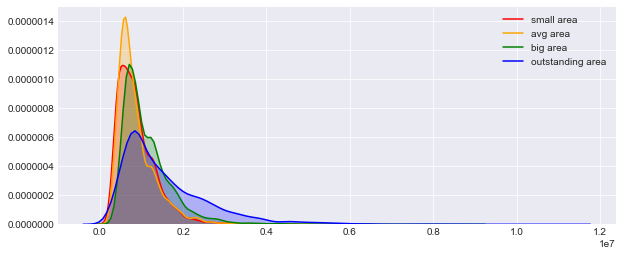

In [170]:
# Price distribution for each Total_Area_bins
from pylab import rcParams
rcParams['figure.figsize'] = 10, 4

small_area=df_housing_final[df_housing_final.Total_Area_bins==1]
avg_area=df_housing_final[df_housing_final.Total_Area_bins==2]
big_area=df_housing_final[df_housing_final.Total_Area_bins==3]
out_area=df_housing_final[df_housing_final.Total_Area_bins==4]

fig1=sns.kdeplot(small_area.Price,color='red',shade=True)
fig2=sns.kdeplot(avg_area.Price,color='orange',shade=True)
fig3=sns.kdeplot(big_area.Price,color='green',shade=True)
fig4=sns.kdeplot(out_area.Price,color='blue',shade=True)
plt.legend(['small area','avg area','big area','outstanding area'])
plt.show()

From this plot is clear that houses with small or medium _area_ have a small variability compared to those with great or oustanding "size" (landsize plus building area). 

Let's look at houses and villas with 2 bedrooms and how their prices changed from year to year and from one suburb from another.

In [171]:
df_2rooms_h=df_housing_final[(df_housing_final.Type=='h')&(df_housing_final.Rooms==2)]

df_group=df_2rooms_h.groupby(['Suburb','Year'],as_index=False).Price.median()
pv=df_group.pivot_table(index='Suburb',columns='Year',values='Price')

In [172]:
pv['Trend']='unknown'
pv.loc[(pv[2017]>pv[2016]) & (pv[2018]>pv[2017]),'Trend']='up-up'
pv.loc[(pv[2017]>pv[2016]) & (pv[2018]<pv[2017]),'Trend']='up-down'
pv.loc[(pv[2017]<pv[2016]) & (pv[2018]>pv[2017]),'Trend']='down-up'
pv.loc[(pv[2017]<pv[2016]) & (pv[2018]<pv[2017]),'Trend']='down-down'
pv.loc[(pv[2017]>pv[2016]) & (pd.isna(pv[2018])),'Trend']='up-na'
pv.loc[(pv[2017]<pv[2016]) & (pd.isna(pv[2018])),'Trend']='down-na'
pv.loc[(pv[2018]>pv[2017]) & (pd.isna(pv[2016])),'Trend']='na-up'
pv.loc[(pv[2018]<pv[2017]) & (pd.isna(pv[2016])),'Trend']='na-down'
pv.loc[(pv[2018]>pv[2016]) & (pd.isna(pv[2017])),'Trend']='up'
pv.loc[(pv[2018]<pv[2016]) & (pd.isna(pv[2017])),'Trend']='down'
                              

In [173]:
pv.head()

Year               2016       2017      2018      Trend
Suburb                                                 
Abbotsford    1100000.0  1062500.0       NaN    down-na
Aberfeldie    1300000.0   840000.0       NaN    down-na
Airport West   675000.0   615500.0  572000.0  down-down
Albert Park   1455000.0  1542500.0       NaN      up-na
Albion         600000.0   740000.0  655000.0    up-down

In [174]:
df_2rooms_h=df_2rooms_h.merge(pv,left_on='Suburb',right_index=True)

df_1_h=df_2rooms_h[df_2rooms_h.Total_Area_bins<3]

In [175]:
df_2rooms_h.head()

Suburb          Address  Rooms Type      Price Method SellerG  \
0  Abbotsford     85 Turner St      2    h  1480000.0      S  Biggin   
1  Abbotsford  25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford   129 Charles St      2    h   941000.0      S  Jellis   
3  Abbotsford    98 Charles St      2    h  1636000.0      S  Nelson   
4  Abbotsford    10 Valiant St      2    h  1097000.0      S  Biggin   

         Date  Distance  Postcode  Bathroom  Car  Landsize_x  YearBuilt_x  \
0  12/03/2016       2.5      3067         1    1       202.0         1960   
1  02/04/2016       2.5      3067         1    0       156.0         1900   
2  05/07/2016       2.5      3067         1    0       181.0         1960   
3  10/08/2016       2.5      3067         1    2       256.0         1890   
4  10/08/2016       2.5      3067         1    2       220.0         1900   

          CouncilArea  Lattitude_x  Longtitude_x             Regionname  \
0  Yarra City Council     -37.7996      144.9984  Northern Metropolitan   
1  Yarra City Council     -37.8079      144.9934  Northern Metropolitan   
2  Yarra City Council     -37.8041      144.9953  Northern Metropolitan   
3  Yarra City Council     -37.8060      144.9954  Northern Metropolitan   
4  Yarra City Council     -37.8010      144.9989  Northern Metropolitan   

   Propertycount  BuildingArea_Replace_x  Rooms_v2  Age House_Class  \
0           4019                    85.0         2   58      Modern   
1           4019                    79.0         2  118    Historic   
2           4019                    85.0         2   58      Modern   
3           4019                   107.0         2  128    Historic   
4           4019                    75.0         2  118    Historic   

      Date_x  Year  Month  Day  Weekday  Season  Total_Area  Total_Area_bins  \
0 2016-12-03  2016     12  338        5  spring       287.0                1   
1 2016-02-04  2016      2   35        3  summer       235.0                1   
2 2016-05-07  2016      5  128        5    fall       266.0                1   
3 2016-10-08  2016     10  282        5  spring       363.0                1   
4 2016-10-08  2016     10  282        5  spring       295.0                1   

   Median_price  Sold_Above_Zone_Median       2016       2017  2018    Trend  
0     1117500.0                       1  1100000.0  1062500.0   NaN  down-na  
1     1117500.0                       0  1100000.0  1062500.0   NaN  down-na  
2     1117500.0                       0  1100000.0  1062500.0   NaN  down-na  
3     1117500.0                       1  1100000.0  1062500.0   NaN  down-na  
4     1117500.0                       0  1100000.0  1062500.0   NaN  down-na

In [176]:
df_group=pd.crosstab(df_1_h.Suburb,df_1_h.Sold_Above_Zone_Median).apply(lambda x:x*100/sum(x),axis=1).merge(df_1_h[['Suburb','Trend']],left_index=True,right_on='Suburb')
df_group=df_group.loc[:,[0,1,'Trend','Suburb']].drop_duplicates() #'0' is %sold_below_median, '1' %above_median

In [177]:
df_group[(df_group["Trend"]=='up-up')] 

0          1  Trend          Suburb
1385   53.846154  46.153846  up-up       Bentleigh
2506   54.166667  45.833333  up-up       Brunswick
3804   52.083333  47.916667  up-up          Coburg
14116  56.250000  43.750000  up-up        Cremorne
4954   54.761905  45.238095  up-up   Fitzroy North
5584   56.521739  43.478261  up-up         Glenroy
13642  66.666667  33.333333  up-up      Kingsville
8423   54.285714  45.714286  up-up       Northcote
9255   54.545455  45.454545  up-up         Prahran
9493   54.237288  45.762712  up-up         Preston
14216  71.428571  28.571429  up-up    Princes Hill
10712  54.838710  45.161290  up-up          Seddon
11466  63.636364  36.363636  up-up      Strathmore
13869  56.521739  43.478261  up-up  West Footscray
12618  61.111111  38.888889  up-up    Williamstown

Despite median values raised from 2016 to 2018, Princess Hill is the Suburb where to find good "price" occasions to buy a nice house/villa with 2 bedrooms, followed by the suburb of Kingsville.

In [178]:
df_group[(df_group["Trend"]=='down-down')] 

0          1      Trend        Suburb
73      80.000000  20.000000  down-down  Airport West
2244    53.846154  46.153846  down-down      Brighton
13993  100.000000   0.000000  down-down      Brooklyn
3750    54.545455  45.454545  down-down  Clifton Hill
5431    58.823529  41.176471  down-down     Glen Iris
5883    75.000000  25.000000  down-down       Hampton
6181    52.631579  47.368421  down-down      Hawthorn
11225   58.333333  41.666667  down-down      St Kilda
12737   61.538462  38.461538  down-down       Windsor

Looking at those suburbs with a downgrade trend in the last two years, we can spot Brooklyn as the suburbs where houses, villas and cottages (2 bedrooms-style) are always sold underpriced. Investigating we can find an easy motivation about this:

"Brooklyn is significantly notorious for industrial pollution and sewer issues due to the high clay content in the soil causing trouble with the foundation. In recent years EPA Victoria has received numerous complaints about offensive smelling industrial pollution from Brooklyn by residents of nearby suburbs." (_Wikipedia_)

### Continuing the time series analysis

Looking at the big picture and considering the size of the dataset, we expect to have house sales spread all over these years (months and days). Let's see:

In [179]:
# Count the number of rows of the df grouped by day using a pivot table.
df_housing_final.pivot_table('Price', index='Date_x', aggfunc='sum').shape

(78, 1)

In [180]:
df_housing_final.head()

Suburb          Address  Rooms Type      Price Method SellerG  \
0  Abbotsford     85 Turner St      2    h  1480000.0      S  Biggin   
1  Abbotsford  25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford   129 Charles St      2    h   941000.0      S  Jellis   
3  Abbotsford    98 Charles St      2    h  1636000.0      S  Nelson   
4  Abbotsford    10 Valiant St      2    h  1097000.0      S  Biggin   

         Date  Distance  Postcode  Bathroom  Car  Landsize_x  YearBuilt_x  \
0  12/03/2016       2.5      3067         1    1       202.0         1960   
1  02/04/2016       2.5      3067         1    0       156.0         1900   
2  05/07/2016       2.5      3067         1    0       181.0         1960   
3  10/08/2016       2.5      3067         1    2       256.0         1890   
4  10/08/2016       2.5      3067         1    2       220.0         1900   

          CouncilArea  Lattitude_x  Longtitude_x             Regionname  \
0  Yarra City Council     -37.7996      144.9984  Northern Metropolitan   
1  Yarra City Council     -37.8079      144.9934  Northern Metropolitan   
2  Yarra City Council     -37.8041      144.9953  Northern Metropolitan   
3  Yarra City Council     -37.8060      144.9954  Northern Metropolitan   
4  Yarra City Council     -37.8010      144.9989  Northern Metropolitan   

   Propertycount  BuildingArea_Replace_x  Rooms_v2  Age House_Class  \
0           4019                    85.0         2   58      Modern   
1           4019                    79.0         2  118    Historic   
2           4019                    85.0         2   58      Modern   
3           4019                   107.0         2  128    Historic   
4           4019                    75.0         2  118    Historic   

      Date_x  Year  Month  Day  Weekday  Season  Total_Area  Total_Area_bins  \
0 2016-12-03  2016     12  338        5  spring       287.0                1   
1 2016-02-04  2016      2   35        3  summer       235.0                1   
2 2016-05-07  2016      5  128        5    fall       266.0                1   
3 2016-10-08  2016     10  282        5  spring       363.0                1   
4 2016-10-08  2016     10  282        5  spring       295.0                1   

   Median_price  Sold_Above_Zone_Median  
0     1117500.0                       1  
1     1117500.0                       0  
2     1117500.0                       0  
3     1117500.0                       1  
4     1117500.0                       0

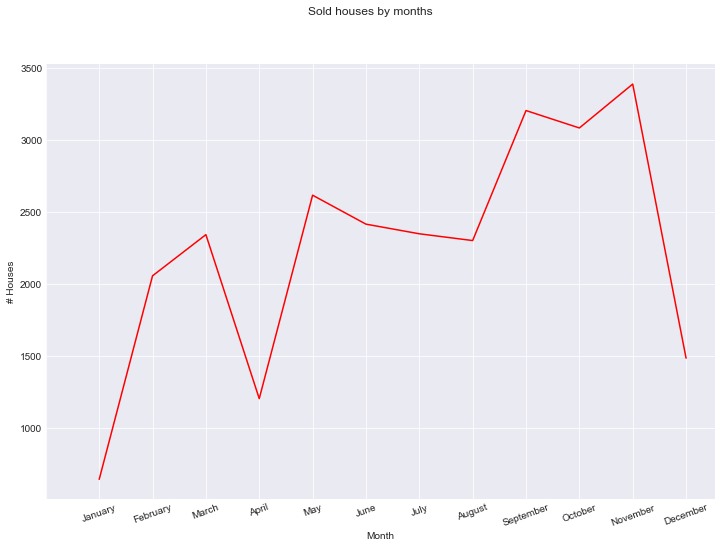

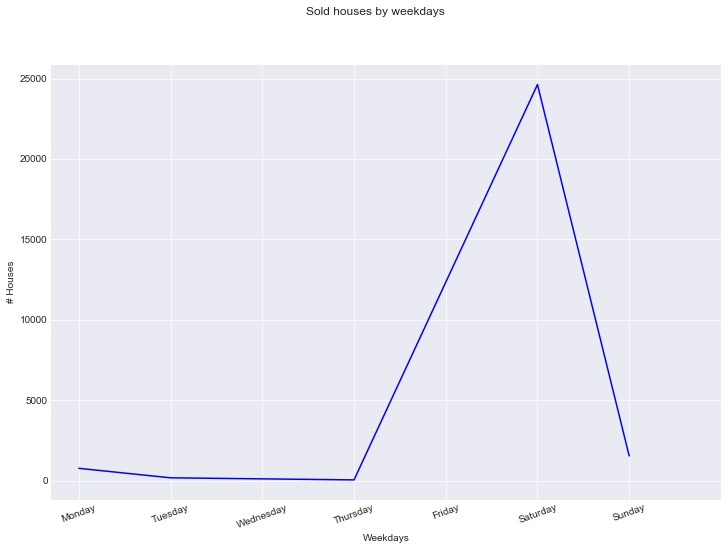

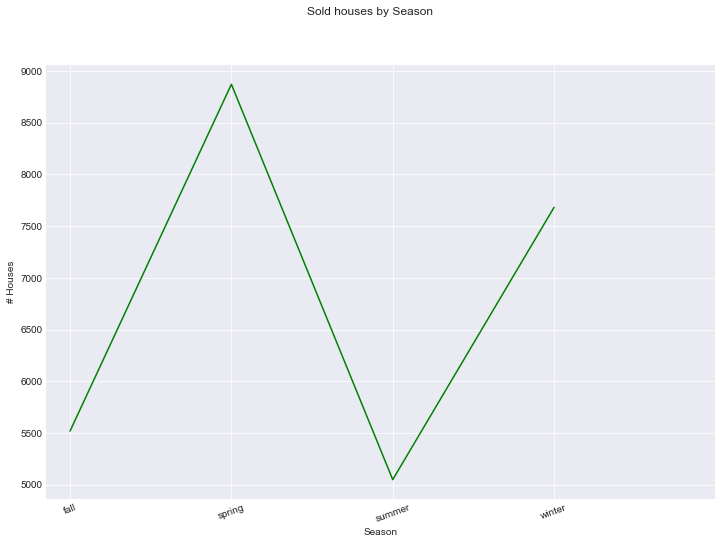

In [181]:
# From the above function (shape) we can understand (surprisingly!) that in more than 2 years there were only 78 days of "sales"
import calendar
sales_by_month= df_housing_final.groupby('Month')['Price'].count()
#plot figure (by month)
plt.figure(figsize=(12,8))
plt.plot(sales_by_month, color="red")
plt.xlabel('Month')
plt.suptitle('Sold houses by months')
plt.ylabel('# Houses')
plt.xticks(np.arange(13), calendar.month_name[0:13], rotation=20)
plt.show()

#plot figure (by weekdays)
sales_by_week= df_housing_final.groupby('Weekday')['Price'].count()
plt.figure(figsize=(12,8))
plt.plot(sales_by_week, color="blue")
plt.xlabel('Weekdays')
plt.suptitle('Sold houses by weekdays')
plt.ylabel('# Houses')
plt.xticks(np.arange(8), calendar.day_name[0:8], rotation=20)
plt.show()

#plot figure (by season)
sales_by_season= df_housing_final.groupby('Season')['Price'].count()
plt.figure(figsize=(12,8))
plt.plot(sales_by_season, color="green")
plt.xlabel('Season')
plt.suptitle('Sold houses by Season')
plt.ylabel('# Houses')
plt.xticks(np.arange(5), rotation=20)
plt.show()

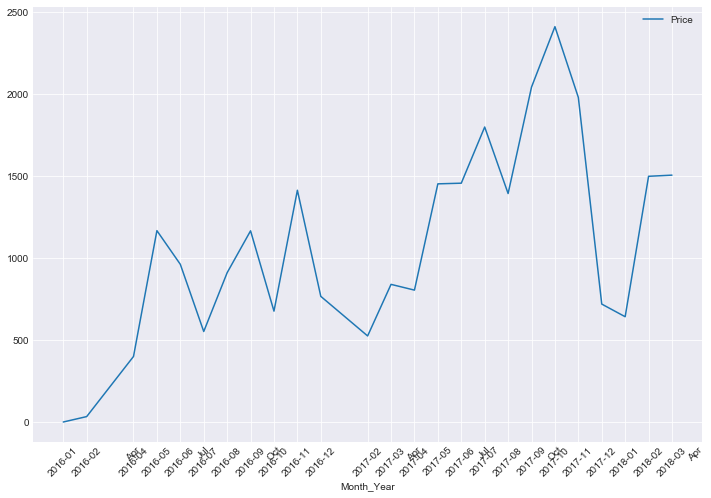

In [182]:
# Create index month-year
df_housing_final['Month_Year'] = df_housing_final['Date_x'].dt.to_period('M')
sales_by_month_year_v2= pd.Series.to_frame(df_housing_final.groupby('Month_Year')['Price'].count())
#plot figure(month-year)
fig, ax = plt.subplots(figsize=(12,8))
sales_by_month_year_v2.plot(ax=ax, xticks=sales_by_month_year_v2.index, rot=45)
ax.set_xticklabels(sales_by_month_year_v2.index)
plt.show()

Text(0.5,1,'Houses sold per Season')

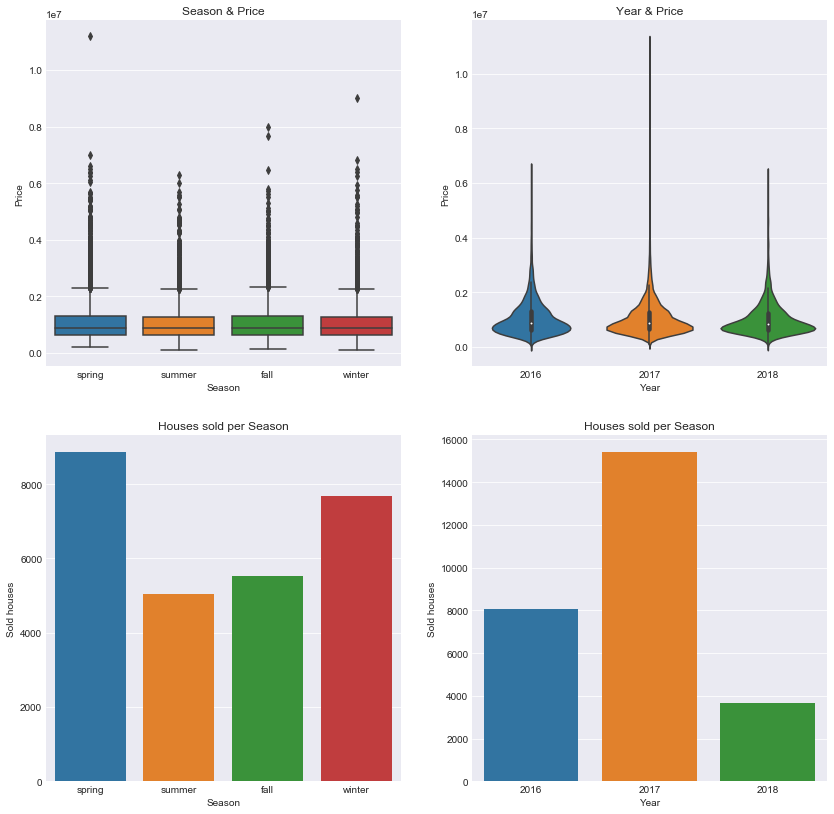

In [183]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

# Suplots of Seasonal and yearly trend & price
sns.set_style('darkgrid')  
f, axes = plt.subplots(2,2, figsize = (14,14))

# Plot [0,0]
sns.boxplot(data = df_housing_final, x = 'Season', y = 'Price', ax = axes[0, 0])
axes[0,0].set_xlabel('Season')
axes[0,0].set_ylabel('Price')
axes[0,0].set_title('Season & Price')

# Plot [0,1]
sns.violinplot(data = df_housing_final, x = 'Year', y = 'Price',ax = axes[0, 1])
axes[0,1].set_xlabel('Year')
axes[0,1].set_ylabel('Price')
axes[0,1].set_title('Year & Price')

# Plot [1,0]
sns.countplot(data = df_housing_final, x = 'Season', ax = axes[1,0])
axes[1,0].set_xlabel('Season')
axes[1,0].set_ylabel('Sold houses')
axes[1,0].set_title('Houses sold per Season')

# Plot [1,1]
sns.countplot(data = df_housing_final,x = 'Year', ax = axes[1,1])
axes[1,1].set_xlabel('Year')
axes[1,1].set_ylabel('Sold houses')
axes[1,1].set_title('Houses sold per Season')


Main insights:

- Regarding season, there is no big diffence in price between houses sold on different parts of the year(_boxplot "Season & Price"_). Spring is the season with the most houses sold (reaching the peak in November), while Summer the worst one.

- Year 2017 was the best year for the market by far, with apparently more high price outliers and doubled sold houses compared to the previous year. 2018 has of coursw less activity, due to data collection (Jan-March are the only months available).

- Most houses are sold during Saturdays and Fridays.

In [184]:
#!pip install plotly
from plotly.offline import init_notebook_mode, iplot
import plotly.plotly as py
import plotly.figure_factory as FF
from plotly import tools
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [112]:
# Establish the sum (of sales) for each month and year
def month_year_sales(df, month, year):
    double_conditional = df_housing_final['Price'].loc[(df_housing_final['Month'] == month) & (df_housing_final['Year'] == year)].sum()
    return double_conditional

labels = ['January', 'February', 'March', 'April',
          'May', 'June', 'July', 'August', 'September', 
          'October', 'November', 'December']


colors = ['#ffb4da', '#b4b4ff', '#daffb4', '#fbab60', '#fa8072', '#FA6006',
          '#FDB603', '#639702', '#dacde6', '#faec72', '#9ab973', '#87cefa']

# Sales 2016
january_2016 = month_year_sales(df_housing_final, 1, 2016)
february_2016 = month_year_sales(df_housing_final, 2, 2016)
march_2016 = month_year_sales(df_housing_final, 3, 2016)
april_2016 = month_year_sales(df_housing_final, 4, 2016)
may_2016 = month_year_sales(df_housing_final, 5, 2016)
june_2016 = month_year_sales(df_housing_final, 6, 2016)
july_2016 = month_year_sales(df_housing_final, 7, 2016)
august_2016 = month_year_sales(df_housing_final, 8, 2016)
september_2016 = month_year_sales(df_housing_final, 9, 2016)
october_2016 = month_year_sales(df_housing_final, 10, 2016)
november_2016 = month_year_sales(df_housing_final, 11, 2016)
december_2016 = month_year_sales(df_housing_final, 12, 2016)

# Sales 2017
january_2017 = month_year_sales(df_housing_final, 1, 2017)
february_2017 = month_year_sales(df_housing_final, 2, 2017)
march_2017 = month_year_sales(df_housing_final, 3, 2017)
april_2017 = month_year_sales(df_housing_final, 4, 2017)
may_2017 = month_year_sales(df_housing_final, 5, 2017)
june_2017 = month_year_sales(df_housing_final, 6, 2017)
july_2017 = month_year_sales(df_housing_final, 7, 2017)
august_2017 = month_year_sales(df_housing_final, 8, 2017)
september_2017 = month_year_sales(df_housing_final, 9, 2017)
october_2017 = month_year_sales(df_housing_final, 10, 2017)
november_2017 = month_year_sales(df_housing_final, 11, 2017)
december_2017 = month_year_sales(df_housing_final, 12, 2017)

# Sales 2018 (Until May)
january_2018 = month_year_sales(df_housing_final, 1, 2018)
february_2018 = month_year_sales(df_housing_final, 2, 2018)
march_2018 = month_year_sales(df_housing_final, 3, 2018)



# List of values
lst_2016 = [january_2016, february_2016, march_2016, april_2016, 
           may_2016, june_2016, july_2016, august_2016, 
           september_2016, october_2016, november_2016, december_2016]

lst_2017 = [january_2017, february_2017, march_2017, april_2017, 
           may_2017, june_2017, july_2017, august_2017, 
           september_2017, october_2017, november_2017, december_2017]


lst_2018 = [january_2018, february_2018, march_2018] 



plot_2016 = go.Scatter(
    x=lst_2016,
    y=labels,
    xaxis='x2',
    yaxis='y2',
    mode='markers',
    name='2016',
    marker=dict(
        color='rgba(0, 128, 255, 0.95)',
        line=dict(
            color='rgba(56, 56, 56, 1)',
            width=1.5,
        ),
        symbol='circle',
        size=16,
    )
)


plot_2017 = go.Scatter(
    x=lst_2017,
    y=labels,
    xaxis='x2',
    yaxis='y2',
    mode='markers',
    name='2017',
    marker=dict(
        color='rgba(255, 72, 72, 0.95)',
        line=dict(
            color='rgba(56, 56, 56, 1)',
            width=1.5,
        ),
        symbol='circle',
        size=16,
    )
)

plot_2018 = go.Scatter(
    x=lst_2018,
    y=labels,
    xaxis='x2',
    yaxis='y2',
    mode='markers',
    name='2018',
    marker=dict(
        color='rgba(72, 255, 72, 0.95)',
        line=dict(
            color='rgba(56, 56, 56, 1)',
            width=1.5,
        ),
        symbol='circle',
        size=16,
    )
)

data = [plot_2016, plot_2017, plot_2018]

layout = go.Layout(title="Sales by Month for the Years <br> (2016, 2017, 2018)",
                xaxis=dict(title='Sum of Sales by Month'),
                yaxis=dict(title='Month'))


fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='multiple-subplots')

This interactive scatterplot confirms how "spring" season is the most productive in terms of houses sold and sales prices.

October 2017 was the best month in these terms, while November has the highest value in terms of two year period (more than $3.6 billions). 

In [114]:
# Visualise percent changes for each of the month during the two year period (total amount spent on market)

# Percent Change formula: (New Value - Old Value) / Old Value
from numpy import inf
from scipy import *

def percent_change(df, old_val, new_val):
    per_change = ((new_val - old_val)/old_val) * 100
    rounded_per_change = float("{0:.2f}".format(per_change))
    return rounded_per_change

fst_perchange_lst = []
snd_perchange_lst = []

# For the months between the years 2016-2017
for old, new in zip(lst_2016, lst_2017):
    per_change = ((new - old)/ old )* 100
    rounded_per_change = float("{0:.2f}".format(per_change))
    fst_perchange_lst.append(rounded_per_change)
    

per_2016_2017 = np.array(fst_perchange_lst)
per_2016_2017[2] = 100

for old, new in zip(lst_2017, lst_2018):
    per_change = ((new - old)/ old) * 100
    rounded_per_change = float("{0:.2f}".format(per_change))
    snd_perchange_lst.append(rounded_per_change)
    
per_2017_2018 = np.array(snd_perchange_lst)
per_2017_2018 = np.concatenate([per_2017_2018, np.zeros(9)])
per_2017_2018[0] = 100

# Here we should create a line plot for Percent change.
trace0 = go.Scatter(
    x = labels,
    y = per_2016_2017,
    name = 'Percent Change (2016-2017)',
    text = '%',
    line = dict(
        color = ('rgb(220, 10, 20)'),
        width = 4,
        dash = 'dash'
    )
)

trace1 = go.Scatter(
    x = labels,
    y = per_2017_2018,
    name = 'Percent Change (2017-2018)',
    text = '%',
    line = dict(
        color = ('rgb(0, 20, 220)'),
        width = 4,
        dash = 'dash'
    )
)

data = [trace0, trace1]

layout = dict(title = 'Percent Change in House Sales',
              xaxis = dict(title = 'Month'),
              yaxis = dict(title = 'Percent Change (%)'),
              paper_bgcolor='rgb(255, 255, 255)'
              )

fig = dict(data=data, layout=layout)
iplot(fig, filename='styled-line')


In [115]:
# Establish the avg (price) for each month and year
def avg_month_year_sales(df, month, year):
    double_conditional_avg = df_housing_final['Price'].loc[(df_housing_final['Month'] == month) & (df_housing_final['Year'] == year)].mean()
    return double_conditional_avg

# Avg Prices 2016
avg_january_2016 = avg_month_year_sales(df_housing_final, 1, 2016)
avg_february_2016 = avg_month_year_sales(df_housing_final, 2, 2016)
avg_march_2016 = avg_month_year_sales(df_housing_final, 3, 2016)
avg_april_2016 = avg_month_year_sales(df_housing_final, 4, 2016)
avg_may_2016 = avg_month_year_sales(df_housing_final, 5, 2016)
avg_june_2016 = avg_month_year_sales(df_housing_final, 6, 2016)
avg_july_2016 = avg_month_year_sales(df_housing_final, 7, 2016)
avg_august_2016 = avg_month_year_sales(df_housing_final, 8, 2016)
avg_september_2016 = avg_month_year_sales(df_housing_final, 9, 2016)
avg_october_2016 = avg_month_year_sales(df_housing_final, 10, 2016)
avg_november_2016 = avg_month_year_sales(df_housing_final, 11, 2016)
avg_december_2016 = avg_month_year_sales(df_housing_final, 12, 2016)

# AVG Prices 2017
avg_january_2017 = avg_month_year_sales(df_housing_final, 1, 2017)
avg_february_2017 = avg_month_year_sales(df_housing_final, 2, 2017)
avg_march_2017 =avg_month_year_sales(df_housing_final, 3, 2017)
avg_april_2017 = avg_month_year_sales(df_housing_final, 4, 2017)
avg_may_2017 = avg_month_year_sales(df_housing_final, 5, 2017)
avg_june_2017 = avg_month_year_sales(df_housing_final, 6, 2017)
avg_july_2017 = avg_month_year_sales(df_housing_final, 7, 2017)
avg_august_2017 = avg_month_year_sales(df_housing_final, 8, 2017)
avg_september_2017 = avg_month_year_sales(df_housing_final, 9, 2017)
avg_october_2017 = avg_month_year_sales(df_housing_final, 10, 2017)
avg_november_2017 = avg_month_year_sales(df_housing_final, 11, 2017)
avg_december_2017 = avg_month_year_sales(df_housing_final, 12, 2017)

# Avg Prices 2018 (Until May)
avg_january_2018 = avg_month_year_sales(df_housing_final, 1, 2018)
avg_february_2018 = avg_month_year_sales(df_housing_final, 2, 2018)
avg_march_2018 = avg_month_year_sales(df_housing_final, 3, 2018)

# List of values avg
avg_lst_2016 = [avg_january_2016, avg_february_2016, avg_march_2016, avg_april_2016, 
           avg_may_2016, avg_june_2016, avg_july_2016, avg_august_2016, 
           avg_september_2016, avg_october_2016, avg_november_2016, avg_december_2016]

avg_lst_2017 = [avg_january_2017, avg_february_2017, avg_march_2017, avg_april_2017, 
           avg_may_2017, avg_june_2017, avg_july_2017, avg_august_2017, 
           avg_september_2017, avg_october_2017, avg_november_2017, avg_december_2017]


avg_lst_2018 = [avg_january_2018, avg_february_2018, avg_march_2018]

#def perchange list
avg_fst_perchange_lst = []
avg_snd_perchange_lst = []

# For the months between the years 2016-2017
for old, new in zip(avg_lst_2016, avg_lst_2017):
    per_change = ((new - old)/ old )* 100
    rounded_per_change = float("{0:.2f}".format(per_change))
    avg_fst_perchange_lst.append(rounded_per_change)
    

avg_per_2016_2017 = np.array(avg_fst_perchange_lst)
avg_per_2016_2017[2] = 100

for old, new in zip(avg_lst_2017, avg_lst_2018):
    per_change = ((new - old)/ old) * 100
    rounded_per_change = float("{0:.2f}".format(per_change))
    avg_snd_perchange_lst.append(rounded_per_change)
    
avg_per_2017_2018 = np.array(avg_snd_perchange_lst)
avg_per_2017_2018 = np.concatenate([avg_per_2017_2018, np.zeros(9)]) #first 3 months in 2018
avg_per_2017_2018[0] = 100

# Here we should create a line plot for Percent change.
trace0 = go.Scatter(
    x = labels,
    y = avg_per_2016_2017,
    name = 'Percent Change (2016-2017)',
    text = '%',
    line = dict(
        color = ('rgb(220, 10, 20)'),
        width = 4,
        dash = 'dash'
    )
)

trace1 = go.Scatter(
    x = labels,
    y = avg_per_2017_2018,
    name = 'Percent Change (2017-2018)',
    text = '%',
    line = dict(
        color = ('rgb(0, 20, 220)'),
        width = 4,
        dash = 'dash'
    )
)

data = [trace0, trace1]

layout = dict(title = 'Percent Change in Average Price',
              xaxis = dict(title = 'Month'),
              yaxis = dict(title = 'Percent Change (%)'),
              paper_bgcolor='rgb(255, 255, 255)'
              )

fig = dict(data=data, layout=layout)
iplot(fig, filename='styled-line')



This final _trend plots_ summarise the difference of the total amount spent on house market, and the % change in average Price respectively per each month (compared to the previous year). February is no doubt the most striking month! While reached the peak in % of total amount spent from 2016 to 2017 (+1754%) gaining a +23% on average sales price; in 2018 it registered an increase of +153%  but at the same time a critical drop (about -11%) on the average price.

### Cluster Analysis

In this subsection we try to use K-means clustering algorithm applied to Price distribution.

In [117]:
#make a copy for cluster analysis
df_housing_cluster = df_housing_final.copy()

# import plotly.plotly as py
# import plotly.graph_objs as go
# from plotly import tools
from sklearn.cluster import KMeans

Text(0.5,1,'Log-Price distribution')

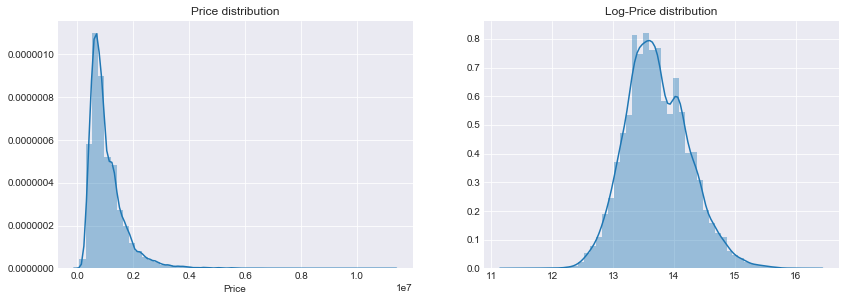

In [119]:
# plot the Price distribution "normal" and with a log-transf
f, axes = plt.subplots(1,1, figsize = (14,10))

plt.subplot(221)
sns.distplot(df_housing_cluster.Price, hist=True)
plt.title('Price distribution')


plt.subplot(222)
sns.distplot(log(df_housing_cluster.Price), hist=True)
plt.title('Log-Price distribution')

In [120]:
df_housing_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27118 entries, 0 to 27117
Data columns (total 34 columns):
Suburb                    27118 non-null object
Address                   27118 non-null object
Rooms                     27118 non-null int64
Type                      27118 non-null object
Price                     27118 non-null float64
Method                    27118 non-null object
SellerG                   27118 non-null object
Date                      27118 non-null object
Distance                  27118 non-null float64
Postcode                  27118 non-null int64
Bathroom                  27118 non-null int64
Car                       27118 non-null int64
Landsize_x                27118 non-null float64
YearBuilt_x               27118 non-null int64
CouncilArea               27118 non-null object
Lattitude_x               27118 non-null float64
Longtitude_x              27118 non-null float64
Regionname                27118 non-null object
Propertycount             2

In [121]:
df_housing_cluster["Price_log"] = log(df_housing_cluster.Price)

In [122]:
df_housing_cluster["Price_log"].describe()

count    27118.000000
mean        13.723045
std          0.517447
min         11.350407
25%         13.361380
50%         13.677397
75%         14.077875
max         16.231424
Name: Price_log, dtype: float64

In [123]:
# define bins for (log)Price
bins_pclust=[11,12.5,13,13.5,14,16.5]
df_housing_cluster['Price_log_bins']=np.digitize(df_housing_cluster.Price_log,bins_pclust)
df_housing_cluster.Price_log_bins.value_counts()

4    9511
5    7944
3    7827
2    1747
1      89
Name: Price_log_bins, dtype: int64

In [124]:
# Preprocess Rooms, Bathrooms and Car
L = len(unique(df_housing_cluster.Rooms_v2))
df_housing_cluster["Rooms_v2_clust"] = (df_housing_cluster.Rooms_v2 -0.5)/L

L2 = len(unique(df_housing_cluster.Bathroom))
df_housing_cluster["Bath_clust"] = (df_housing_cluster.Bathroom -0.5)/L2

L3 = len(unique(df_housing_cluster.Car))
df_housing_cluster["Car_clust"] = (df_housing_cluster.Car -0.5)/L2


In [125]:
# insert the 5 features in a separate df
prova = df_housing_cluster[["Rooms_v2_clust","Bath_clust","Car_clust","Price_log_bins","Distance"]]
prova.head()

Rooms_v2_clust  Bath_clust  Car_clust  Price_log_bins  Distance
0            0.25        0.05       0.05               5       2.5
1            0.25        0.05      -0.05               4       2.5
2            0.25        0.05      -0.05               4       2.5
3            0.25        0.05       0.15               5       2.5
4            0.25        0.05       0.15               4       2.5

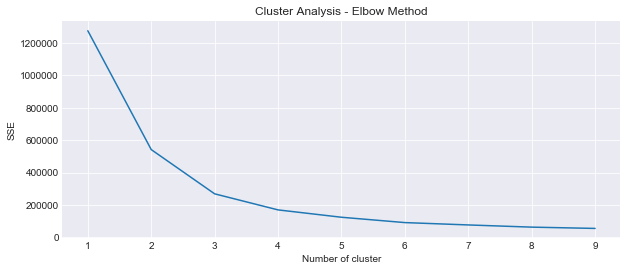

In [126]:
# Cluster analysis

## Elbow graph - choosing the "k"
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(prova)
    prova["clusters"] = kmeans.labels_
    #print(prova["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.title("Cluster Analysis - Elbow Method")
plt.show()

In [128]:
# so it seems that we have an elbow, with a significant reduction of SSE, in k=3.

kmeans = KMeans(n_clusters=3, max_iter=1000).fit(prova)
prova["clusters"] = kmeans.labels_
y_kmeans = kmeans.predict(prova)

#Let's plot first with a 2D scatter, then with a 3D plot

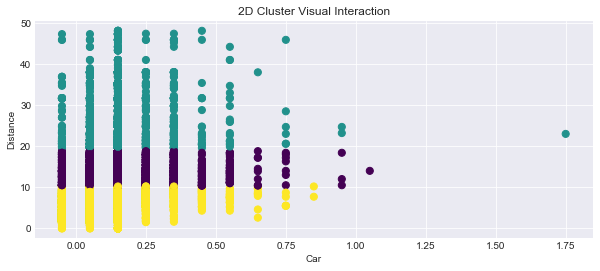

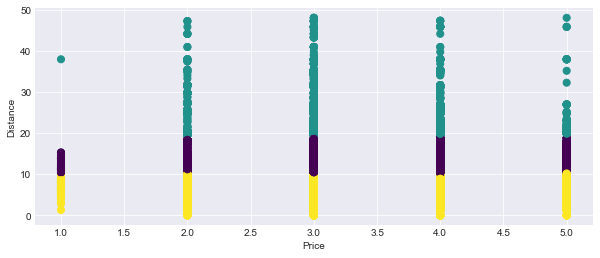

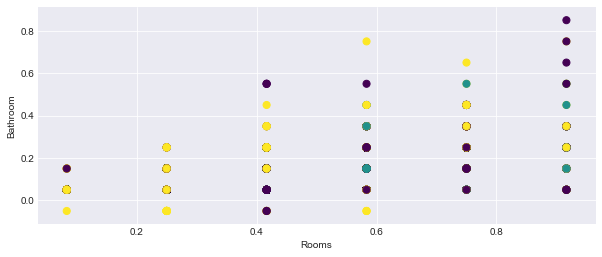

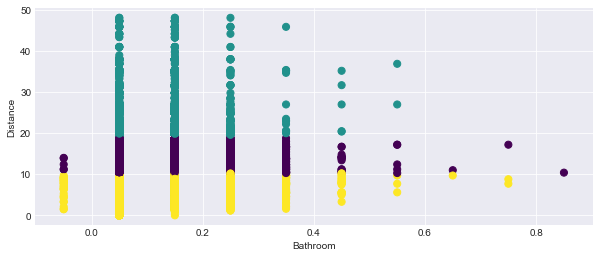

In [129]:
# Subplots of 2D Cluster
#plt.scatter(prova.Bath_clust, prova.Distance, c=y_kmeans, s=50, cmap='viridis')

plt.scatter(prova.Car_clust, prova.Distance, c=y_kmeans, s=50, cmap='viridis')
plt.xlabel("Car")
plt.ylabel("Distance")
plt.title("2D Cluster Visual Interaction")
plt.show()


plt.scatter(prova.Price_log_bins, prova.Distance, c=y_kmeans, s=50, cmap='viridis')
plt.xlabel("Price")
plt.ylabel("Distance")
plt.show()


plt.scatter(prova.Rooms_v2_clust, prova.Bath_clust, c=y_kmeans, s=50, cmap='viridis')
plt.xlabel("Rooms")
plt.ylabel("Bathroom")
plt.show()


plt.scatter(prova.Bath_clust, prova.Distance, c=y_kmeans, s=50, cmap='viridis')
plt.xlabel("Bathroom")
plt.ylabel("Distance")
plt.show()

In [130]:
# scatter 3d w plotly

import plotly
from plotly.offline import init_notebook_mode
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)

trace1 = go.Scatter3d(
    x=prova.Rooms_v2_clust,
    y=prova.Price_log_bins,
    z=prova.Distance,
    mode='markers',
    marker=dict(
        size=12,
        color=prova.Distance,                
        colorscale='Viridis',   
        opacity=0.8
    )
)

data = [trace1]

layout = go.Layout(title="<br> Cluster 3D Plot (Rooms, Price, Distance)",
                
         
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
        
        
    )
)
fig = go.Figure(data=data, layout=layout)

plotly.offline.iplot(fig)

From cluster analysis we can see the huge impact of _Distance_ on grouping different features by its "measure". Regarding the interaction between Rooms and Bathrooms we can see well-defined clusters when these two features are small. But also with high values of Rooms we have a major cluster (purple on 2D scatterplot). Thus, we expect a greater "importance" of Rooms over Bathrooms in predicting a final Price when their values increase.
Just to clarify we might try to repeform this cluster analysis with k=4 and maybe define 4 bins for Price, with the addition of "rescaling" the Distance.

### Maps & Geolocations

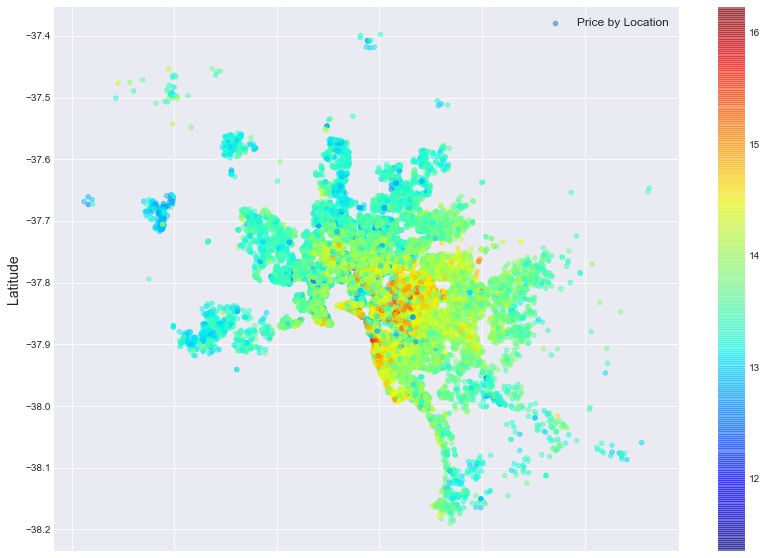

In [131]:
#First plot: House prices by Location
df_housing_final.plot(kind="scatter", x="Longtitude_x", y="Lattitude_x", alpha=0.5,
c=log(df_housing_final.Price), cmap=plt.get_cmap("jet"), label= 'Price by Location', figsize=(14,10)) 
plt.ylabel("Latitude", fontsize=14)

plt.legend(fontsize=12)

In [133]:
# plot with House_class, but first convert categorical to "codes"
df_housing_final["House_Class_Cat"] = df_housing_final["House_Class"].cat.codes;


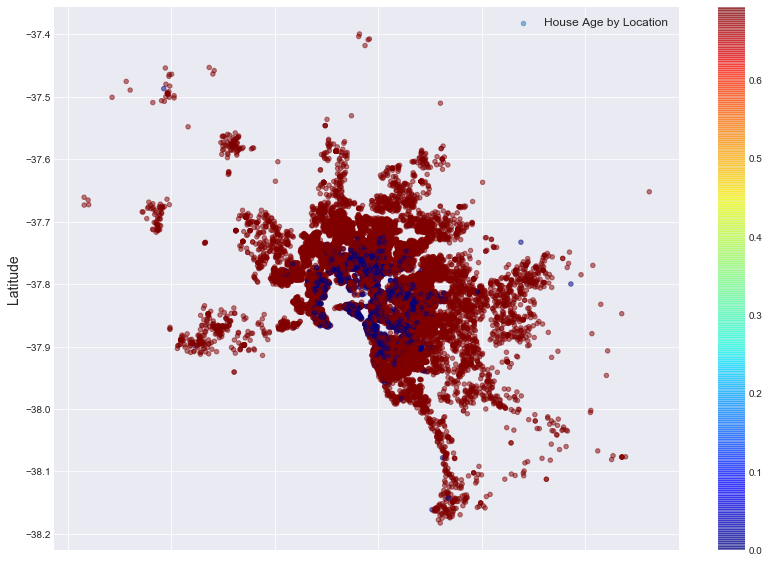

In [134]:
# Second plot: House_class by location
df_housing_final.plot(kind="scatter", x="Longtitude_x", y="Lattitude_x", alpha=0.5,
c=log(df_housing_final.House_Class_Cat), cmap=plt.get_cmap("jet"), label= 'House Age by Location', figsize=(14,10)) 
plt.ylabel("Latitude", fontsize=14)

plt.legend(fontsize=12)
plt.show()

These maps really emphasize the "growth" and the urban evolution of the city of Melbourne. Highest price houses are located in the city centre and close to the bay as well as the oldest houses.


## <a id='Fifth-Section'>5. Machine Learning </a>

This section provides a ML analysis using techniques in order to predict the _Price_ of a houses from its predictors. 

In [185]:
# Let's recheck our DF
df_housing_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27118 entries, 0 to 27117
Data columns (total 34 columns):
Suburb                    27118 non-null object
Address                   27118 non-null object
Rooms                     27118 non-null int64
Type                      27118 non-null object
Price                     27118 non-null float64
Method                    27118 non-null object
SellerG                   27118 non-null object
Date                      27118 non-null object
Distance                  27118 non-null float64
Postcode                  27118 non-null int64
Bathroom                  27118 non-null int64
Car                       27118 non-null int64
Landsize_x                27118 non-null float64
YearBuilt_x               27118 non-null int64
CouncilArea               27118 non-null object
Lattitude_x               27118 non-null float64
Longtitude_x              27118 non-null float64
Regionname                27118 non-null object
Propertycount             2

In [186]:
# So, before starting with the split in train and test set we need to choose the features that we consider good predictors
# for the final price and transform those categorical.

df_housing_final.corr()  #Check numerical features with Price

Rooms     Price  Distance  Postcode  Bathroom  \
Rooms                   1.000000  0.465756  0.284469  0.081232  0.535791   
Price                   0.465756  1.000000 -0.210650  0.045251  0.395665   
Distance                0.284469 -0.210650  1.000000  0.489924  0.125912   
Postcode                0.081232  0.045251  0.489924  1.000000  0.107737   
Bathroom                0.535791  0.395665  0.125912  0.107737  1.000000   
Car                     0.316890  0.162374  0.206011  0.054314  0.225147   
Landsize_x              0.041018  0.033623  0.047977  0.031387  0.037572   
YearBuilt_x            -0.077788 -0.272065  0.157991  0.052492  0.073113   
Lattitude_x             0.023413 -0.206730 -0.097622 -0.233797 -0.031527   
Longtitude_x            0.082223  0.195404  0.192333  0.369471  0.080286   
Propertycount          -0.079766 -0.059837 -0.020843  0.023984 -0.043195   
BuildingArea_Replace_x  0.698949  0.429675  0.202593  0.083687  0.493735   
Rooms_v2                0.993243  0.467501  0.288790  0.082113  0.533847   
Age                     0.077788  0.272065 -0.157991 -0.052492 -0.073113   
Year                    0.088221 -0.019538  0.230290  0.103575  0.054760   
Month                   0.014189  0.017541  0.011238  0.009323  0.008875   
Day                     0.015287  0.019650  0.009217  0.008173  0.007990   
Weekday                 0.035274  0.024005  0.054489  0.031289  0.031389   
Total_Area              0.057730  0.043881  0.052756  0.033340  0.049361   
Total_Area_bins         0.525604  0.283487  0.334137  0.103694  0.214610   
Median_price            0.504695  0.916279 -0.223408  0.048067  0.382072   
Sold_Above_Zone_Median -0.014616  0.206082 -0.026136 -0.013859  0.059263   

                             Car  Landsize_x  YearBuilt_x  Lattitude_x  \
Rooms                   0.316890    0.041018    -0.077788     0.023413   
Price                   0.162374    0.033623    -0.272065    -0.206730   
Distance                0.206011    0.047977     0.157991    -0.097622   
Postcode                0.054314    0.031387     0.052492    -0.233797   
Bathroom                0.225147    0.037572     0.073113    -0.031527   
Car                     1.000000    0.029795     0.074183    -0.000974   
Landsize_x              0.029795    1.000000     0.000295     0.019434   
YearBuilt_x             0.074183    0.000295     1.000000     0.031249   
Lattitude_x            -0.000974    0.019434     0.031249     1.000000   
Longtitude_x            0.035498   -0.002225    -0.007799    -0.348112   
Propertycount          -0.007598   -0.014894     0.020523     0.039006   
BuildingArea_Replace_x  0.261059    0.063256    -0.014292     0.001554   
Rooms_v2                0.316925    0.041117    -0.079294     0.023743   
Age                    -0.074183   -0.000295    -1.000000    -0.031249   
Year                    0.132826    0.018715     0.065305     0.021473   
Month                   0.016551    0.003365    -0.012579    -0.020070   
Day                     0.016334    0.003075    -0.013953    -0.020113   
Weekday                 0.041990    0.007922     0.002710    -0.007806   
Total_Area              0.036011    0.999713    -0.000049     0.019436   
Total_Area_bins         0.371633    0.123305    -0.009011     0.003639   
Median_price            0.148297    0.034821    -0.288768    -0.221629   
Sold_Above_Zone_Median  0.051973   -0.009852    -0.053499     0.014027   

                        Longtitude_x  Propertycount  BuildingArea_Replace_x  \
Rooms                       0.082223      -0.079766                0.698949   
Price                       0.195404      -0.059837                0.429675   
Distance                    0.192333      -0.020843                0.202593   
Postcode                    0.369471       0.023984                0.083687   
Bathroom                    0.080286      -0.043195                0.493735   
Car                         0.035498      -0.007598                0.261059   
Landsize_x            

In [187]:
# Dummy variable for the categorical ones 
df_ML = pd.get_dummies(df_housing_final, columns= ['Type', 'Regionname', 'House_Class','Season'])

# Let's keep main variables
df_ML= df_ML[["Price","Distance","Bathroom","Car","Landsize_x","Longtitude_x","Lattitude_x","BuildingArea_Replace_x","Rooms_v2","Age","Total_Area_bins",
              "Type_h","Type_t","Type_u","Regionname_Eastern Metropolitan","Regionname_Eastern Victoria",
              "Regionname_Northern Metropolitan","Regionname_Eastern Victoria","Regionname_South-Eastern Metropolitan",
              "Regionname_Southern Metropolitan","Regionname_Western Metropolitan","Regionname_Western Victoria",
              "House_Class_Contemporary","House_Class_Historic","House_Class_Modern","Season_fall","Season_spring","Season_summer","Season_winter"]]
#check variables
df_ML.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27118 entries, 0 to 27117
Data columns (total 29 columns):
Price                                    27118 non-null float64
Distance                                 27118 non-null float64
Bathroom                                 27118 non-null int64
Car                                      27118 non-null int64
Landsize_x                               27118 non-null float64
Longtitude_x                             27118 non-null float64
Lattitude_x                              27118 non-null float64
BuildingArea_Replace_x                   27118 non-null float64
Rooms_v2                                 27118 non-null int64
Age                                      27118 non-null int64
Total_Area_bins                          27118 non-null int64
Type_h                                   27118 non-null uint8
Type_t                                   27118 non-null uint8
Type_u                                   27118 non-null uint8
Regionname_

In [188]:
# Proceed with "features scaling" since we have different "value ranges"
from sklearn.preprocessing import RobustScaler

# Assign "Price" to "Y" var and predictors to X variables
X = df_ML.drop("Price", axis=1)
Y = df_ML["Price"].copy()

scaler = RobustScaler()
df_ML= scaler.fit_transform(df_ML.astype(np.float64))

In [189]:
# Ready for predictions. We will compare 2 ML methods: Linear Regressions vs Random Forest
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = .30, random_state= 101) #split 70-30

# fit Regression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

# fit Random forest
forest = RandomForestRegressor()
forest.fit(x_train, y_train);


In [190]:
# Try to test on train data first, evaluating the RMSE and the MAPE (for accurary)
models= [('Lin_reg', lin_reg), ('Random Forest', forest)]
from sklearn.metrics import mean_squared_error
for i, model in models:    
    predictions = model.predict(x_train)
    MSE = mean_squared_error(y_train, predictions)
    RMSE = np.sqrt(MSE)
    msg_err = "%s = %.2f" % (i, round(RMSE, 2))
    
    errors = abs(predictions - y_train)
    mape = np.mean(100 * (errors / y_train)) #calculate Mean Abs Percentage Error
    accuracy = 100 - mape 
    msg_acc = "%s= %.2f"% (i, round(accuracy, 2))
    print('RMSE of', msg_err, 'Accuracy of', msg_acc,'%')  


RMSE of Lin_reg = 403221.73 Accuracy of Lin_reg= 71.69 %
RMSE of Random Forest = 149063.10 Accuracy of Random Forest= 92.61 %


We expected that RF performed better than Linear Regression. However, we are predicting on train data, so the risk of overfitting could exist (especially for the RF). To understand better the performances of the model and to predict on test data we should use an alternative strategy: cross-validation, keeping only RF as the "regression" method for our final prediction.

### Cross-Validation and Model Comparison

In [191]:
# for both models we want to test 3 different scoring metrics (RMSE, MAE and R^2) with a 10 folds CV. 
# Then we will average and save their results into a df

from sklearn.model_selection import cross_validate

models= [('Lin_reg', lin_reg), ('Random Forest', forest)]
scoring = ['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2']

res= []

for name, model in models:
    for i in scoring:
        scores = cross_validate(model, x_train, y_train, scoring=i, cv=10, return_train_score=True)
        res.append(scores)

# Lin Reg (Average of results)
LR_RMSE_mean = np.sqrt(-res[0]['test_score'].mean()) # we perform the 'sqrt' in order to obtain the RMSE
LR_RMSE_std= res[0]['test_score'].std()
LR_MAE_mean = -res[1]['test_score'].mean()
LR_MAE_std= res[1]['test_score'].std()
LR_R2_mean = res[2]['test_score'].mean()
LR_R2_std = res[2]['test_score'].std()


#  Random Forest's averages
RF_RMSE_mean = np.sqrt(-res[3]['test_score'].mean())
RF_RMSE_std= res[3]['test_score'].std()
RF_MAE_mean = -res[4]['test_score'].mean()
RF_MAE_std= res[4]['test_score'].std()
RF_R2_mean = res[5]['test_score'].mean()
RF_R2_std = res[5]['test_score'].std()

In [192]:
# storing results in a DF
Model_DF = pd.DataFrame({
    'Model'       : ['Linear Regression', 'Random Forest'],
    'RMSE_mean'    : [LR_RMSE_mean, RF_RMSE_mean],
    'RMSE_std'    : [LR_RMSE_std, RF_RMSE_std],
    'MAE_mean'   : [LR_MAE_mean, RF_MAE_mean],
    'MAE_std'   : [LR_MAE_std, RF_MAE_std],
    'R2_mean'      : [LR_R2_mean, RF_R2_mean],
    'R2_std'      : [LR_R2_std, RF_R2_std],
    }, columns = ['Model', 'RMSE_mean', 'RMSE_std', 'MAE_mean', 'MAE_std', 'R2_mean', 'R2_std'])

Model_DF.sort_values(by='R2_mean', ascending=False)

Model      RMSE_mean      RMSE_std       MAE_mean      MAE_std  \
1      Random Forest  319993.404703  1.585845e+10  181171.356922  5222.855364   
0  Linear Regression  404843.736718  2.266653e+10  262361.732178  6612.373781   

    R2_mean    R2_std  
1  0.747942  0.027093  
0  0.594861  0.029431

Considering these results, we are quite impressed by the average of RF's _R$^2$_, but in terms of errors we are expecting a larger gap between RF and Linear Regression. Let's proceed to fine tuning our RF model

In [193]:
# Visualise linear regression coefficient in order to have an idea of how features impact the final predicted Price

coeff_df = pd.DataFrame(lin_reg.coef_,X.columns,columns=['Coefficient'])
ranked_features_reg = coeff_df.sort_values("Coefficient", ascending = False)
ranked_features_reg

Coefficient
Longtitude_x                           436163.733341
Type_h                                 174631.550508
Bathroom                               138825.620123
Rooms_v2                               124993.361692
House_Class_Historic                   101513.390015
Total_Area_bins                         72431.442190
Type_t                                  32495.871410
Car                                     29793.121012
Season_summer                           16051.898450
Season_spring                            6279.700745
Age                                      1691.355574
BuildingArea_Replace_x                   1282.509119
Landsize_x                                  2.800863
Season_fall                             -9157.911126
Season_winter                          -13173.688069
Distance                               -39373.530687
House_Class_Contemporary               -50427.199593
House_Class_Modern                     -51086.190422
Regionname_Western Victoria           -117139.154585
Regionname_Southern Metropolitan      -163870.310024
Regionname_Eastern Victoria           -179010.916006
Regionname_Eastern Victoria           -179010.916006
Type_u                                -207127.421918
Regionname_South-Eastern Metropolitan -353495.731141
Regionname_Eastern Metropolitan       -419721.014997
Regionname_Northern Metropolitan      -550526.627095
Regionname_Western Metropolitan       -592178.180222
Lattitude_x                           -651724.962751

Explaining briefly these coefficients:

- Buying a house of type _h_ roughly increase the price by 170k (5 times more than _u_ house type).
- Adding one room or one bathroom will increase the price by around 125k and 140k respectively.
- The more house is "historical", the more value it gains (also underlined by the positive coefficient of _Age_. Thus, for each unit increase of Age, the Price will increase by 1700 US dollars).
- Summer and spring are not the best seasons if you want to buy an house in Melbourne. It is definitively better buying on winter!

## <a id='Sixth-Section'>6. Evaluation - Fine Tuning phase</a>

Regarding Random Forest we try to fine-tune this model, adopting two different methodologies: Grid Search and Randomized Search. These two explore exactly the same space of parameters. The result in parameter settings is quite similar, while the run time for randomized search is drastically lower. This is due mainly because in Grid Search we might try every combination of the hyperparameters, choosing the best one based on the CV score. Randomized Search tries random combination of hyperparameters within a defined number of iterarions. Although it is faster, it does not guarantee to give the final best set of parameters combination.

Most important hyperparameters of Random Forest are:

- n_estimators = n of trees
- max_features = max number of features considered for splitting a node
- max_depth = max number of levels in each decision tree
- min_samples_split = min number of data points placed in a node before the node is split
- min_samples_leaf = min number of data points allowed in a leaf node
- bootstrap = method for sampling data points (with or without replacement)

In [194]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Grid Search
# parameters: we keep default value for min_sample_split and leaf ("None" value)
param_grid = [ {'n_estimators': [5, 10, 20], 'max_features': [3, 5, 10],
                'max_depth': [10, 25, 50, None], 'bootstrap': [True, False]}]

grid_search_RF = GridSearchCV(forest, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search_RF.fit(x_train, y_train);

# Find the best model of grid search
print(grid_search_RF.best_estimator_)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=25,
           max_features=10, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=20, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [195]:
# Performance metrics
grid_best= grid_search_RF.best_estimator_.predict(x_train)
errors = abs(grid_best - y_train)
# Calculate mean absolute percentage error (MAPE) on train
mape = np.mean(100 * (errors / y_train))
# Calculate and display accuracy on train 
accuracy = 100 - mape    
#print result
print('The best model from grid-search (train set) has an accuracy of', round(accuracy, 2),'%')

# RMSE on train
grid_mse = mean_squared_error(y_train, grid_best)
grid_rmse = np.sqrt(grid_mse)
print('The best model from the grid search (train set) has a RMSE of', round(grid_rmse, 2))

The best model from grid-search (train set) has an accuracy of 92.94 %
The best model from the grid search (train set) has a RMSE of 139459.04


In [196]:
# Randomized Search

from pprint import pprint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 5, stop = 200, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 50, num = 3)]
# Minimum number of samples required to split a node
min_samples_split = [5, 10]
# Bootstrap (method of selecting samples for training each tree)
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'bootstrap': bootstrap
              }

pprint(random_grid)


{'bootstrap': [True, False],
 'max_depth': [1, 25, 50],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [5, 10],
 'n_estimators': [5, 53, 102, 151, 200]}


In [197]:
# Random search of parameters, using 10 fold cross validation, 

rf_random = RandomizedSearchCV(estimator = forest, param_distributions = random_grid, n_iter = 10, cv = 10, verbose=2, random_state=42, n_jobs = -1, scoring='neg_mean_squared_error')
# Fit the random search model
rf_random.fit(x_train, y_train)

# best random model 
print(rf_random.best_estimator_)

# best combination of parameters of random search
rf_random.best_params_

# Performance metrics (MAPE) on train
random_best= rf_random.best_estimator_.predict(x_train)
errors = abs(random_best - y_train)
# Calculate mean absolute percentage error (MAPE) on train
mape = np.mean(100 * (errors / y_train))
# Calculate and display accuracy on train
accuracy = 100 - mape    
#print result
print('The best model from the randomized search (train set) has an accuracy of', round(accuracy, 2),'%')

#this is the RMSE on train
final_mse = mean_squared_error(y_train, random_best)
final_rmse = np.sqrt(final_mse)
print('The best model from the randomized search train set) has a RMSE of', round(final_rmse, 2))

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.8min finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=102, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
The best model from the randomized search (train set) has an accuracy of 90.27 %
The best model from the randomized search train set) has a RMSE of 188479.73


To recap, we have:

- __Grid Search__:
    - Accuracy: 92.94%
    - RMSE: 139459.04
   
- __Randomized Search__:
    - Accuracy: 90.27%
    - RMSE: 188479.73
    
Thus, Grid Search performed better than the other, even if we have great values of Accuracy for both methodologies.

### Evaluation of Features

Before moving on the test data, using the Grid Search best estimator, we will first focus our attentation on the "_feature importance_". This will give us insight to what are the most important "factor" in predicting the final Price.

In [198]:
# extract the numerical values of feature importance from the grid search best estimator
importances = grid_search_RF.best_estimator_.feature_importances_

#create a feature list from the original dataset (list of columns)
# What are this numbers? Let's get back to the columns of the original dataset
feature_list = list(X.columns)

#create a list of tuples
feature_importance= sorted(zip(importances, feature_list), reverse=True)

#create two lists from the previous list of tuples
df = pd.DataFrame(feature_importance, columns=['importance', 'feature'])
importance= list(df['importance'])
feature= list(df['feature'])

#see df
print(df)

    importance                                feature
0     0.153336       Regionname_Southern Metropolitan
1     0.141514                 BuildingArea_Replace_x
2     0.130574                               Distance
3     0.102693                           Longtitude_x
4     0.102193                            Lattitude_x
5     0.068253                                 Type_h
6     0.058078                               Rooms_v2
7     0.055455                             Landsize_x
8     0.046996                                    Age
9     0.034156                               Bathroom
10    0.023775                        Total_Area_bins
11    0.015387                                 Type_u
12    0.012568                                    Car
13    0.008885        Regionname_Eastern Metropolitan
14    0.005969                          Season_winter
15    0.005948                          Season_spring
16    0.005623        Regionname_Western Metropolitan
17    0.005236              

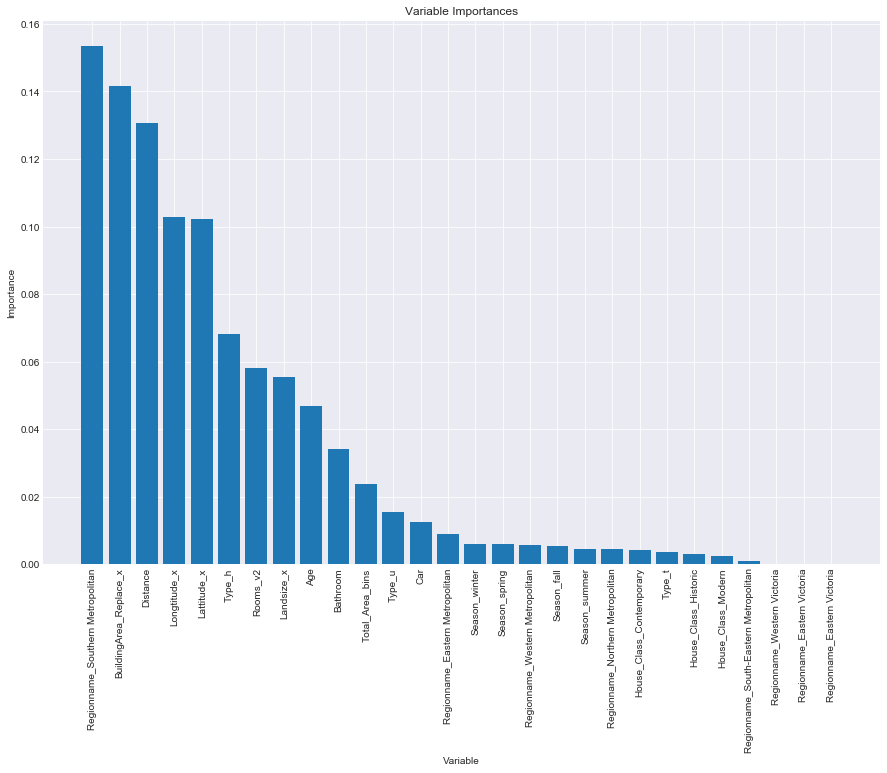

In [199]:
# list of feature for plotting
x_values = list(range(len(feature_importance)))

# Make a bar chart
plt.figure(figsize=(15,10))
plt.bar(x_values, importance, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

To sum up:

- _Southern Metropolitan_ region is the best feature for importance. In fact, if we recall this region is the area with the highest median home prices and also has the biggest density of houses (including the City of Melbourne).

- _BuidingArea_ and _Distance_ are the second and third features to reliably predict the price of a house in Melbourne.

- To follow: _Latitude_ and _Longitude_  with _Landsize_ and _Rooms_ complete the "package" of the most important features.

- Overall _type_ of house seems to have a small impact, especially if we consider "townhouses"(t) or "unit and duplex" (u). _Age_ of a house is slighlty better than _Bathroom_, while _seasons_ and _HouseClass_ have less than 1% of "feature importance".

### Evaluation on Test Set

In [200]:
# Evaluate on Test with the grid search best estimator model

final_model = grid_search_RF.best_estimator_
# Predicting test set results
final_pred = final_model.predict(x_test)
final_mse = mean_squared_error(y_test, final_pred)
final_rmse = np.sqrt(final_mse)
print('The final RMSE on the test set is', round(final_rmse, 2))

#calculate accuracy
errors = abs(final_pred - y_test)
# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / y_test))
# Calculate and display accuracy
accuracy = 100 - mape    
#print result
print('The best model achieves on the test set an accuracy of', round(accuracy, 2),'%')

The final RMSE on the test set is 308743.69
The best model achieves on the test set an accuracy of 83.31 %


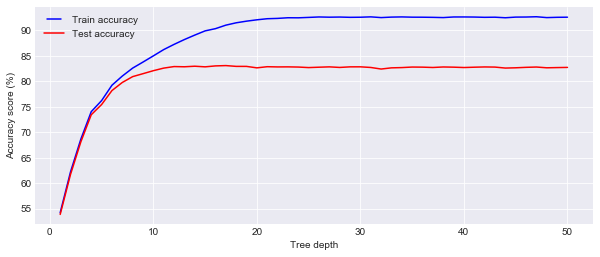

In [201]:
# Plot Train and Test accuracy as max_depths (number of trees in a RF) increases
# Try to identify when overfitting begins

max_depths = np.linspace(1, 50, 50, endpoint=True)

train_results = []
test_results = []

for i in max_depths:
    dt = RandomForestRegressor(max_depth=i)
    dt.fit(x_train, y_train)    
    #compute accuracy for train data
    housing_tree = dt.predict(x_train)
    errors = abs(housing_tree - y_train)
    # Calculate mean absolute percentage error (MAPE) on train
    mape = 100 * (errors / y_train)
    # Calculate and display accuracy (train)
    accuracy = 100 - np.mean(mape)
    #append results of accuracy (train)
    train_results.append(accuracy)
    
    #now again for test data
    housing_tree = dt.predict(x_test)
    errors = abs(housing_tree - y_test)
    # Calculate mean absolute percentage error (MAPE)
    mape = 100 * (errors / y_test)
    # Calculate and display accuracy
    accuracy = 100 - np.mean(mape)
    #append results of accuracy
    test_results.append(accuracy)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train accuracy')
line2, = plt.plot(max_depths, test_results, 'r', label= 'Test accuracy')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy score (%)')
plt.xlabel('Tree depth')
plt.show()

This final "screeplot" underlines the _overfitting_ aspect: we can clerly see that after ~10 splits the test performance does not increase anymore, while the trainset stop increasing around 20 splits. Here is where overfitting begins!

## <a id='Seventh-Section'>7. Conclusion/Insights</a>


After this long _journey_ in Melbourne we have collected a number of interesting points and ideas.
During the first months of 2018, Melborune's housing market has registered a drop in house price sales, even if the property transaction volumes did not have the same trend (but remind that we have only the first 3 months of the 2018 and also we have deleted observation without Price in our analysis). 
Location and size are the most relevant features that affect the Price, on the other hand who wants to live in the countryside with a not high standard of living (Did someone said Brooklyn?!).

Apart from that and moving into our statistical analysis, we have tried to obtain a global understanding of the house market  using a wide range of methods: from an initial EDA, through a time series analysis, followed by a cluster, to conclude with a regression analysis comparing a general linear model (Linear Regression) with an ensemble model (RF).

A future aim could be to remove the less relevant features, then estimate a new model comparing their results. Of course, we will lose a bit of predictive power, but at the same time it would gain in terms of ease and interpretability of the model as wells as in terms of computational time.

Another suggestion could be utilise a variation of linear regression, perhaps a "Ridge" or "Lasso" regression. The former should perform better when data suffer from multicollinearity, by adding a degree of bias to the regression estimates, this technique reduces the standard errors giving a more reliable estimates. The latter is a method that performs both variable selection and regularisation in order to enhance the prediction accuracy and interpretability of the statistical model it produces (_Wikipedia_).